#**🔗 Import**

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
import statsmodels.api as sm
from sklearn import tree

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Employee-Attrition.csv to Employee-Attrition (2).csv


In [ ]:
df = pd.read_csv('Employee-Attrition.csv')

#**🔗 Database Overview**

##**Database Information**

In [ ]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.dtypes.value_counts()

int64     26
object     9
Name: count, dtype: int64

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).shape[1]
numerical_columns = df.select_dtypes(include=['int64', 'float64']).shape[1]

print(f"Number of categorical columns: {categorical_columns}")
print(f"Number of numerical columns: {numerical_columns}")

Number of categorical columns: 9
Number of numerical columns: 26


In [ ]:
summary = {'Data Type': df.dtypes, 'Missing Values': df.isnull().sum(), 'nUnique values': df.nunique(),'Min Value': df.min(numeric_only=True),'Max Value': df.max(numeric_only=True),'Mean': df.mean(numeric_only=True),'Median': df.median(numeric_only=True)}

summary_df = pd.DataFrame(summary)

print("Summary DF")
display(summary_df)

Summary DF


Data Type  Missing Values  nUnique values  Min Value  \
Age                          int64               0              43       18.0   
Attrition                   object               0               2        NaN   
BusinessTravel              object               0               3        NaN   
DailyRate                    int64               0             886      102.0   
Department                  object               0               3        NaN   
DistanceFromHome             int64               0              29        1.0   
Education                    int64               0               5        1.0   
EducationField              object               0               6        NaN   
EmployeeCount                int64               0               1        1.0   
EmployeeNumber               int64               0            1470        1.0   
EnvironmentSatisfaction      int64               0               4        1.0   
Gender                      object               0               2        NaN   
HourlyRate                   int64               0              71       30.0   
JobInvolvement               int64               0               4        1.0   
JobLevel                     int64               0               5        1.0   
JobRole                     object               0               9        NaN   
JobSatisfaction              int64               0               4        1.0   
MaritalStatus               object               0               3        NaN   
MonthlyIncome                int64               0            1349     1009.0   
MonthlyRate                  int64               0            1427     2094.0   
NumCompaniesWorked           int64               0              10        0.0   
Over18                      object               0               1        NaN   
OverTime                    object               0               2        NaN   
PercentSalaryHike            int64               0              15       11.0   
PerformanceRating            int64               0               2        3.0   
RelationshipSatisfaction     int64               0               4        1.0   
StandardHours                int64               0               1       80.0   
StockOptionLevel             int64               0               4        0.0   
TotalWorkingYears            int64               0              40        0.0   
TrainingTimesLastYear        int64               0               7        0.0   
WorkLifeBalance              int64               0               4        1.0   
YearsAtCompany               int64               0              37        0.0   
YearsInCurrentRole           int64               0              19        0.0   
YearsSinceLastPromotion      int64               0              16        0.0   
YearsWithCurrManager         int64               0              18        0.0   

                          Max Value          Mean   Median  
Age                            60.0     36.923810     36.0  
Attrition                       NaN           NaN      NaN  
BusinessTravel                  NaN           NaN      NaN  
DailyRate                    1499.0    802.485714    802.0  
Department                      NaN           NaN      NaN  
DistanceFromHome               29.0      9.192517      7.0  
Education                       5.0      2.912925      3.0  
EducationField                  NaN           NaN      NaN  
EmployeeCount                   1.0      1.000000      1.0  
EmployeeNumber               2068.0   1024.865306   1020.5  
EnvironmentSatisfaction         4.0      2.721769      3.0  
Gender                          NaN           NaN      NaN  
HourlyRate                    100.0     65.891156     66.0  
JobInvolvement                  4.0      2.729932      3.0  
JobLevel                        5.0      2.063946      2.0  
JobRole                         NaN           NaN      NaN  
JobSatisfaction                 4.0      2.728571      3.0  
MaritalSta

In [ ]:
# Test 1 - Check for duplicate rows

duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
df.describe().transpose()

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [ ]:
# Test 2 - Columns with only one unique values

constant_columns = df.nunique()[df.nunique() == 1].index.tolist()
print("Columns with only one unique value:", constant_columns)

Columns with only one unique value: ['EmployeeCount', 'Over18', 'StandardHours']


In [ ]:
# Delete columns with one unique values

df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

*Initial Data Exploration Insights:*

- The dataset contains *1,470 rows and 39 columns*.
- There are *27 numerical* columns and *12 categorical* ones, covering a wide range of employee attributes.
- There are *no missing values* and *no duplicate rows*, indicating good data quality.
- The target variable *Attrition* is already encoded as 0/1 in a new column called *Attrition_numerical*.
- Some columns have a very high number of unique values (e.g., *MonthlyIncome*, *MonthlyRate*), which may need to be scaled or binned.
- Several satisfaction-related columns (e.g., *EnvironmentSatisfaction*, *JobSatisfaction*, *WorkLifeBalance*) are ordinal and may be important predictors.
- No columns have only one unique value, so no further removals were needed.

##**Illogical values**


1.   **Test 3 -** It is illogical for an employee to have been at the company (YearsAtCompany) longer than their total working experience (TotalWorkingYears).
2.   **Test 4-** It is illogical for an employee to have been in their current role (YearsInCurrentRole) longer than they have been at the company (YearsAtCompany).
3. **Test 5 -** It is illogical for an employee to have worked with their current manager (YearsWithCurrManager) longer than they have been at the company (YearsAtCompany).
4. **Test 6 –** It is illogical for more years to have passed since an employee’s last promotion (YearsSinceLastPromotion) than the total time they have been at the company (YearsAtCompany).
5. **Test 7 -** It is illogical for an employee to have a monthly income of zero (MonthlyIncome = 0) if they are actively employed by the organization.
6. **Test 8 -** It is illogical for numeric fields such as Age, YearsAtCompany, or MonthlyIncome to contain negative or unrealistic values, as these contradict real-world employee data.


In [ ]:
# Test 3-

test3 = df[df['TotalWorkingYears'] < df['YearsAtCompany']]

print(f"Test 3 violation – TotalWorkingYears < YearsAtCompany: {len(test3)} records found\n")
display(test3)

Test 3 violation – TotalWorkingYears < YearsAtCompany: 0 records found



Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 31 columns]

In [ ]:
# Test 4-

test4 = df[df['YearsAtCompany'] < df['YearsInCurrentRole']]

print(f"Test 4 violation – YearsAtCompany < YearsInCurrentRole: {len(test4)} records found\n")
display(test4)

Test 4 violation – YearsAtCompany < YearsInCurrentRole: 0 records found



Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 31 columns]

In [ ]:
# Test 5-

test5 = df[df['YearsAtCompany'] < df['YearsWithCurrManager']]

print(f"Test 5 violation – YearsAtCompany < YearsWithCurrManager: {len(test5)} records found\n")
display(test5)

Test 5 violation – YearsAtCompany < YearsWithCurrManager: 0 records found



Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 31 columns]

In [ ]:
# Test 6-

test6 = df[df['YearsAtCompany'] < df['YearsSinceLastPromotion']]

print(f"Test 6 violation – YearsAtCompany < YearsSinceLastPromotion: {len(test6)} records found\n")
display(test6)

Test 6 violation – YearsAtCompany < YearsSinceLastPromotion: 0 records found



Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 31 columns]

In [ ]:
# Test 7-

test7 = df[df['MonthlyIncome'] == 0]

print(f"Test 7 violation – MonthlyIncome = 0: {len(test7)} records found\n")
display(test7)

Test 7 violation – MonthlyIncome = 0: 0 records found



Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 31 columns]

In [ ]:
# Test 8 - Illogical or negative values in key numeric fields

# Age can't be negative
test8_1 = df[df['Age'] < 0]

# Age shouldn't be under 18 (unless it's a special case)
test8_2 = df[df['Age'] < 18]

# Years at company can't be negative
test8_3 = df[df['YearsAtCompany'] < 0]

# Distance from home can't be negative
test8_4 = df[df['DistanceFromHome'] < 0]

# Monthly income can't be negative
test8_5 = df[df['MonthlyIncome'] < 0]

# Total working years can't be negative
test8_6 = df[df['TotalWorkingYears'] < 0]

# Number of companies worked can't be negative
test8_7 = df[df['NumCompaniesWorked'] < 0]

# Years in current role can't be negative
test8_8 = df[df['YearsInCurrentRole'] < 0]

# Years with current manager can't be negative
test8_9 = df[df['YearsWithCurrManager'] < 0]

# Years since last promotion can't be negative
test8_10 = df[df['YearsSinceLastPromotion'] < 0]

# Display summary
print("🧪 Test 8 – Illogical or negative values in numeric fields:")
print(f"Age < 0: {len(test8_1)} records")
print(f"Age < 18: {len(test8_2)} records")
print(f"YearsAtCompany < 0: {len(test8_3)} records")
print(f"DistanceFromHome < 0: {len(test8_4)} records")
print(f"MonthlyIncome < 0: {len(test8_5)} records")
print(f"TotalWorkingYears < 0: {len(test8_6)} records")
print(f"NumCompaniesWorked < 0: {len(test8_7)} records")
print(f"YearsInCurrentRole < 0: {len(test8_8)} records")
print(f"YearsWithCurrManager < 0: {len(test8_9)} records")
print(f"YearsSinceLastPromotion < 0: {len(test8_10)} records")

🧪 Test 8 – Illogical or negative values in numeric fields:
Age < 0: 0 records
Age < 18: 0 records
YearsAtCompany < 0: 0 records
DistanceFromHome < 0: 0 records
MonthlyIncome < 0: 0 records
TotalWorkingYears < 0: 0 records
NumCompaniesWorked < 0: 0 records
YearsInCurrentRole < 0: 0 records
YearsWithCurrManager < 0: 0 records
YearsSinceLastPromotion < 0: 0 records


##***Insights***

*Initial Data Cleaning & Validation Insights:*

1. **No duplicate rows** were found – each row represents a unique employee.
2. **Constant columns:** Three columns (*EmployeeCount*, *Over18*, and *StandardHours*) had only one unique value and were removed because they add no analytical value.
3. **ID column:** *EmployeeNumber* was removed since it functions as an identifier and does not contribute to prediction or analysis.
4. **Salary logic:** No employees had a *MonthlyIncome* of zero, indicating that salary data is complete and realistic.
5. **Negative or unrealistic values:** A full check was done for key numeric fields (*Age*, *Salary*, *TotalWorkingYears*, *YearsAtCompany*, etc.). No negative or illogical values were found.
6. **Logical consistency checks:** All values related to employee tenure (e.g., *YearsAtCompany* vs. *TotalWorkingYears*, *YearsInCurrentRole*, *YearsWithCurrManager*, *YearsSinceLastPromotion*) were valid. No inconsistencies were detected.
7. **Age validation:** All employees are aged 18 or above, confirming the data respects realistic working age.

✅ Overall, the dataset is clean, consistent, and ready for feature analysis and modeling.

#**🔗 Data Analysis**

##**Categorical columns**

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()

print(f"\nTotal categorical columns: {len(categorical_columns)}")
print(categorical_columns)


Total categorical columns: 8
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [ ]:
print("Unique values for categorical columns:\n")

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Unique values for categorical columns:

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: ['Yes' 'No']


***Dataset Columns – Categorical Variables:***

1. **Attrition:** Indicates whether the employee has left the organization (*Yes*) or is still currently employed (*No*). Used as the target variable in this analysis.
2. **Department:** The functional area in which the employee works (e.g., Sales, Research & Development, Human Resources).
3. **EducationField:** The field of academic background (e.g., Life Sciences, Technical Degree, Marketing).
4. **Gender:** The employee’s gender (Male or Female).
5. **OverTime:** Indicates whether the employee regularly works overtime (*Yes*) or not (*No*), which may correlate with workload or burnout.

###**Attrition**

/tmp/ipython-input-271-3241414684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


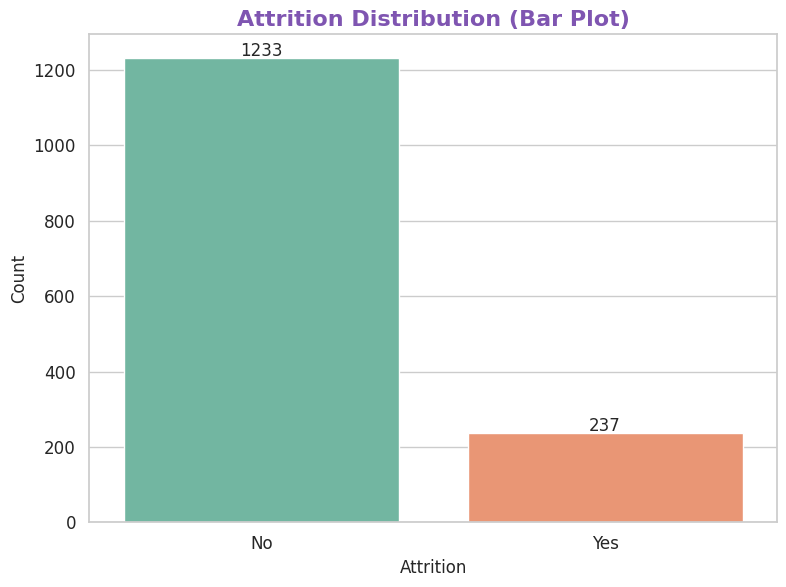

In [ ]:
# Bar Plot

attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    palette='Set2'
)

for i, value in enumerate(attrition_counts.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12)

plt.title('Attrition Distribution (Bar Plot)', fontsize=16, fontweight='bold', color='#7F55B1')
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

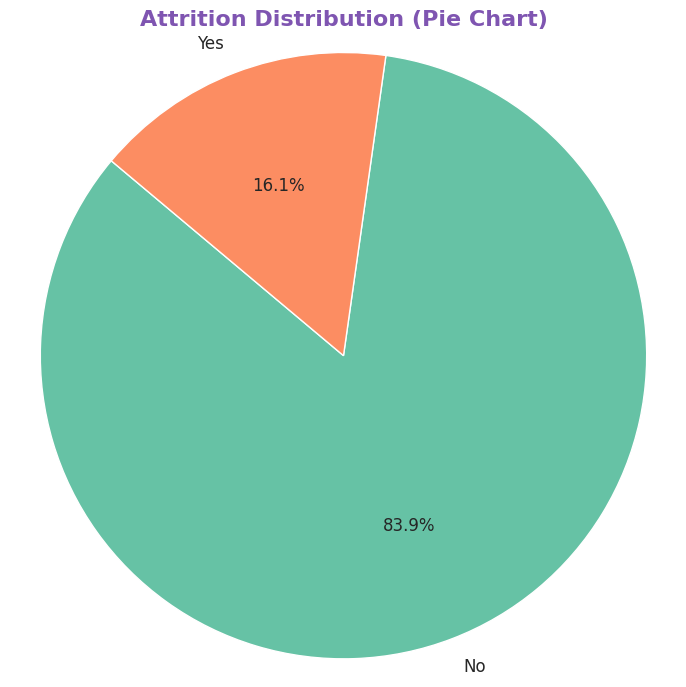

In [ ]:
# Pie Chart

attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    attrition_counts.values,
    labels=attrition_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2'),
    textprops={'fontsize': 12}
)

plt.title('Attrition Distribution (Pie Chart)', fontsize=16, fontweight='bold', color='#7F55B1')
plt.axis('equal')
plt.tight_layout()
plt.show()

###**Gender**

/tmp/ipython-input-273-2622602091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Gender', palette=custom_colors, edgecolor='black')


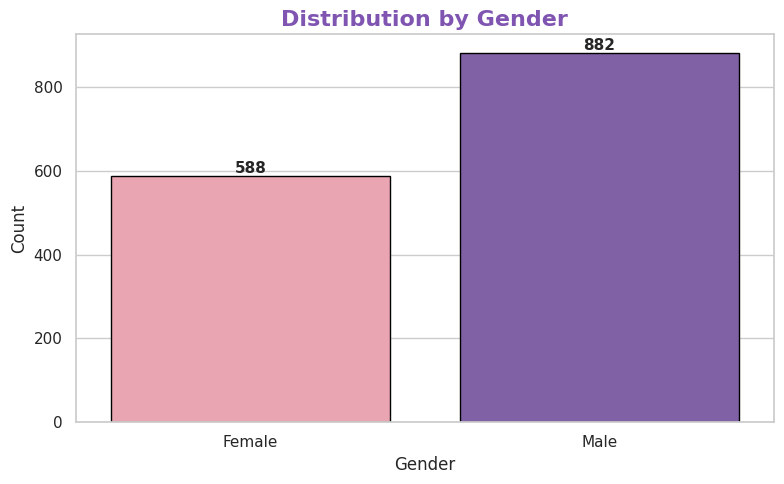

In [ ]:
#Bar Plot

custom_colors = ['#F49BAB', '#7F55B1']
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Gender', palette=custom_colors, edgecolor='black')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribution by Gender', fontsize=16, fontweight='bold', color='#7F55B1')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

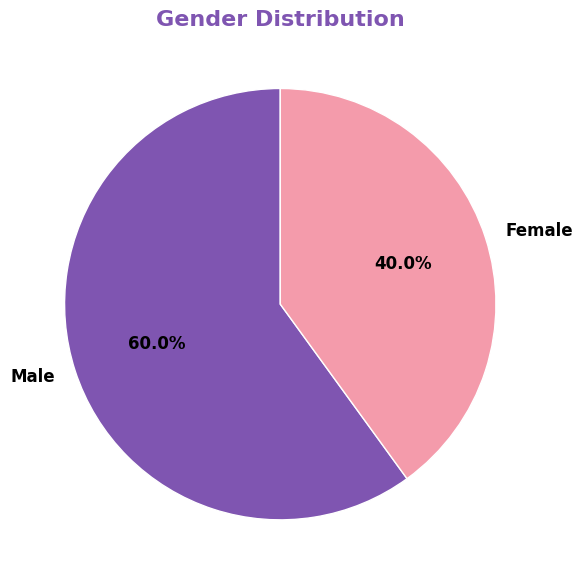

In [ ]:
# Pie Chart

gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['#7F55B1','#F49BAB']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 12, 'color': 'black', 'fontweight': 'bold'})
plt.title('Gender Distribution', fontsize=16, fontweight='bold', color='#7F55B1')
plt.axis('equal')
plt.tight_layout()
plt.show()

###**Education Field**

/tmp/ipython-input-275-2365989608.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=edu_counts.index, y=edu_counts.values, palette="Set2")


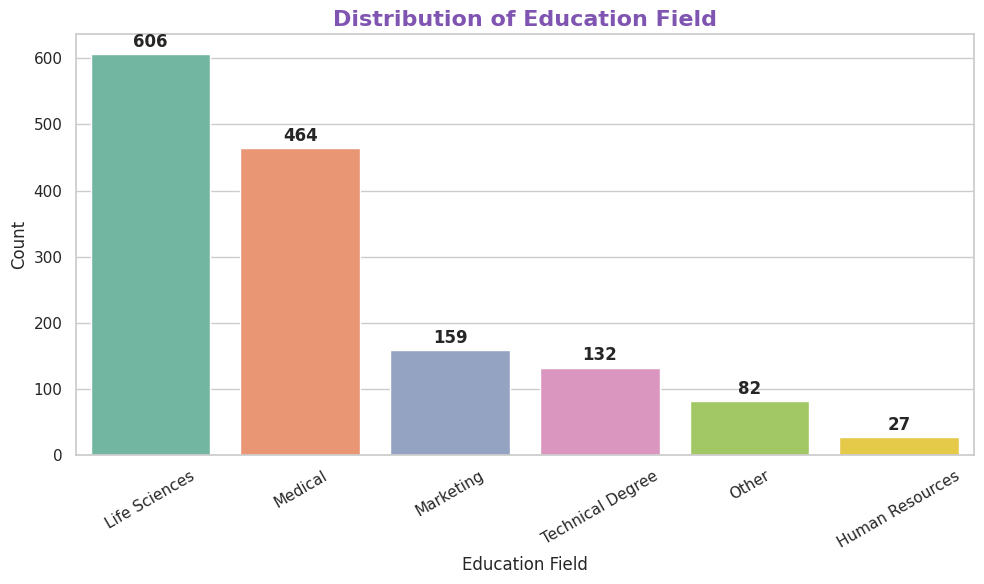

In [ ]:
# Bar Plot

sns.set(style="whitegrid", palette="Set2")

edu_counts = df['EducationField'].value_counts()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=edu_counts.index, y=edu_counts.values, palette="Set2")

for i, value in enumerate(edu_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontweight='bold')

plt.title('Distribution of Education Field', fontsize=16, fontweight='bold', color='#7F55B1')
plt.xlabel('Education Field', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

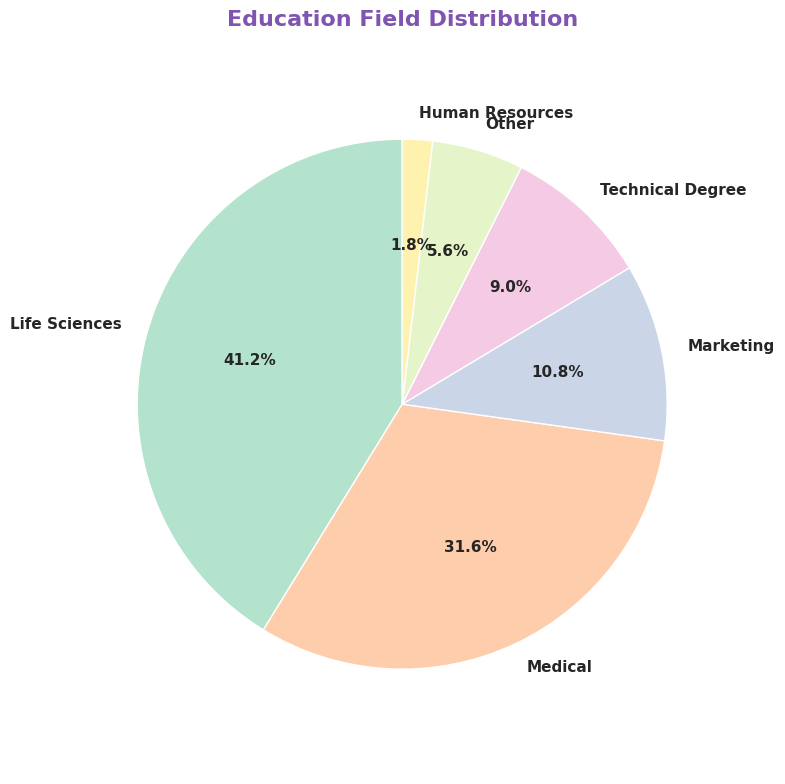

In [ ]:
# Pie Chart

edu_counts = df['EducationField'].value_counts()
labels = edu_counts.index
sizes = edu_counts.values
colors = plt.cm.Pastel2.colors[:len(labels)]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Education Field Distribution', fontsize=16, fontweight='bold', color='#7F55B1')
plt.axis('equal')
plt.tight_layout()
plt.show()

###**Department**

/tmp/ipython-input-277-4239955191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="Set3")


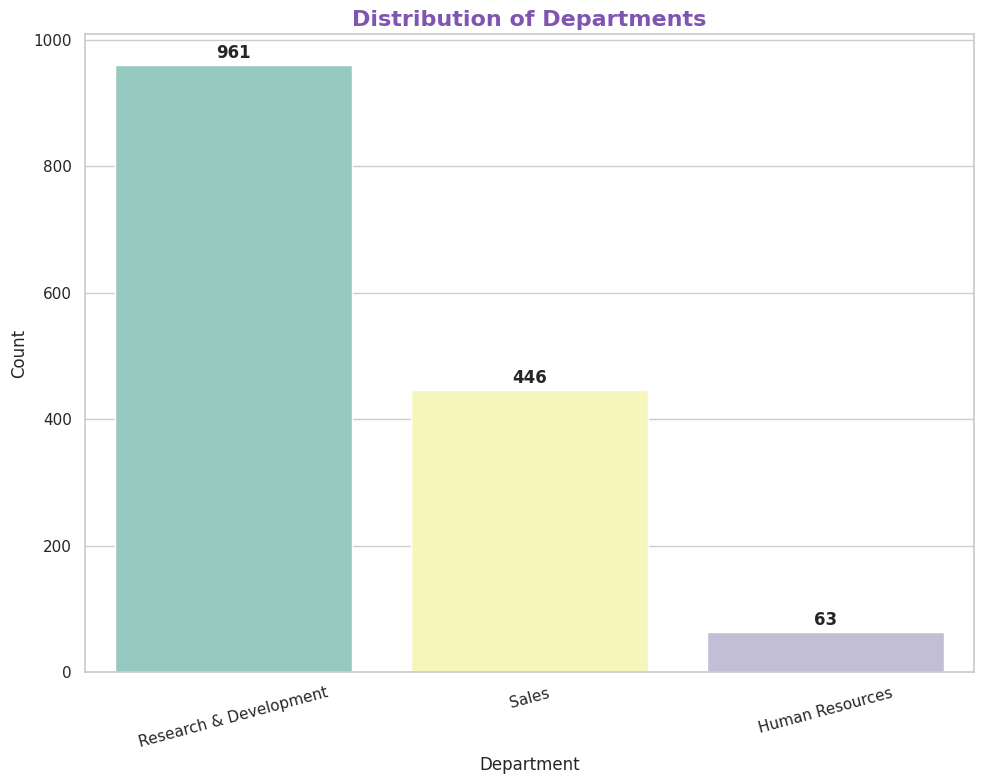

In [ ]:
# Bar Plot

dept_counts = df['Department'].value_counts()

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="Set3")

for i, value in enumerate(dept_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontweight='bold')

plt.title('Distribution of Departments', fontsize=16, fontweight='bold', color='#7F55B1')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

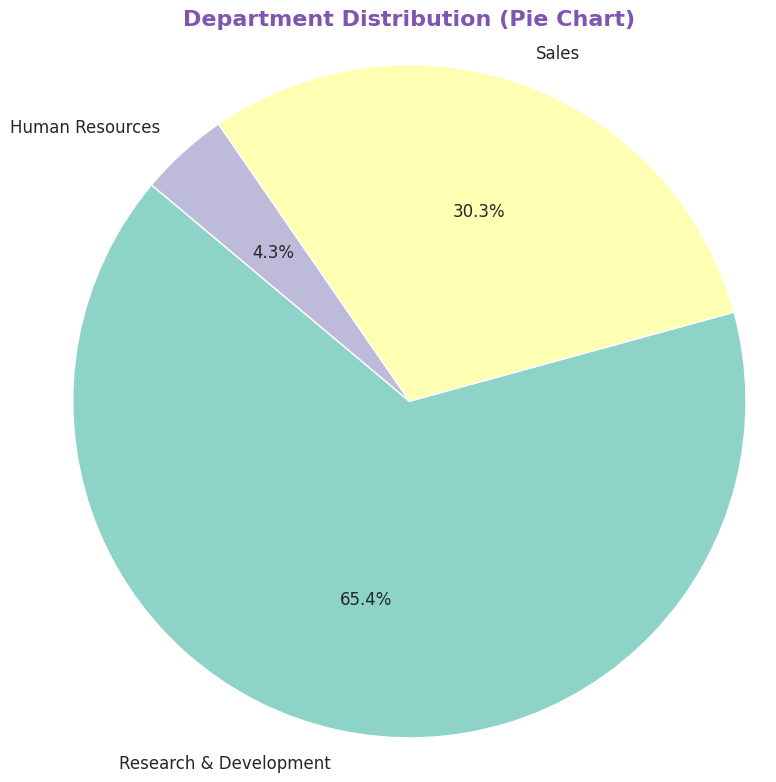

In [ ]:
# Pie Chart

dept_counts = df['Department'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    dept_counts,
    labels=dept_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3"),
    textprops={'fontsize': 12}
)

plt.title('Department Distribution (Pie Chart)', fontsize=16, fontweight='bold', color='#7F55B1')
plt.axis('equal')
plt.tight_layout()
plt.show()

###**Over Time**

/tmp/ipython-input-279-2518961840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


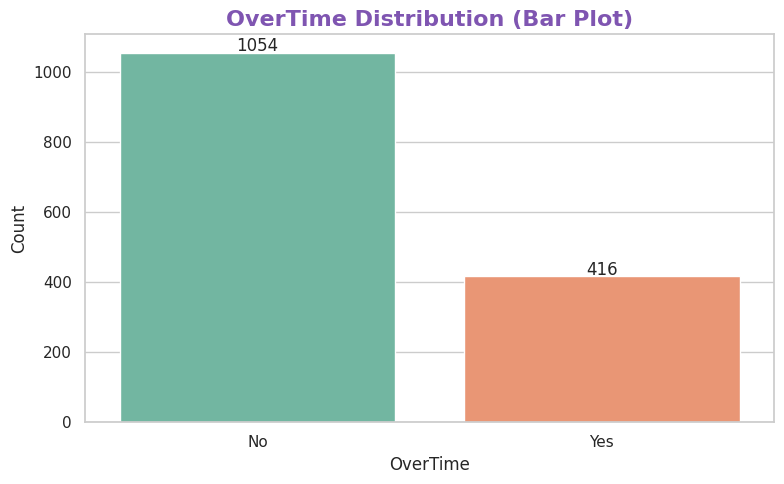

In [ ]:
# Bar Plot

overtime_counts = df['OverTime'].value_counts()

plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    x=overtime_counts.index,
    y=overtime_counts.values,
    palette='Set2'
)

for i, value in enumerate(overtime_counts.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12)

plt.title('OverTime Distribution (Bar Plot)', fontsize=16, fontweight='bold', color='#7F55B1')
plt.xlabel('OverTime', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

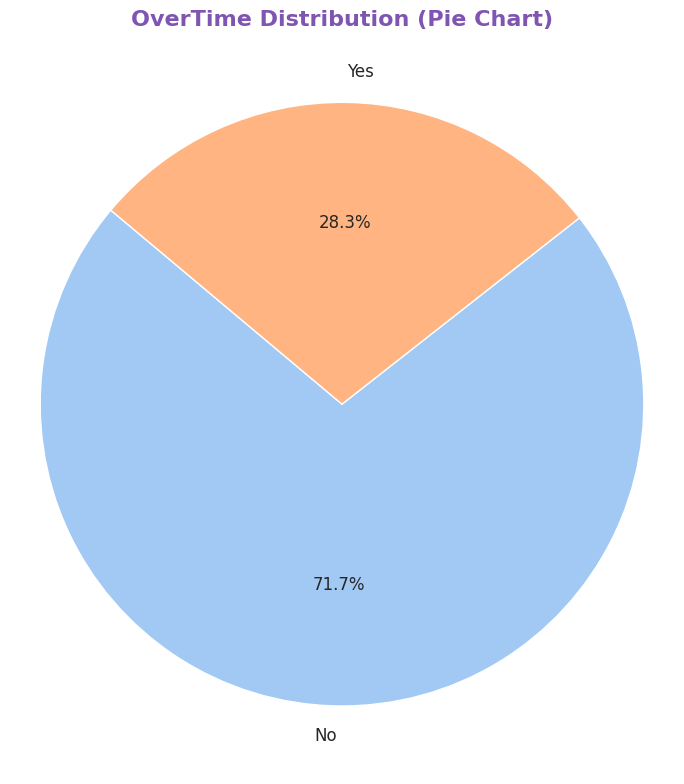

In [ ]:
# Pie Chart

overtime_counts = df['OverTime'].value_counts()

plt.figure(figsize=(7, 8))
plt.pie(
    overtime_counts,
    labels=overtime_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel"),
    textprops={'fontsize': 12}
)

plt.title('OverTime Distribution (Pie Chart)', fontsize=16, fontweight='bold', color='#7F55B1')
plt.axis('equal')
plt.tight_layout()
plt.show()

##**Numerical columns**

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print(f"\nTotal numerical columns: {len(numerical_columns)}")
print(numerical_columns)


Total numerical columns: 23
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


/tmp/ipython-input-282-2627994137.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


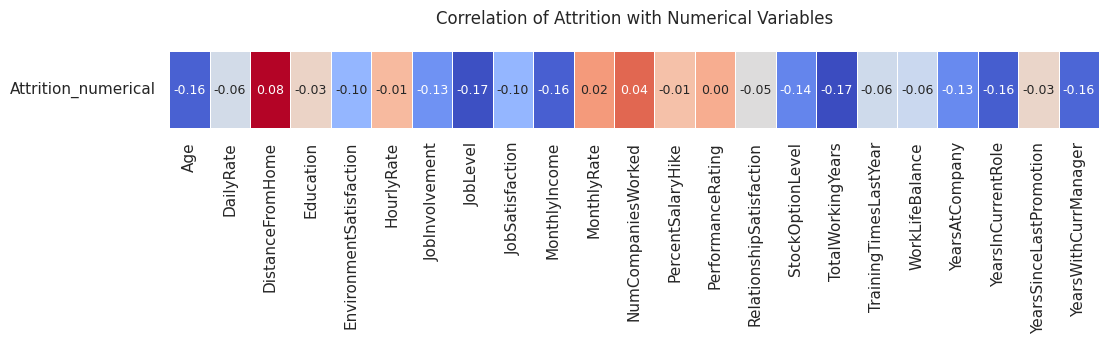

In [ ]:
df['Attrition_numerical'] = df['Attrition'].map({'Yes': 1, 'No': 0})

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

correlation_matrix = df[numerical_columns].corr()

attrition_correlation = correlation_matrix.loc[['Attrition_numerical']].drop(columns=['Attrition_numerical'])

plt.figure(figsize=(12, 1))
sns.heatmap(attrition_correlation, annot=True, annot_kws={"size": 9},
            cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=False)

plt.title("Correlation of Attrition with Numerical Variables", pad=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

***Dataset Columns -***

1. **Age:** Age of the employee.
2. **Education:** Level of education attained by the employee.
3. **EnvironmentSatisfaction:** Employee's satisfaction level with the work environment.
3. **JobLevel:** Level of the employee's job position.
4. **JobSatisfaction:** Employee's satisfaction level with their job
5. **MonthlyIncome:** Monthly income of the employe.
6. **TotalWorkingYears:** Total number of years the employee has worked
7. **YearsAtCompany:** Number of years the employee has worked at the current company.
8. **YearsInCurrentRole:** Number of years the employee has been in the current role.
9. **YearsSinceLastPromotion:** Number of years since the employee's last promotion.
10. **YearsWithCurrManager:** Number of years the employee has been working with the current manager


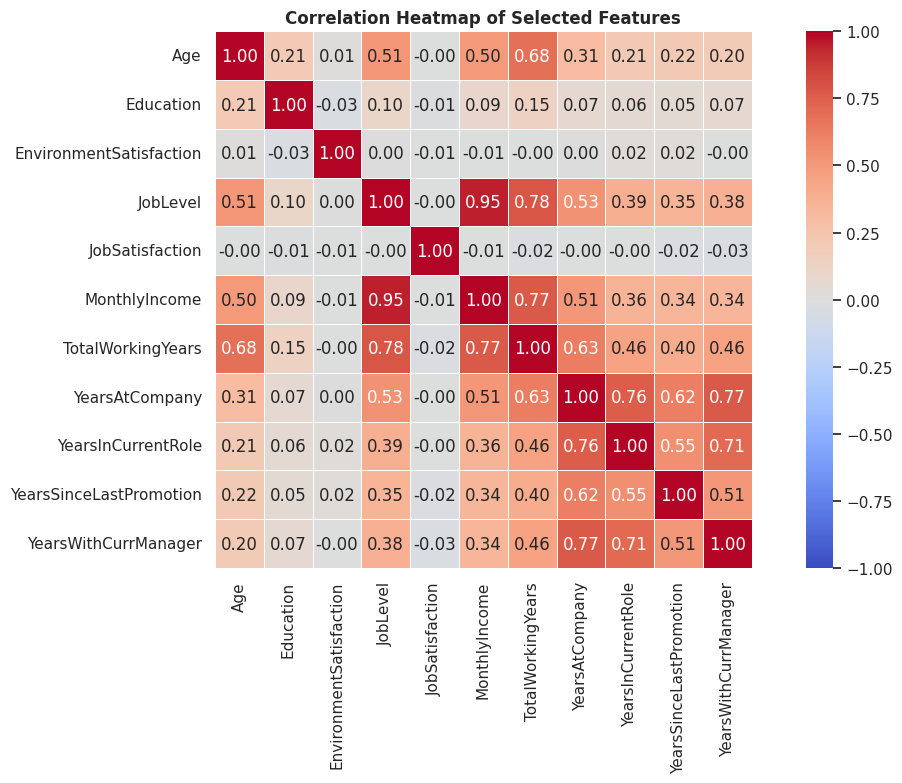

In [ ]:
selected_columns = [
    'Age', 'Education','EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
    'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Selected Features', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

###**Age**

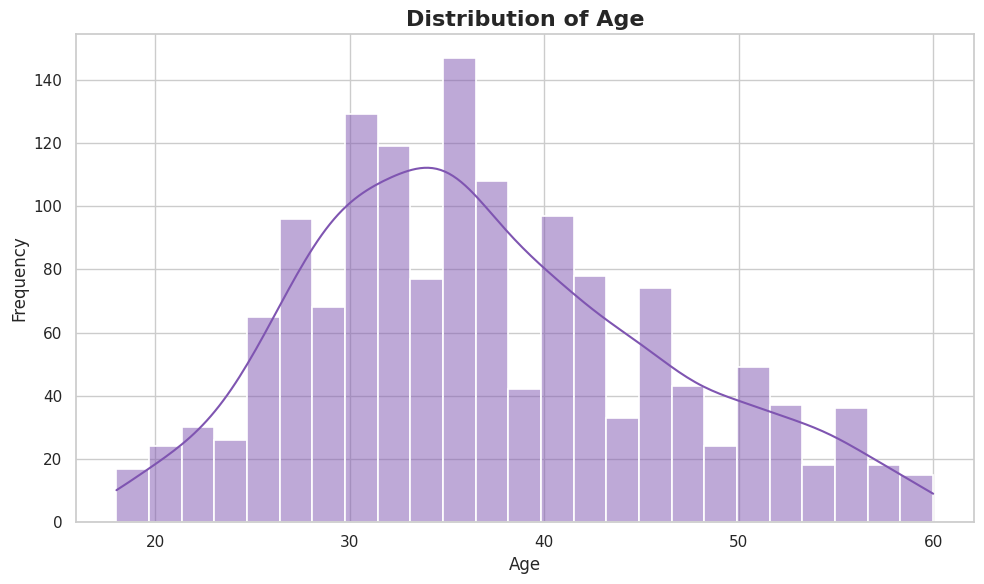

In [ ]:
sns.set(style="whitegrid", palette="Set2")

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=25, kde=True, color='#7F55B1', edgecolor='white', linewidth=1.2)
plt.title('Distribution of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

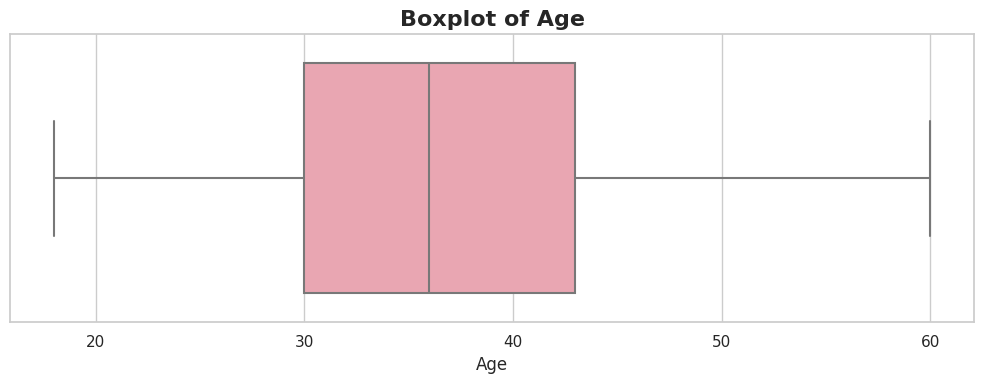

In [ ]:
# Boxplot for Age
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Age'], color='#F49BAB', linewidth=1.5)
plt.title('Boxplot of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

### **Education**

In [ ]:
education_mapping = {
    1: 'Below College - Level 1',
    2: 'College - Level 2',
    3: 'Bachelor - Level 3',
    4: 'Master - Level 4',
    5: 'Doctor - Level 5'
}

df['EducationLevel'] = df['Education'].map(education_mapping)

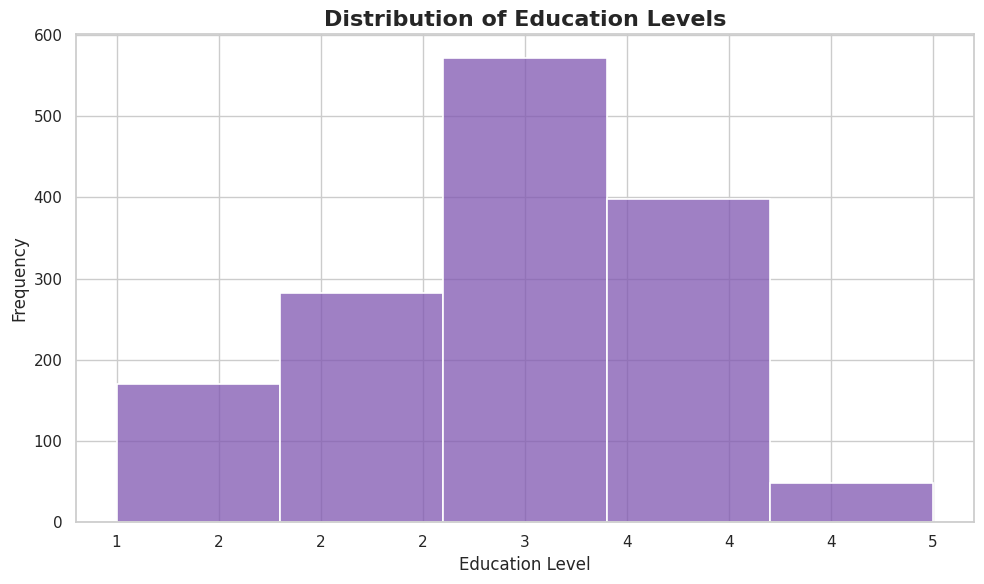

In [ ]:
sns.set(style="whitegrid", palette="Set2")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Education'], bins=5, kde=False, color='#7F55B1', edgecolor='white', linewidth=1.2)
plt.title('Distribution of Education Levels', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

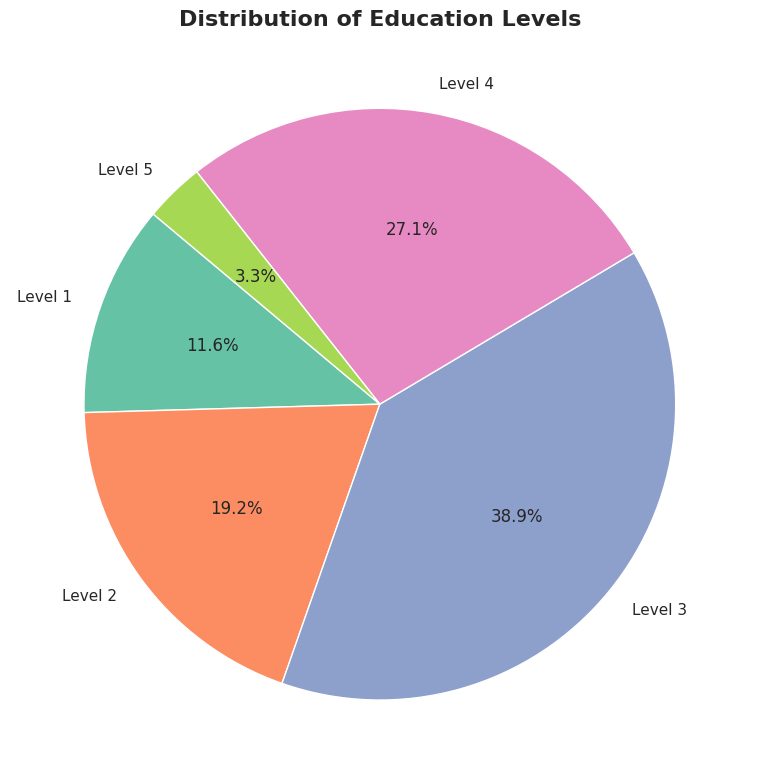

In [ ]:
# Pie Chart
edu_counts = df['Education'].value_counts().sort_index()

labels = [f'Level {i}' for i in edu_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(edu_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Education Levels', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

###**EnvironmentSatisfaction**

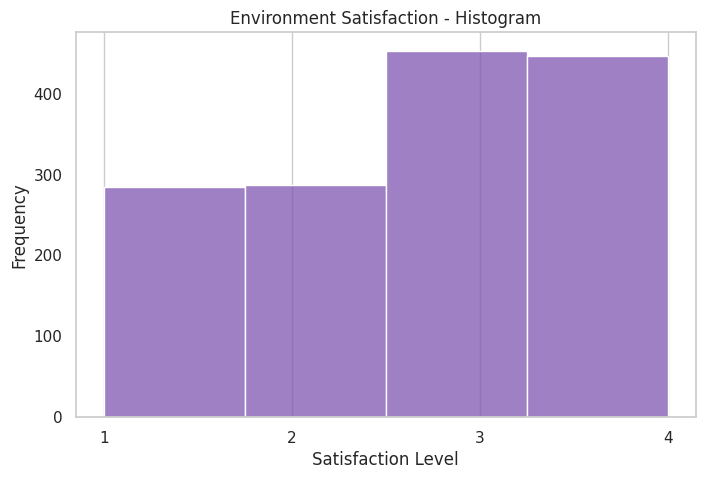

In [ ]:
# Histogram

plt.figure(figsize=(8, 5))
sns.histplot(df['EnvironmentSatisfaction'], bins=4, kde=False, color="#7F55B1")
plt.title('Environment Satisfaction - Histogram')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4])
plt.grid(axis='y')
plt.show()

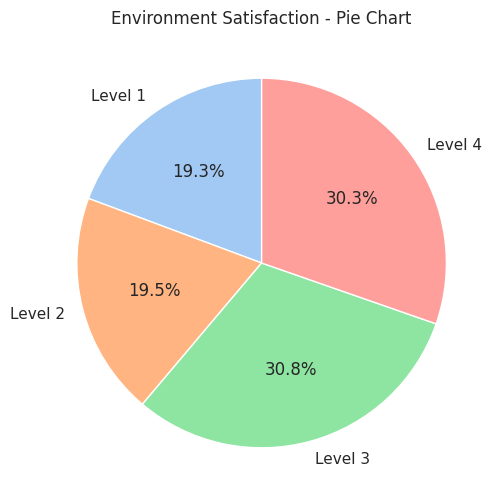

In [ ]:
# Pie Chart
satisfaction_counts = df['EnvironmentSatisfaction'].value_counts().sort_index()
labels = [f'Level {int(i)}' for i in satisfaction_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(satisfaction_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Environment Satisfaction - Pie Chart')
plt.show()

###**JobLevel**

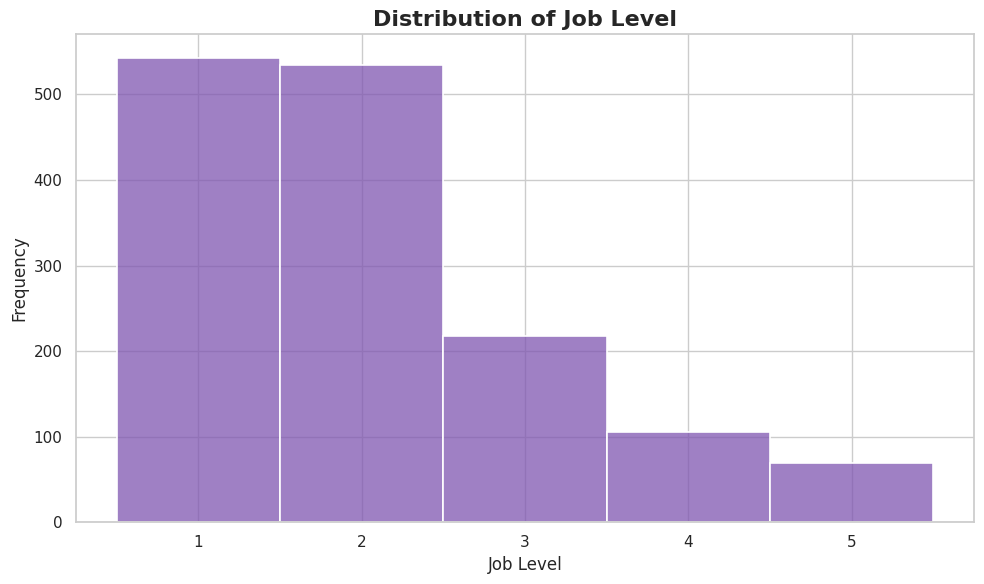

In [ ]:
# Histogram

sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(10, 6))
sns.histplot(df['JobLevel'], bins=range(1, df['JobLevel'].max()+2), discrete=True, color='#7F55B1', edgecolor='white', linewidth=1.2)
plt.title('Distribution of Job Level', fontsize=16, fontweight='bold')
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

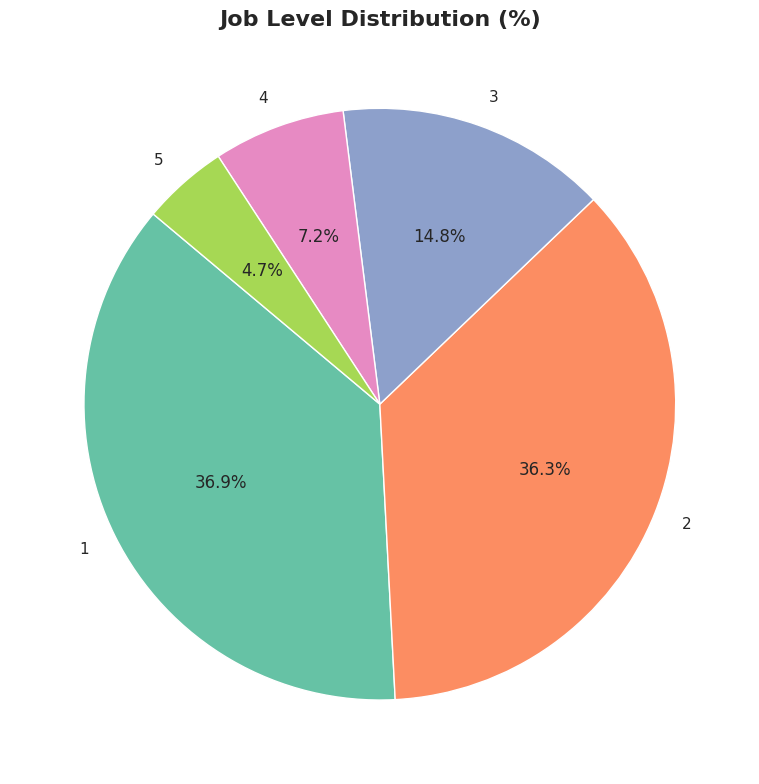

In [ ]:
# Pie chart

job_counts = df['JobLevel'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Job Level Distribution (%)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

###**JobSatisfaction**

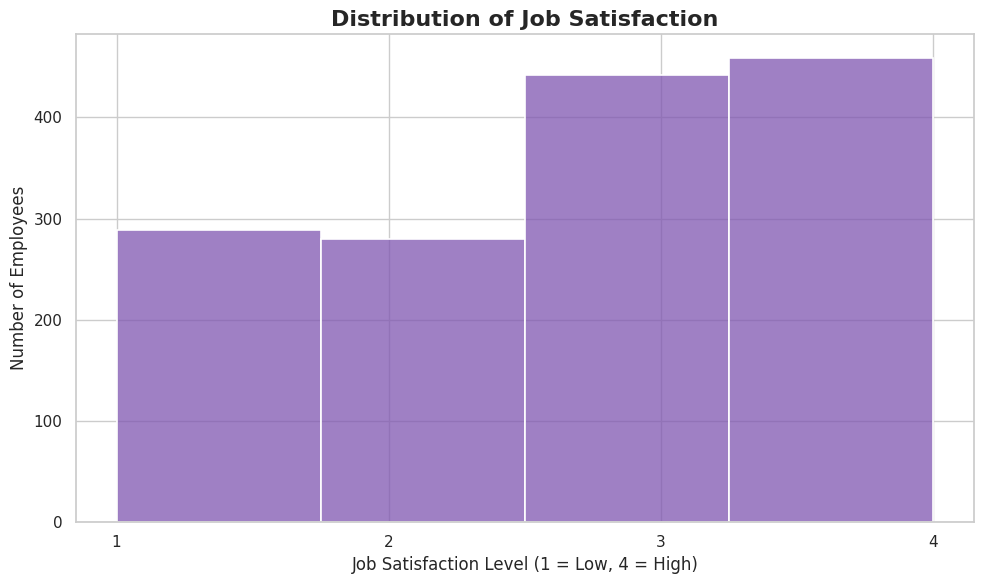

In [ ]:
# Histogram

sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(10, 6))
sns.histplot(df['JobSatisfaction'], bins=4, kde=False, color='#7F55B1', edgecolor='white', linewidth=1.2)
plt.title('Distribution of Job Satisfaction', fontsize=16, fontweight='bold')
plt.xlabel('Job Satisfaction Level (1 = Low, 4 = High)', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()

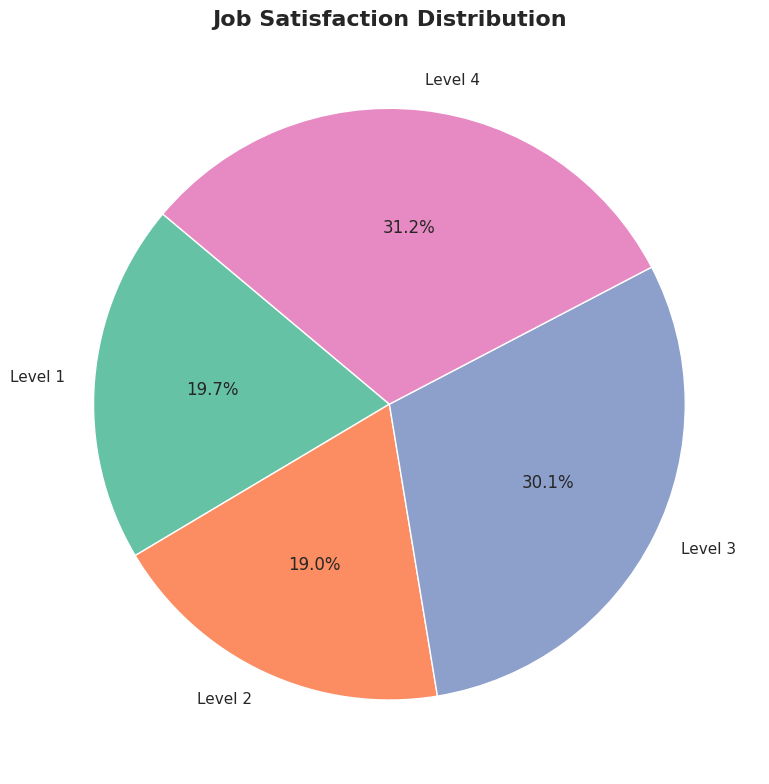

In [ ]:
# Pie chart

job_satisfaction_counts = df['JobSatisfaction'].value_counts().sort_index()
labels = [f'Level {i}' for i in job_satisfaction_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(job_satisfaction_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Job Satisfaction Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

###**Monthly Income**

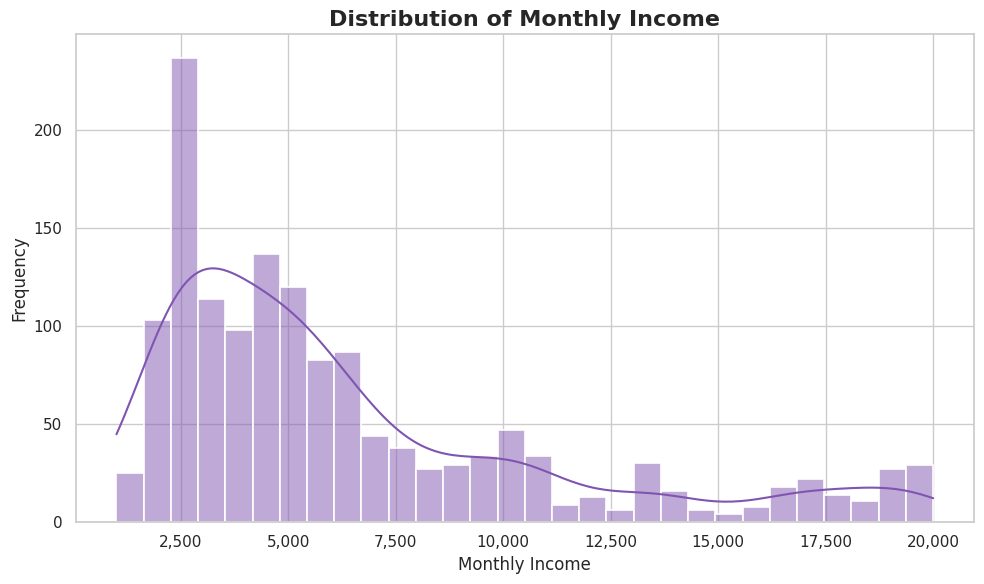

In [ ]:
# Histogram

sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True, color='#7F55B1', edgecolor='white', linewidth=1.2)
plt.title('Distribution of Monthly Income', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

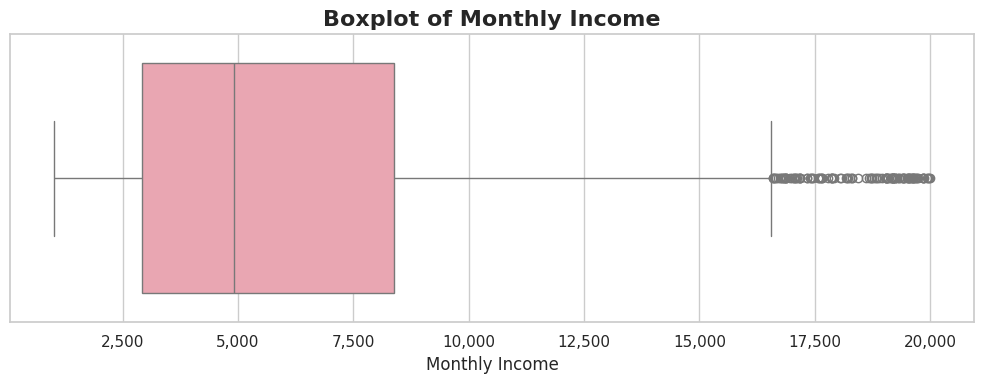

In [ ]:
# Boxplot

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['MonthlyIncome'], color='#F49BAB')
plt.title('Boxplot of Monthly Income', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Income', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

###**Total Working Years**

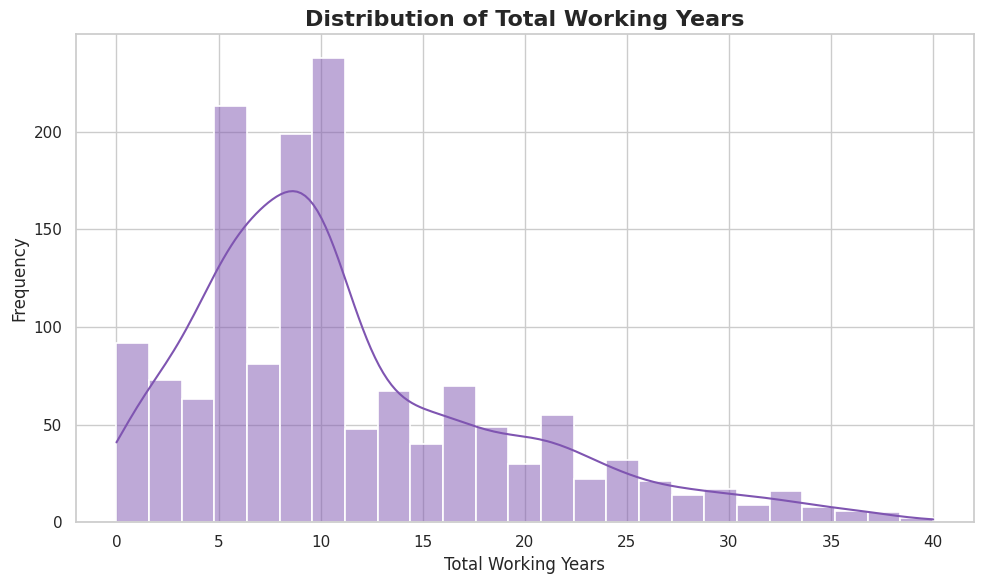

In [ ]:
# Hitsogram

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalWorkingYears'], bins=25, kde=True, color='#7F55B1', edgecolor='white', linewidth=1.2)
plt.title('Distribution of Total Working Years', fontsize=16, fontweight='bold')
plt.xlabel('Total Working Years', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

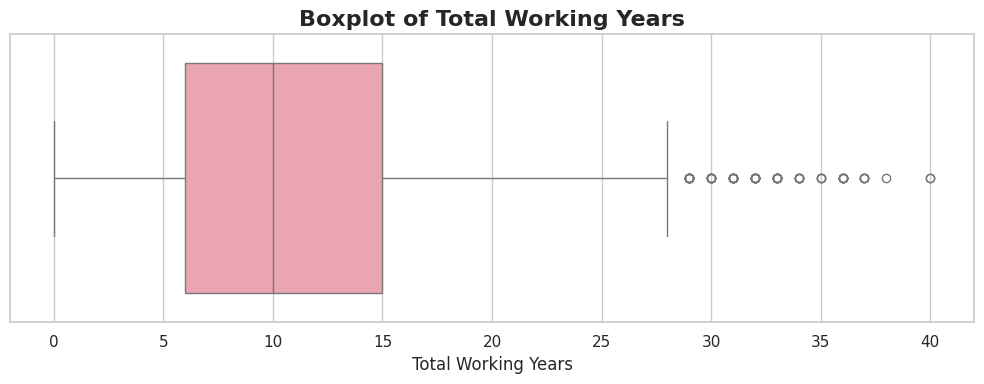

In [ ]:
# BoxPlot

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['TotalWorkingYears'], color='#F49BAB')
plt.title('Boxplot of Total Working Years', fontsize=16, fontweight='bold')
plt.xlabel('Total Working Years', fontsize=12)
plt.tight_layout()
plt.show()

###**Years At Company**

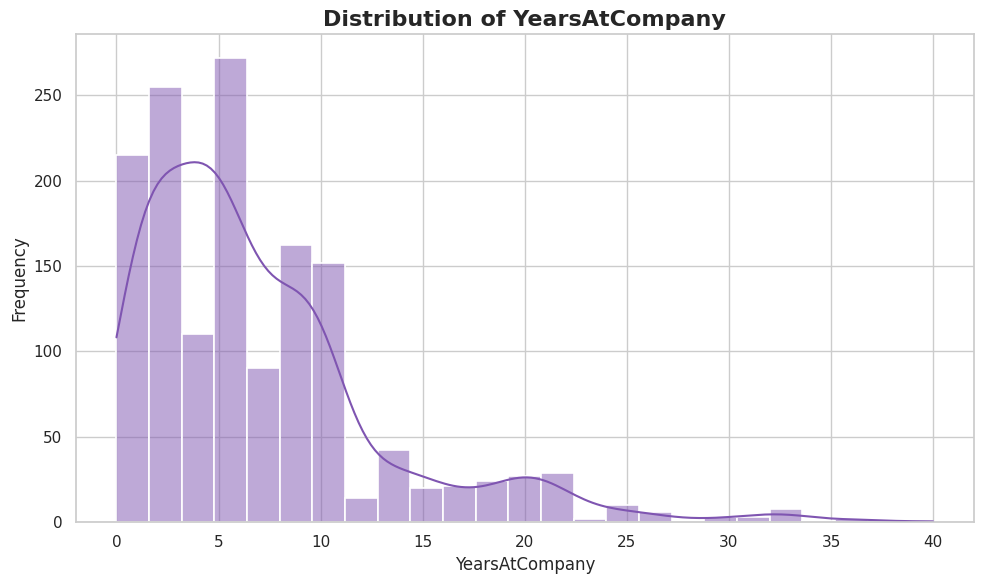

In [ ]:
# Histogram

sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(10, 6))
sns.histplot(df['YearsAtCompany'], bins=25, kde=True, color='#7F55B1', edgecolor='white', linewidth=1.2)
plt.title('Distribution of YearsAtCompany', fontsize=16, fontweight='bold')
plt.xlabel('YearsAtCompany', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

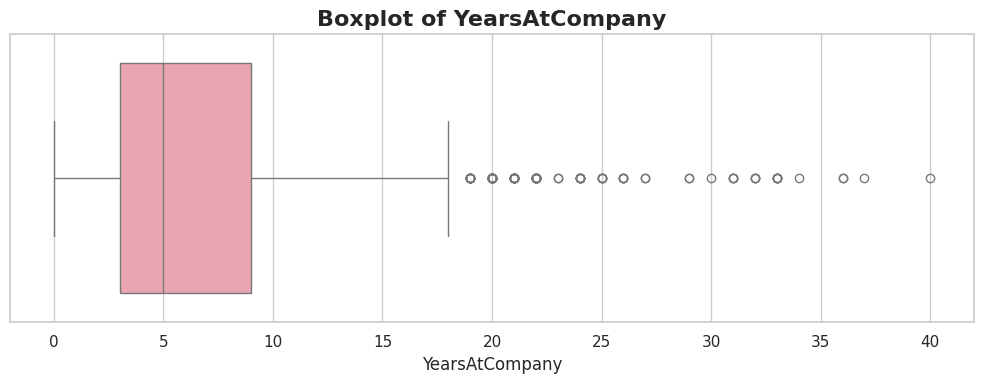

In [ ]:
# Boxplot

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['YearsAtCompany'], color='#F49BAB')
plt.title('Boxplot of YearsAtCompany', fontsize=16, fontweight='bold')
plt.xlabel('YearsAtCompany', fontsize=12)
plt.tight_layout()
plt.show()

###**Years In Current Role**

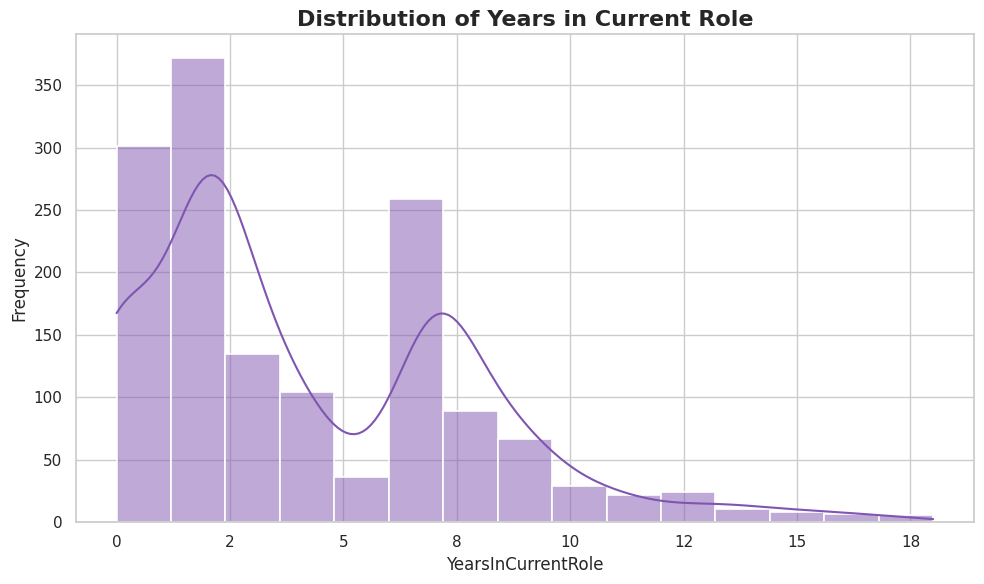

In [ ]:
# Histogram

plt.figure(figsize=(10, 6))
sns.histplot(df['YearsInCurrentRole'], bins=15, kde=True, color='#7F55B1', edgecolor='white', linewidth=1.2)
plt.title('Distribution of Years in Current Role', fontsize=16, fontweight='bold')
plt.xlabel('YearsInCurrentRole', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

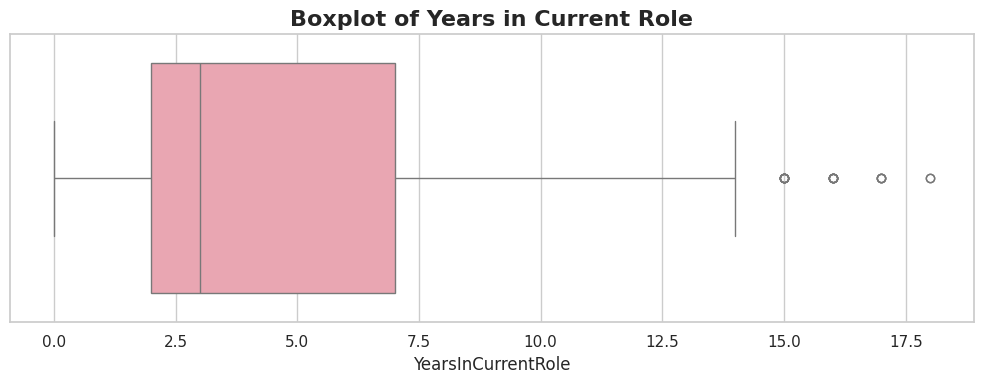

In [ ]:
# Boxplot

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['YearsInCurrentRole'], color='#F49BAB')
plt.title('Boxplot of Years in Current Role', fontsize=16, fontweight='bold')
plt.xlabel('YearsInCurrentRole', fontsize=12)
plt.tight_layout()
plt.show()

###**Years Since Last Promotion**

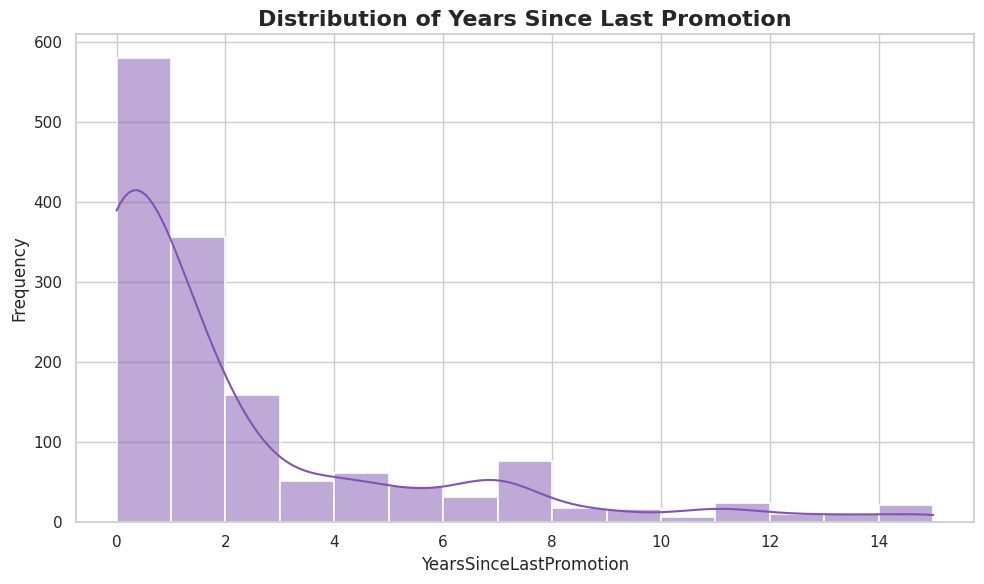

In [ ]:
# Histogram

plt.figure(figsize=(10, 6))
sns.histplot(df['YearsSinceLastPromotion'], bins=15, kde=True, color='#7F55B1', edgecolor='white', linewidth=1.2)
plt.title('Distribution of Years Since Last Promotion', fontsize=16, fontweight='bold')
plt.xlabel('YearsSinceLastPromotion', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

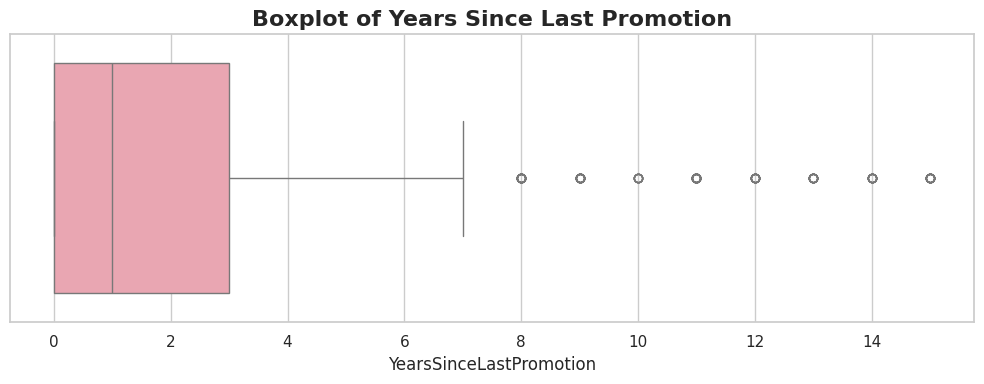

In [ ]:
# Boxplot

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['YearsSinceLastPromotion'], color='#F49BAB')
plt.title('Boxplot of Years Since Last Promotion', fontsize=16, fontweight='bold')
plt.xlabel('YearsSinceLastPromotion', fontsize=12)
plt.tight_layout()
plt.show()

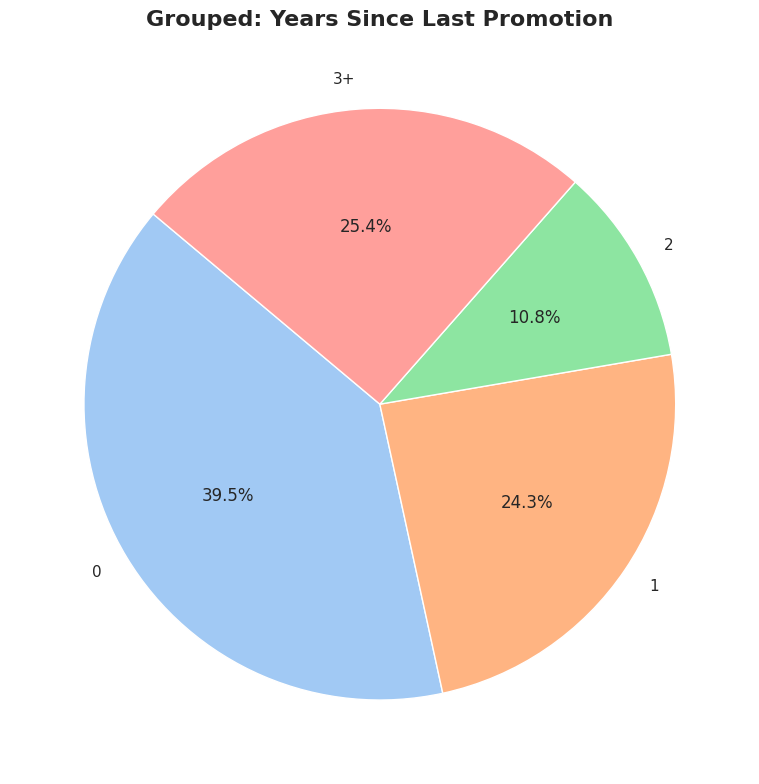

In [ ]:
# Pie Chart

def group_promotion_years(val):
    if val == 0:
        return '0'
    elif val == 1:
        return '1'
    elif val == 2:
        return '2'
    else:
        return '3+'

df['PromotionGroup'] = df['YearsSinceLastPromotion'].apply(group_promotion_years)

grouped_counts = df['PromotionGroup'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")[0:len(grouped_counts)]

plt.pie(
    grouped_counts,
    labels=grouped_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title('Grouped: Years Since Last Promotion', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

###**Years With Current Manager**

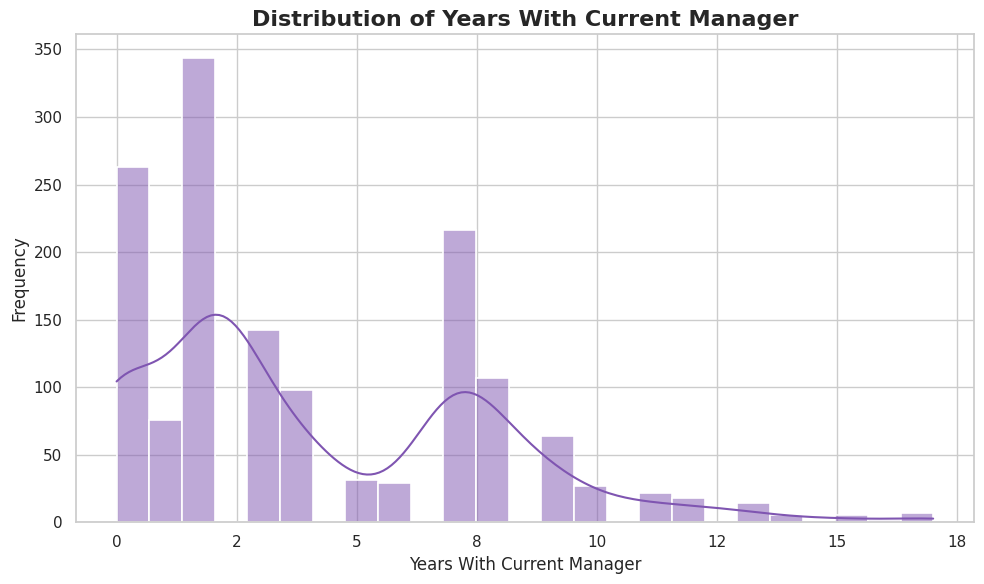

In [ ]:
# Histogram

plt.figure(figsize=(10, 6))
sns.histplot(df['YearsWithCurrManager'], bins=25, kde=True, color='#7F55B1', edgecolor='white', linewidth=1.2)
plt.title('Distribution of Years With Current Manager', fontsize=16, fontweight='bold')
plt.xlabel('Years With Current Manager', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

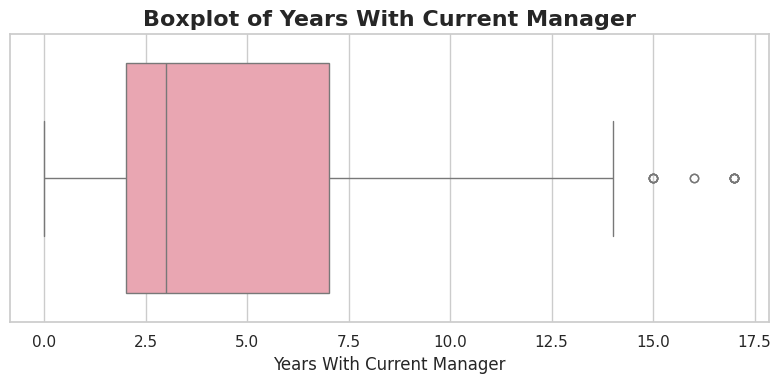

In [ ]:
# Boxplot

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['YearsWithCurrManager'], color='#F49BAB')
plt.title('Boxplot of Years With Current Manager', fontsize=16, fontweight='bold')
plt.xlabel('Years With Current Manager', fontsize=12)
plt.tight_layout()
plt.show()

#**🔗 Attrition**

In [ ]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [ ]:
# Numerical columns -

print(df.select_dtypes(include=['int64', 'float64']).columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_numerical'],
      dtype='object')


In [ ]:
# Correlation Numerical columns -

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

correlation_matrix = df[numerical_columns].corr()

correlations_numeric = correlation_matrix['Attrition_numerical'].drop('Attrition_numerical').sort_values(key=abs, ascending=False)

print("\nTop correlated numerical variables with Attrition:")
print(f"\n{correlations_numeric}")


Top correlated numerical variables with Attrition:

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
DistanceFromHome            0.077924
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
MonthlyRate                 0.015170
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
Name: Attrition_numerical, dtype: float64


/tmp/ipython-input-311-3444160684.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


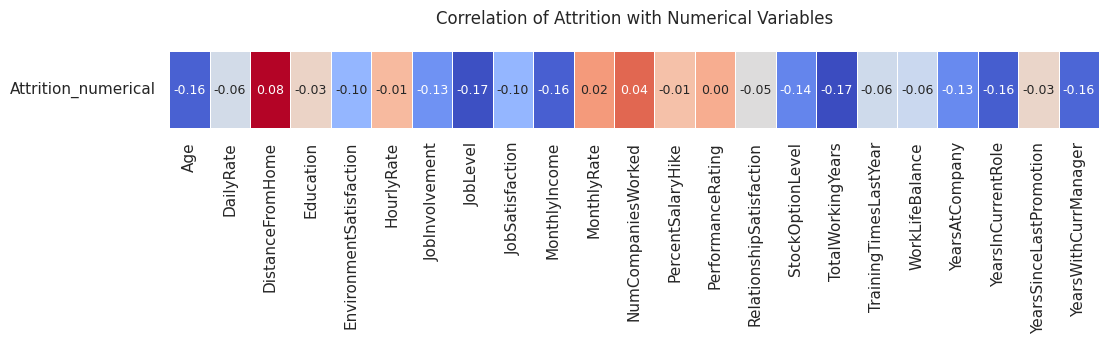

In [ ]:
# Correlation Numerical columns -

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

correlation_df = df[numerical_columns].copy()
correlation_matrix = correlation_df.corr()

correlation_matrix = correlation_df.corr()

attrition_correlation = correlation_matrix.loc[['Attrition_numerical']].drop(columns=['Attrition_numerical'])

plt.figure(figsize=(12, 1))
sns.heatmap(attrition_correlation, annot=True, annot_kws={"size": 9},
            cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=False)

plt.title("Correlation of Attrition with Numerical Variables", pad=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Categorical columns -

print(df.select_dtypes(include='object').columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'EducationLevel',
       'PromotionGroup'],
      dtype='object')


In [ ]:
# Correlation Categorical columns -
target_categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

# One-Hot Encoding
df_dummies = pd.get_dummies(df[target_categorical_cols], drop_first=True)

df_encoded = pd.concat([df_dummies, df['Attrition_numerical']], axis=1)

correlations = df_encoded.corr()['Attrition_numerical'].drop('Attrition_numerical').sort_values(key=abs, ascending=False)

print("\nTop correlated categorical variables (One-Hot) with Attrition:")
print(f"\n{correlations}")


Top correlated categorical variables (One-Hot) with Attrition:

OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married               -0.090984
JobRole_Research Director           -0.088870
Department_Research & Development   -0.085293
JobRole_Manager                     -0.083316
JobRole_Manufacturing Director      -0.082994
Department_Sales                     0.080855
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
BusinessTravel_Travel_Rarely        -0.049538
EducationField_Medical              -0.046999
JobRole_Human Resources              0.036215
EducationField_Life Sciences        -0.032703
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
EducationField_Other                -0.017898
JobRole_Researc

In [ ]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0  Female  ...                  8                      0                1   
1    Male  ...                 10                      3                3   
2    Male  ...                  7                      3                3   
3  Female  ...                  8                      3                3   
4    Male  ...                  6                      3                3   

  YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0              6                   4                       0   
1             10                   7                       1   
2              0                   0                       0   
3              8                   7                       3   
4              2                   2                       2   

   YearsWithCurrManager  Attrition_numerical           EducationLevel  \
0                     5                    1        College - Level 2   
1                     7                    0  Below College - Level 1   
2                     0                    1        College - Level 2   
3                     0                    0         Master - Level 4   
4                     2                    0  Below College - Level 1   

  PromotionGroup  
0              0  
1              1  
2              0  
3             3+  
4              2  

[5 rows x 34 columns]

/tmp/ipython-input-315-3937365892.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


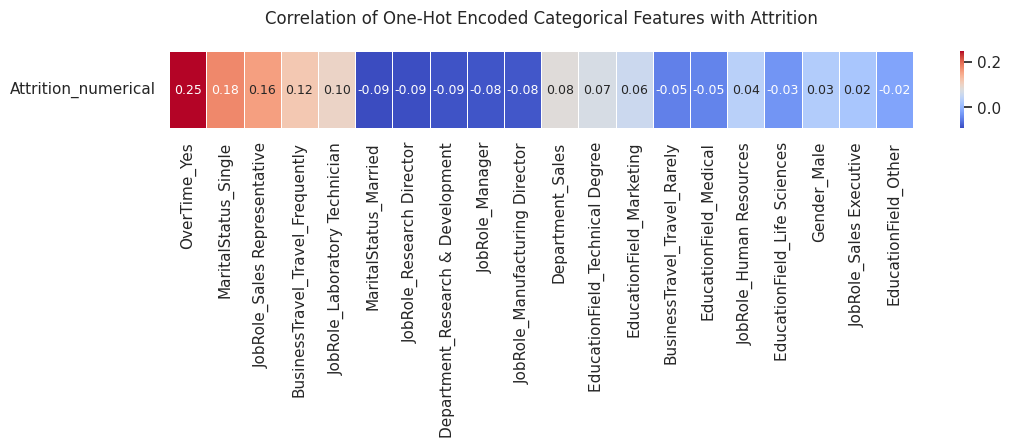

In [ ]:
# Correlation Categorical columns -

plt.figure(figsize=(12, 1))
sns.heatmap(correlations.head(20).to_frame().T, annot=True, annot_kws={"size": 9}, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation of One-Hot Encoded Categorical Features with Attrition', pad=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

*Attrition Correlation Insights – Numerical & Categorical Variables:*

**Numerical Variables:**
- The strongest negative correlations with attrition were found in:
  - *TotalWorkingYears (-0.17):* Employees with less overall experience tend to leave more.
  - *JobLevel (-0.17):* Lower-level employees are more likely to leave.
  - *YearsInCurrentRole (-0.16)* and *YearsWithCurrManager (-0.16):* Less time in role or with a manager relates to higher attrition.
  - *MonthlyIncome (-0.16)* and *Age (-0.16):* Younger and lower-paid employees have higher attrition rates.
- These correlations are not very strong but consistently point to lower tenure, lower income, and less experience as risk factors.

**Categorical Variables (One-Hot Encoded):**
- The most positively correlated variables with attrition were:
  - *OverTime_Yes (0.25):* Strongest single predictor – employees who work overtime tend to leave more.
  - *MaritalStatus_Single (0.18):* Single employees show higher attrition rates.
  - *JobRole_Sales Representative (0.16)* and *BusinessTravel_Travel_Frequently (0.12):* Suggest job stress or travel burden may be factors.
- Conversely, *MaritalStatus_Married*, *JobRole_Research Director*, and *Department_Research & Development* were negatively correlated with attrition, suggesting greater stability in those groups.

🟦 These findings support the idea that job strain, low compensation, and lack of stability may be key drivers of employee attrition.

##**First Question - Does low satisfaction with job and social relationships contribute to employee attrition?**

### **Each category separately**

In [ ]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

In [ ]:
def plot_satisfaction(attrition_column, satisfaction_column, title):
    plt.figure(figsize=(10, 8))

    hue_order = ['No', 'Yes']

    ax = sns.countplot(
        data=df,
        x=satisfaction_column,
        hue=attrition_column,
        hue_order=hue_order
    )

    plt.title(title)
    plt.xlabel(satisfaction_column.replace("_", " ").title())
    plt.ylabel("Count")
    plt.xticks(rotation=0)

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    plt.tight_layout()
    plt.show()

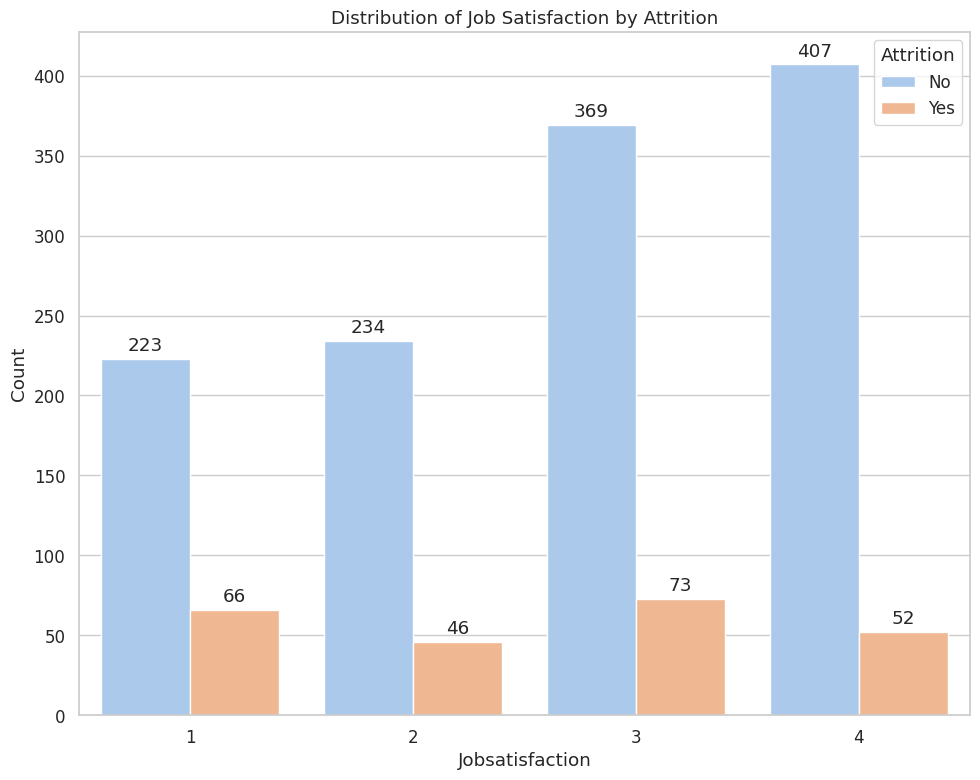

In [ ]:
plot_satisfaction('Attrition', 'JobSatisfaction', 'Distribution of Job Satisfaction by Attrition')

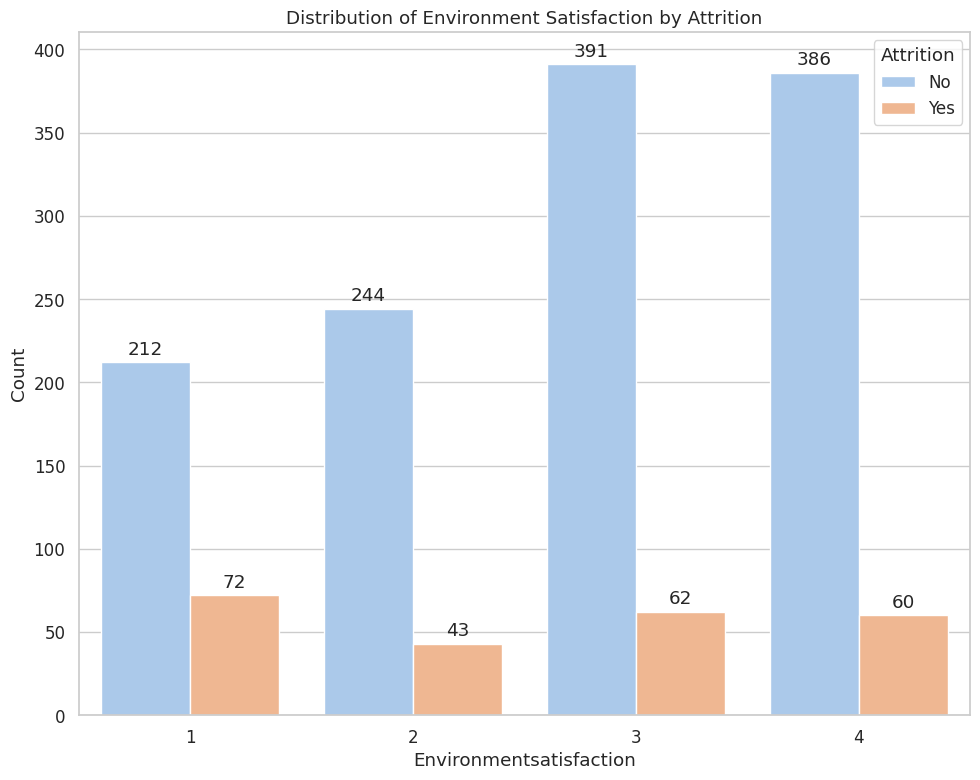

In [ ]:
plot_satisfaction('Attrition', 'EnvironmentSatisfaction', 'Distribution of Environment Satisfaction by Attrition')

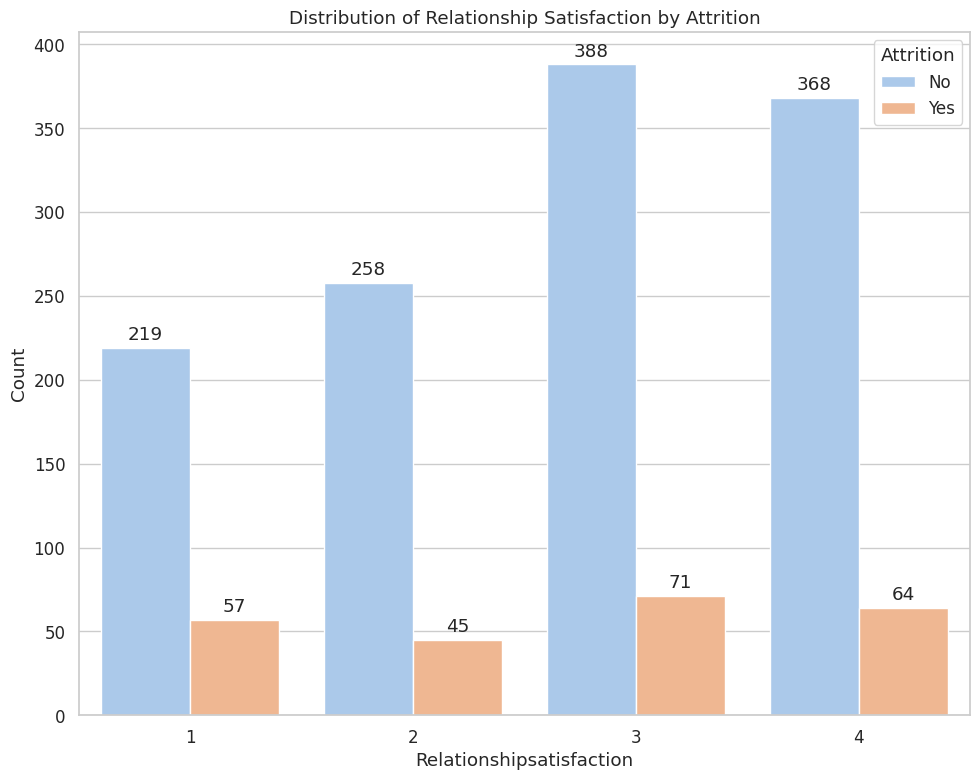

In [ ]:
plot_satisfaction('Attrition', 'RelationshipSatisfaction', 'Distribution of Relationship Satisfaction by Attrition')

In [ ]:
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})

def plot_stacked_percentage_bar(column, title):
    counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    totals = counts.sum(axis=1)
    percentages = counts.div(totals, axis=0) * 100

    ax = percentages.plot(kind='bar', stacked=True, figsize=(8, 6),
                          color=['#a3c9a8', '#f4a582'], edgecolor='black')

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(['No', 'Yes'], title='Attrition')

    for i, total in enumerate(totals):
        bottom = 0
        for j, value in enumerate(percentages.iloc[i]):
            label = f'{value:.1f}%'
            if value > 5:
                ax.text(i, bottom + value / 2, label, ha='center', va='center', fontsize=9)
            bottom += value

    plt.tight_layout()
    return plt

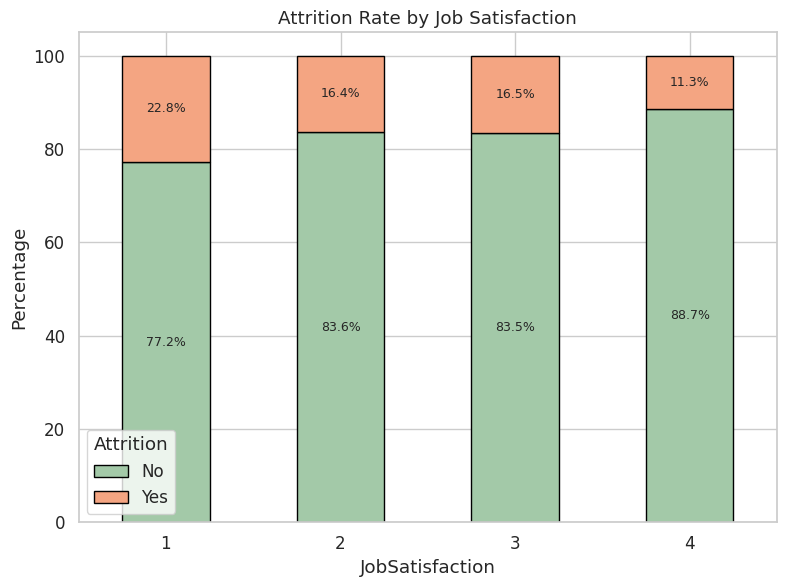

In [ ]:
plot1 = plot_stacked_percentage_bar('JobSatisfaction', 'Attrition Rate by Job Satisfaction')
plot1.show()

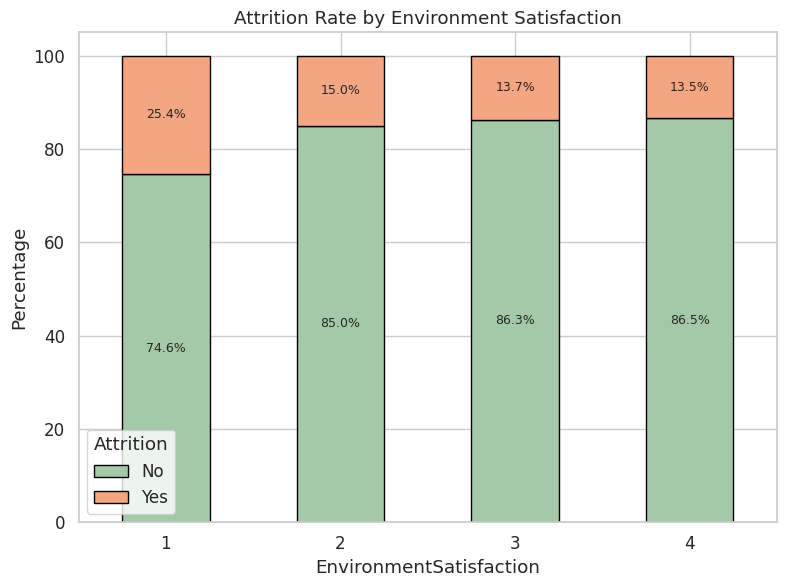

In [ ]:
plot2 = plot_stacked_percentage_bar('EnvironmentSatisfaction', 'Attrition Rate by Environment Satisfaction')
plot2.show()

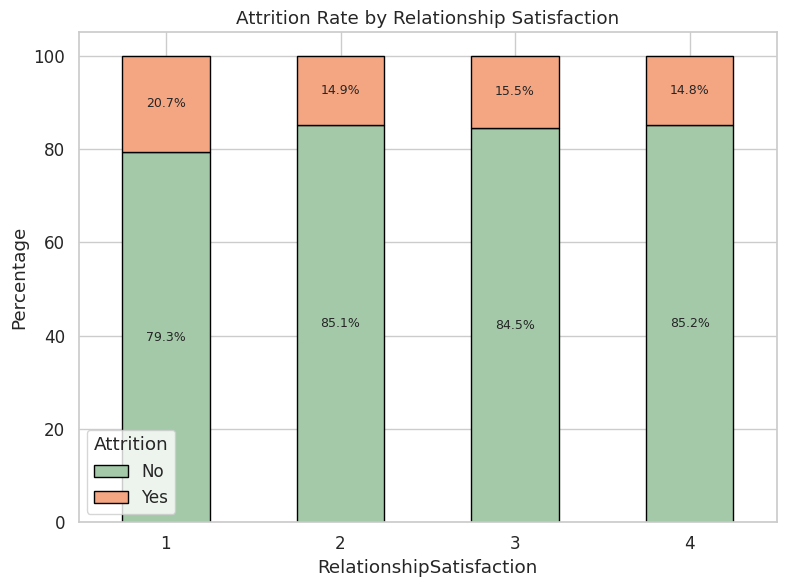

In [ ]:
plot3 = plot_stacked_percentage_bar('RelationshipSatisfaction', 'Attrition Rate by Relationship Satisfaction')
plot3.show()

### **Combination of all categories**

In [ ]:
df['MeanSatisfaction'] = df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)

In [ ]:
def satisfaction_level(mean_value):
    if mean_value <= 2:
        return 'Low'
    elif mean_value <= 3:
        return 'Medium'
    else:
        return 'High'

In [ ]:
df['SatisfactionLevel'] = df['MeanSatisfaction'].apply(satisfaction_level)

In [ ]:
satisfaction_counts = df['SatisfactionLevel'].value_counts().reset_index()
satisfaction_counts.columns = ['SatisfactionLevel', 'Count']

total_count = satisfaction_counts['Count'].sum()
satisfaction_counts['Percentage'] = (satisfaction_counts['Count'] / total_count * 100).round(2)

print(satisfaction_counts)

  SatisfactionLevel  Count  Percentage
0            Medium    803       54.63
1              High    378       25.71
2               Low    289       19.66


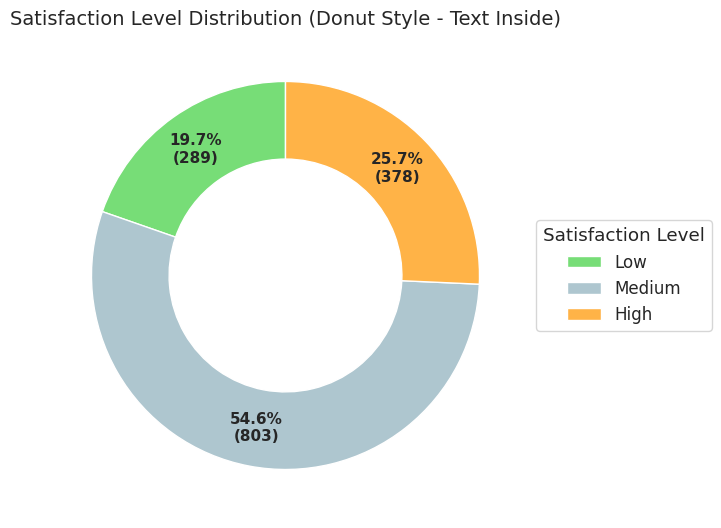

In [ ]:
satisfaction_counts_sorted = satisfaction_counts.set_index('SatisfactionLevel').loc[['Low', 'Medium', 'High']].reset_index()
counts = satisfaction_counts_sorted['Count']
labels = satisfaction_counts_sorted['SatisfactionLevel']
total = counts.sum()

colors = ['#77DD77', '#AEC6CF', '#FFB347']

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts = ax.pie(
    counts,
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.8 * np.cos(np.deg2rad(angle))
    y = 0.8 * np.sin(np.deg2rad(angle))
    percent = counts[i] / total * 100
    label = f"{percent:.1f}%\n({counts[i]})"
    ax.text(x, y, label, ha='center', va='center', fontsize=11, weight='bold')

ax.set_title('Satisfaction Level Distribution (Donut Style - Text Inside)', fontsize=14)
ax.legend(wedges, labels, title="Satisfaction Level", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

In [ ]:
satisfaction_attrition_dist = (
    df
    .groupby(['SatisfactionLevel', 'Attrition'])
    .size()
    .unstack(fill_value=0)
)

satisfaction_attrition_percent = (
    satisfaction_attrition_dist
    .div(satisfaction_attrition_dist.sum(axis=1), axis=0) * 100
).round(2)

print("\nPrecentege:\n", satisfaction_attrition_percent)


Precentege:
 Attrition             No    Yes
SatisfactionLevel              
High               88.36  11.64
Low                74.39  25.61
Medium             85.18  14.82


In [ ]:
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})

def plot_stacked_percentage_bar_sorted(column, title):
    counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    desired_order = ['Low', 'Medium', 'High']
    counts = counts.loc[desired_order]

    totals = counts.sum(axis=1)
    percentages = counts.div(totals, axis=0) * 100

    ax = percentages.plot(kind='bar', stacked=True, figsize=(8, 6),
                          color=['#a3c9a8', '#f4a582'], edgecolor='black')

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(['No', 'Yes'], title='Attrition')

    for i, total in enumerate(totals):
        bottom = 0
        for j, value in enumerate(percentages.iloc[i]):
            if value > 5:
                ax.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=9)
            bottom += value

    plt.tight_layout()
    plt.show()

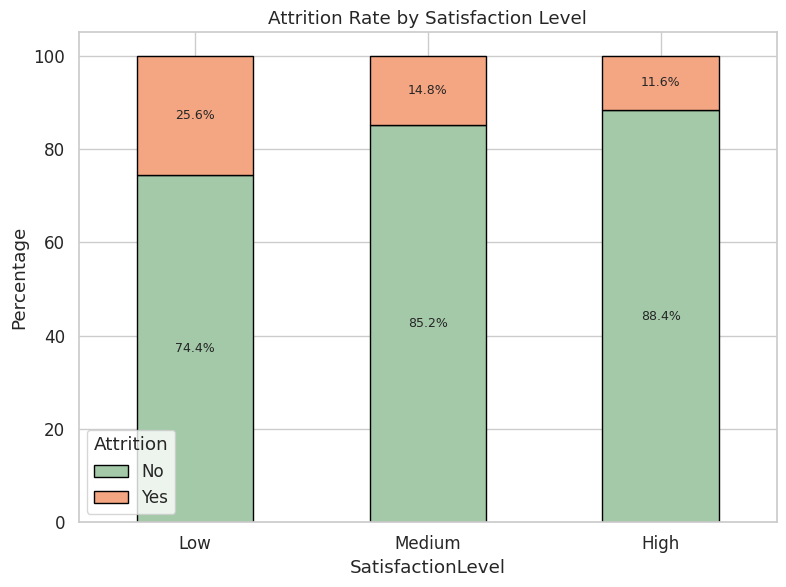

In [ ]:
plot_stacked_percentage_bar_sorted('SatisfactionLevel', 'Attrition Rate by Satisfaction Level')

### ***Insights***



1. ***Job Satisfaction -***   When employees are very dissatisfied (score = 1), the attrition rate jumps to 22.8%. But at levels 2 and 3, it stays steady around 16.5%, and only drops significantly to 11.3% at the highest satisfaction level (4).
Bottom line: Only very high job satisfaction truly reduces the chance of leaving. **Bottom line:** Only very high job satisfaction truly reduces the chance of leaving.
2. ***Environment Satisfaction -*** Same story here, level 1 shows a high 25.4% attrition rate.
But from levels 2 to 4, the rates are quite similar (around 13–15%) without a clear downward trend. **This means** a bad work environment clearly pushes people out, but small improvements might not be enough to retain them.
3. ***Relationship Satisfaction -*** With a low score of 1, attrition hits 20.7%, but at levels 2–4, it flattens around 15%. So only when employees feel a strong lack of connection with others do they tend to leave more.
4. ***The overall satisfaction level*** was calculated based on the average of three factors: job satisfaction, environment satisfaction, and relationship satisfaction. **The data shows** that approximately 54.6% of employees are in the medium satisfaction group, 25.7% in the high group, and 19.7% in the low satisfaction group.
5. ***When combining the three satisfaction variables***, it becomes evident that higher overall satisfaction significantly reduces attrition rates – with 25.6% attrition among employees with low satisfaction compared to just 11.6% among those with high satisfaction. This highlights satisfaction as a crucial factor in employee retention.



##**Second Question - How do work and personal life pressures affect employee turnover?**

To answer the question “How do work and personal life pressures affect employee turnover?”, we will examine three variables from the dataset: OverTime (indicating workload), DistanceFromHome (representing physical distance that may contribute to burnout), and WorkLifeBalance (reflecting satisfaction with the balance between work and personal life).

### **Each category separately**

In [ ]:
def plot_stacked_percentage_bar(column, title):
    counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    totals = counts.sum(axis=1)
    percentages = counts.div(totals, axis=0) * 100

    ax = percentages.plot(kind='bar', stacked=True, figsize=(8, 6),
                          color=['#819A91', '#DA6C6C'], edgecolor='black')

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(['No', 'Yes'], title='Attrition')

    for i, total in enumerate(totals):
        bottom = 0
        for j, value in enumerate(percentages.iloc[i]):
            if value > 5:
                ax.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=9, color='black')
            bottom += value

    plt.tight_layout()
    plt.show()

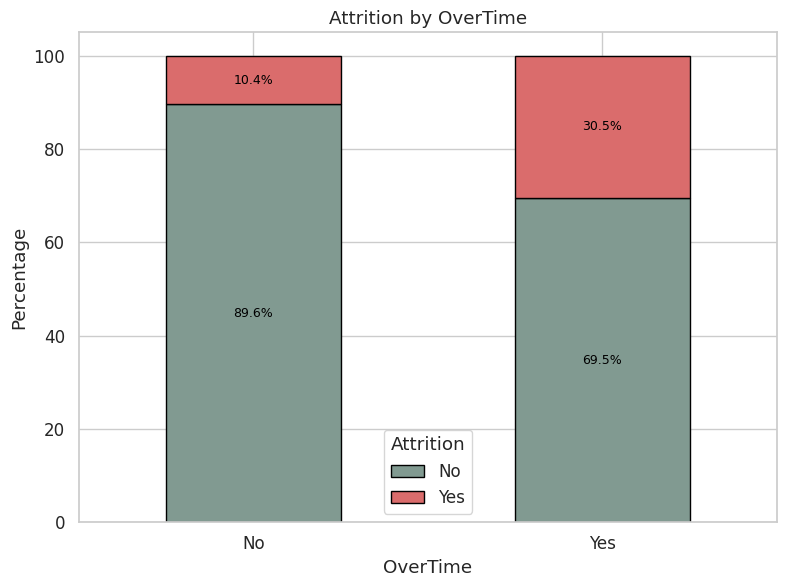

In [ ]:
# Over Time

plot_stacked_percentage_bar('OverTime', 'Attrition by OverTime')

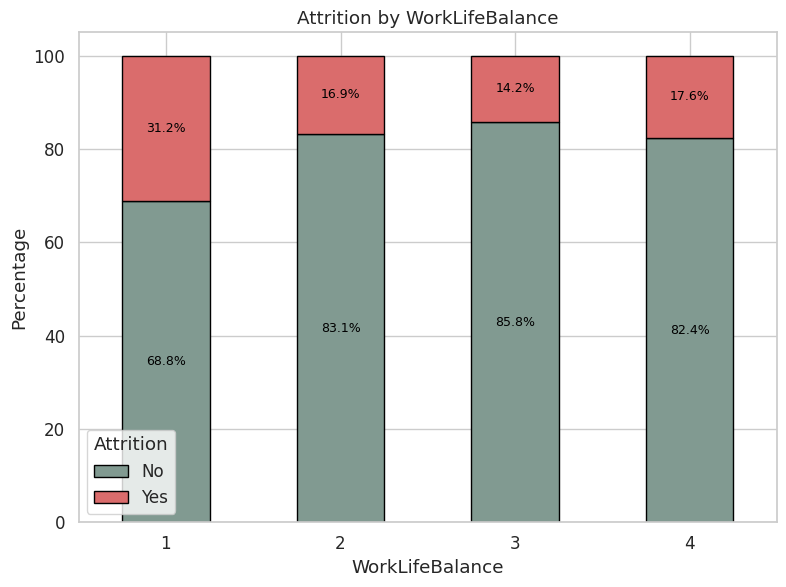

In [ ]:
plot_stacked_percentage_bar('WorkLifeBalance', 'Attrition by WorkLifeBalance')

/tmp/ipython-input-336-4951698.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = temp_df.groupby([column, 'Attrition']).size().unstack(fill_value=0)


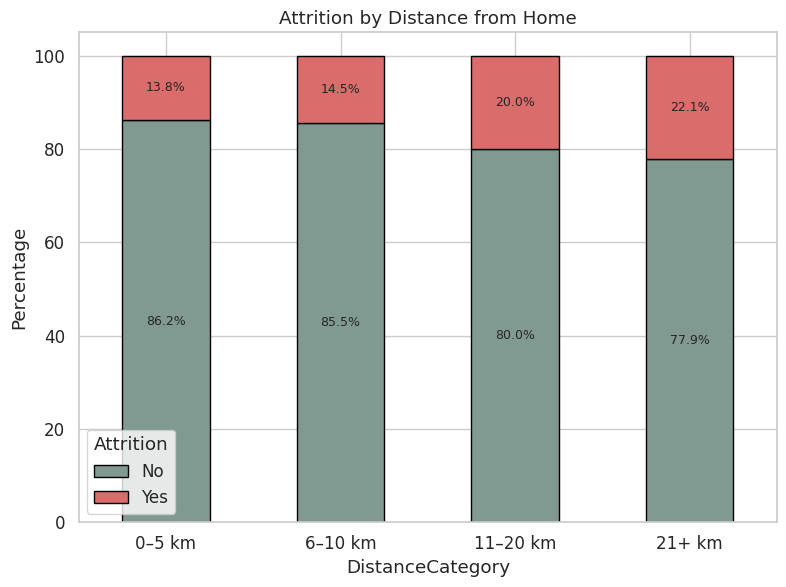

In [ ]:
def plot_stacked_percentage_bar(column, title):
    temp_df = df.copy()

    if column == 'DistanceCategory':
        temp_df['DistanceCategory'] = pd.cut(
            temp_df['DistanceFromHome'],
            bins=[0, 5, 10, 20, temp_df['DistanceFromHome'].max()],
            labels=['0–5 km', '6–10 km', '11–20 km', '21+ km']
        )

    counts = temp_df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    totals = counts.sum(axis=1)
    percentages = counts.div(totals, axis=0) * 100

    ax = percentages.plot(kind='bar', stacked=True, figsize=(8, 6),
                          color=['#819A91', '#DA6C6C'], edgecolor='black')

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(['No', 'Yes'], title='Attrition')

    for i, total in enumerate(totals):
        bottom = 0
        for j, value in enumerate(percentages.iloc[i]):
            if value > 5:
                ax.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=9)
            bottom += value

    plt.tight_layout()
    plt.show()

plot_stacked_percentage_bar('DistanceCategory', 'Attrition by Distance from Home')

### **Division into profiles**

Arranged from the best conditions for the employee to the worst

1. **PerfectBalance -** No overtime, close to home, good balance.
2. **BusyButSatisfied -** Working overtime, close to home, good work-life balance.
3. **SatisfiedButFar -** No overtime, far from home, good work-life balance.
4. **StretchedThin -** Working overtime, far from home, moderate work-life balance
5. **CloseButUnbalanced -** No overtime, close to home, poor work-life balance.
6. **RemoteAndUnsatisfied -** No overtime, far from home, poor work-life balance
7. **OverworkedRemote -** Working overtime, far from home, poor work-life balance.
8. **MixedBag -** All other combinations that do not match the above categories.



In [ ]:
def categorize_employee(row):
    overtime = row['OverTime']
    distance = row['DistanceFromHome']
    balance = row['WorkLifeBalance']

    if overtime == 'No' and distance <= 10 and balance in [3, 4]:
        return 'PerfectBalance'
    elif overtime == 'Yes' and distance <= 10 and balance in [3, 4]:
        return 'BusyButSatisfied'
    elif overtime == 'No' and distance > 10 and balance in [3, 4]:
        return 'SatisfiedButFar'
    elif overtime == 'Yes' and distance > 10 and balance in [3, 4]:
        return 'StretchedThin'
    elif overtime == 'No' and distance <= 10 and balance in [1, 2]:
        return 'CloseButUnbalanced'
    elif overtime == 'No' and distance > 10 and balance in [1, 2]:
        return 'RemoteAndUnsatisfied'
    elif overtime == 'Yes' and distance > 10 and balance in [1, 2]:
        return 'OverworkedRemote'
    else:
        return 'MixedBag'

df['WorkLifeProfile'] = df.apply(categorize_employee, axis=1)

profile_counts = df['WorkLifeProfile'].value_counts().reset_index()
profile_counts.columns = ['Profile', 'Count']

In [ ]:
all_profiles = [
    'PerfectBalance',
    'BusyButSatisfied',
    'SatisfiedButFar',
    'StretchedThin',
    'CloseButUnbalanced',
    'RemoteAndUnsatisfied',
    'OverworkedRemote',
    'MixedBag'
]

profile_counts = df['WorkLifeProfile'].value_counts().reindex(all_profiles, fill_value=0).reset_index()
profile_counts.columns = ['Profile', 'Count']
print(profile_counts)
print(f"\nTotal employees: {profile_counts['Count'].sum()}")

                Profile  Count
0        PerfectBalance    538
1      BusyButSatisfied    198
2       SatisfiedButFar    218
3         StretchedThin     92
4    CloseButUnbalanced    209
5  RemoteAndUnsatisfied     89
6      OverworkedRemote     45
7              MixedBag     81

Total employees: 1470


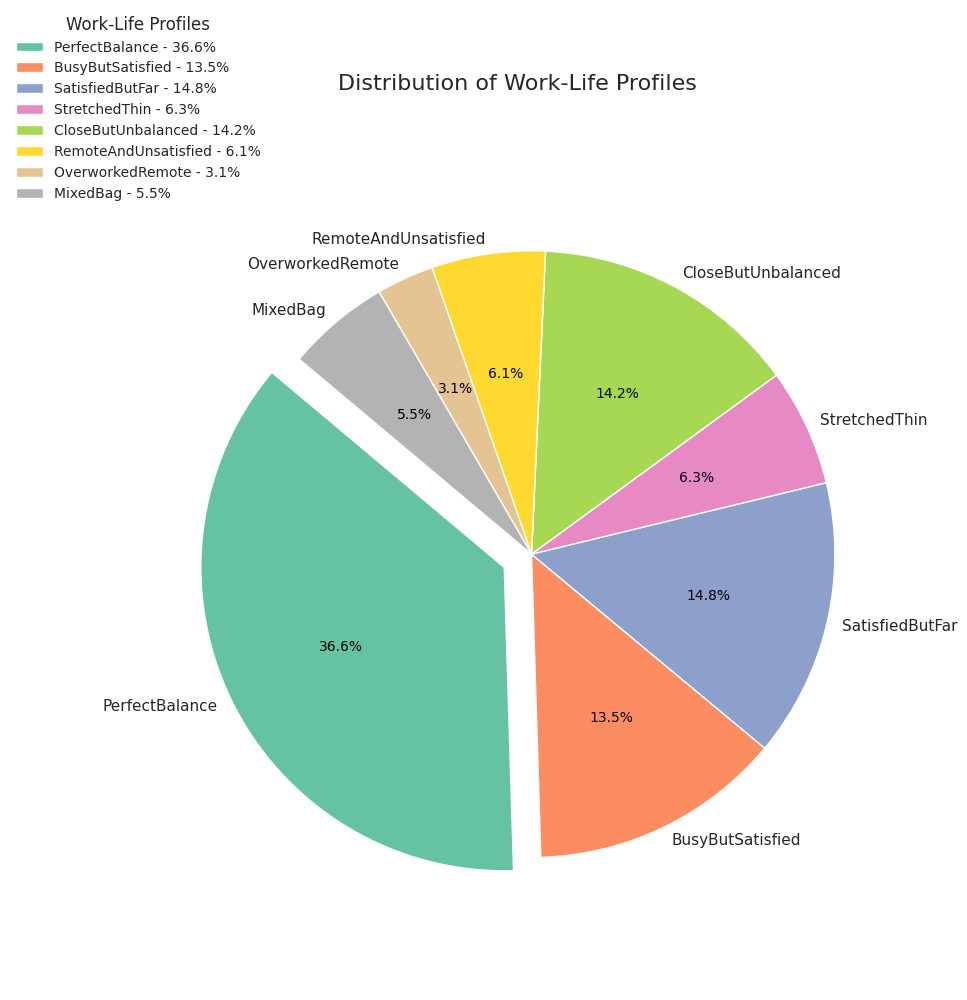

In [ ]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3',
          '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

max_index = profile_counts['Count'].idxmax()
explode = [0.1 if i == max_index else 0 for i in range(len(profile_counts))]

total = profile_counts['Count'].sum()
labels_with_pct = [
    f"{row['Profile']} - {row['Count']/total:.1%}"
    for _, row in profile_counts.iterrows()
]

fig, ax = plt.subplots(figsize=(10, 10))

patches, texts, autotexts = ax.pie(
    profile_counts['Count'],
    labels=profile_counts['Profile'],
    colors=colors,
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 11},
    shadow=False,
    labeldistance=1.05
)

for text in autotexts:
    text.set_color('black')
    text.set_fontsize(10)

ax.legend(
    patches,
    labels_with_pct,
    title="Work-Life Profiles",
    loc='upper left',
    bbox_to_anchor=(-0.25, 1.15),
    fontsize=10,
    title_fontsize=12,
    frameon=False
)

plt.title('Distribution of Work-Life Profiles', fontsize=16, pad=30)

ax.axis('equal')
plt.tight_layout()
plt.show()

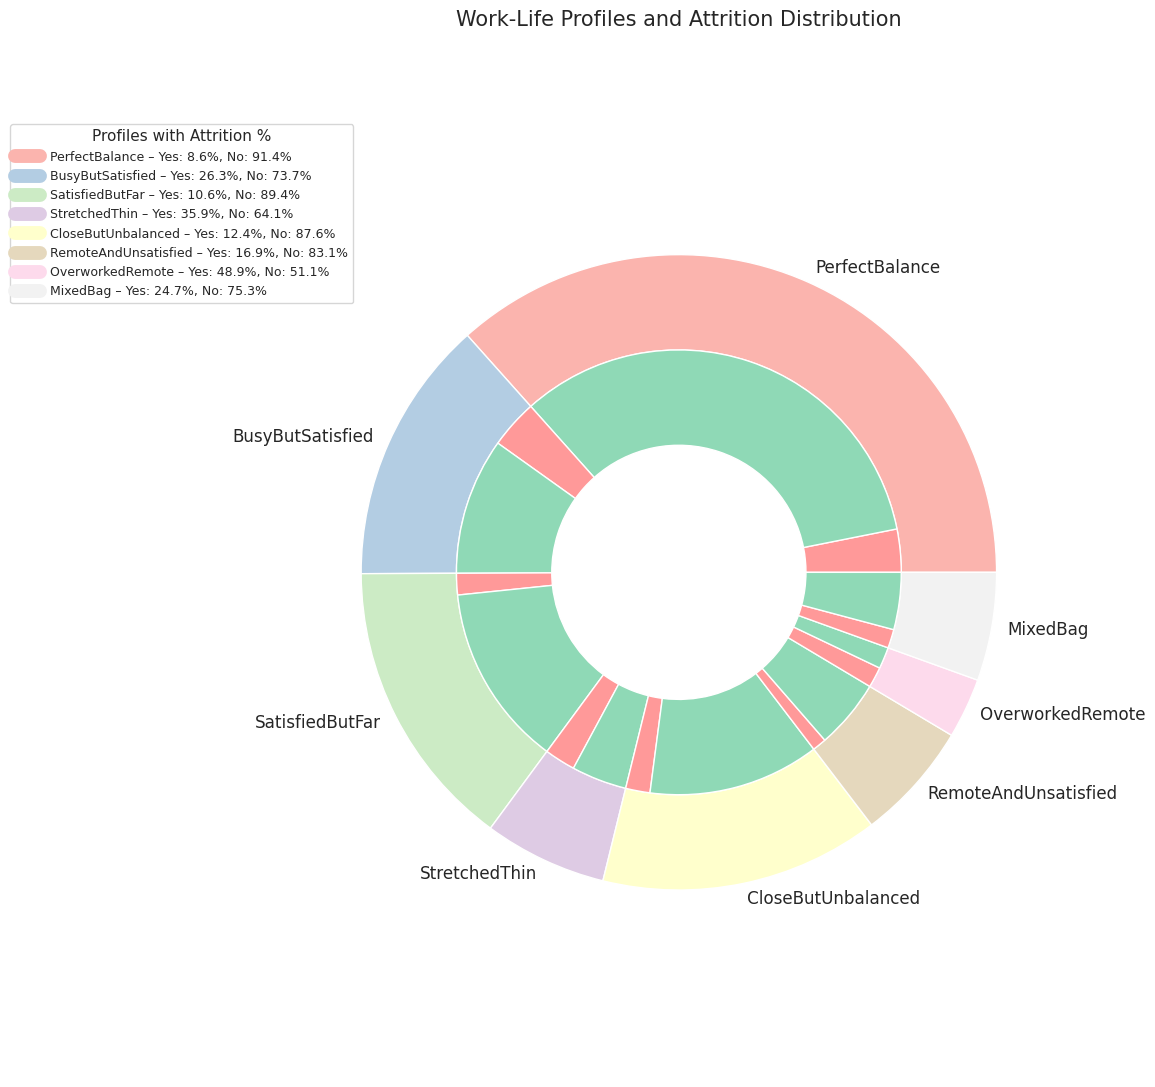

In [ ]:
all_profiles = [
    'PerfectBalance',
    'BusyButSatisfied',
    'SatisfiedButFar',
    'StretchedThin',
    'CloseButUnbalanced',
    'RemoteAndUnsatisfied',
    'OverworkedRemote',
    'MixedBag'
]

attrition_df = (
    df.groupby(['WorkLifeProfile', 'Attrition'])
    .size()
    .unstack(fill_value=0)
    .reindex(all_profiles)
    .reset_index()
)

outer_labels = attrition_df['WorkLifeProfile']
outer_sizes = attrition_df['Yes'] + attrition_df['No']
outer_colors = plt.cm.Pastel1(np.linspace(0, 1, len(outer_labels)))

inner_sizes = []
inner_colors = []
for _, row in attrition_df.iterrows():
    inner_sizes.extend([row['Yes'], row['No']])
    inner_colors.extend(['#ff9999', '#8fd9b6'])  # Yes = Red, No = Green

legend_labels = []
legend_patches = []
for i, row in attrition_df.iterrows():
    total = row['Yes'] + row['No']
    yes_pct = row['Yes'] / total * 100 if total else 0
    no_pct = row['No'] / total * 100 if total else 0

    label = (
        f"{row['WorkLifeProfile']} – "
        f"Yes: {yes_pct:.1f}%, No: {no_pct:.1f}%"
    )
    legend_labels.append(label)
    legend_patches.append(plt.Line2D([0], [0], color=outer_colors[i], linewidth=10))

fig, ax = plt.subplots(figsize=(12, 11))
ax.axis('equal')

ax.pie(
    outer_sizes,
    radius=1,
    labels=outer_labels,
    labeldistance=1.05,
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

ax.pie(
    inner_sizes,
    radius=0.7,
    labels=None,
    colors=inner_colors,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

ax.legend(
    legend_patches,
    legend_labels,
    title="Profiles with Attrition %",
    loc='upper left',
    bbox_to_anchor=(-0.35, 0.95),
    fontsize=9,
    title_fontsize=11
)

plt.title('Work-Life Profiles and Attrition Distribution', fontsize=15, pad=30)
plt.tight_layout()
plt.show()

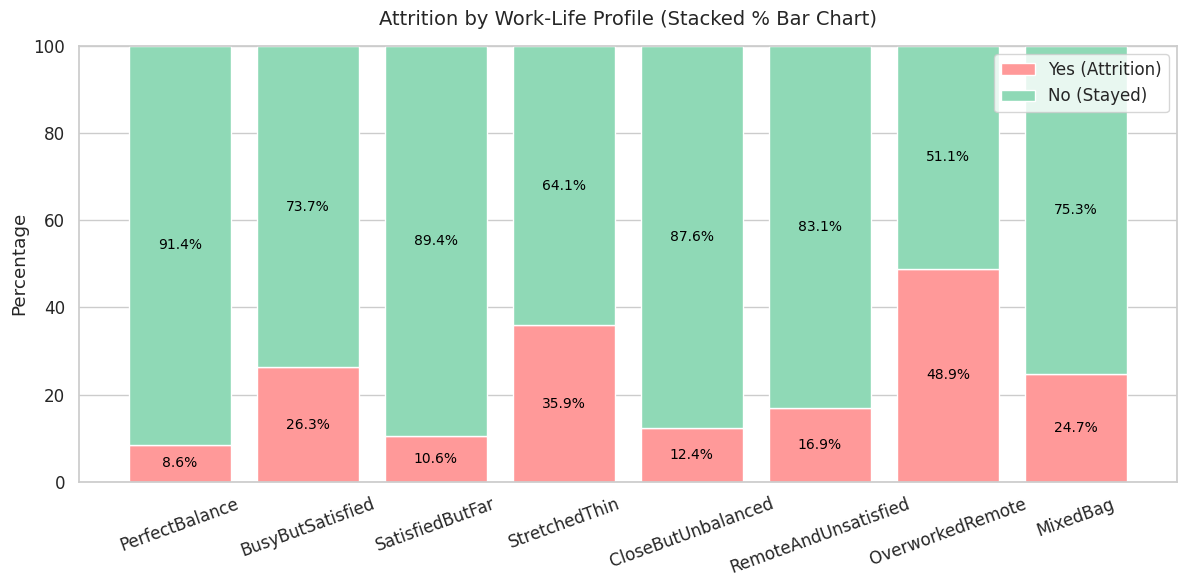

In [ ]:
all_profiles = [
    'PerfectBalance',
    'BusyButSatisfied',
    'SatisfiedButFar',
    'StretchedThin',
    'CloseButUnbalanced',
    'RemoteAndUnsatisfied',
    'OverworkedRemote',
    'MixedBag'
]

attrition_df = (
    df.groupby(['WorkLifeProfile', 'Attrition'])
    .size()
    .unstack(fill_value=0)
    .reindex(all_profiles)
)

attrition_percent = attrition_df.div(attrition_df.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 6))

yes_bars = ax.bar(
    attrition_percent.index,
    attrition_percent['Yes'],
    label='Yes (Attrition)',
    color='#ff9999'
)

no_bars = ax.bar(
    attrition_percent.index,
    attrition_percent['No'],
    bottom=attrition_percent['Yes'],
    label='No (Stayed)',
    color='#8fd9b6'
)

for bar_yes, bar_no, yes_pct, no_pct in zip(yes_bars, no_bars,
                                             attrition_percent['Yes'],
                                             attrition_percent['No']):
    ax.text(
        bar_yes.get_x() + bar_yes.get_width() / 2,
        bar_yes.get_height() / 2,
        f'{yes_pct:.1f}%',
        ha='center', va='center', fontsize=10, color='black'
    )
    ax.text(
        bar_no.get_x() + bar_no.get_width() / 2,
        bar_yes.get_height() + bar_no.get_height() / 2,
        f'{no_pct:.1f}%',
        ha='center', va='center', fontsize=10, color='black'
    )

ax.set_ylabel('Percentage')
ax.set_title('Attrition by Work-Life Profile (Stacked % Bar Chart)', fontsize=14, pad=15)
ax.set_ylim(0, 100)
ax.legend(loc='upper right')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### **Insights**

**Insights from Individual Variables and Their Impact on Attrition OverTime -**

1. ***OverTime:*** Working overtime is clearly associated with a sharp increase in attrition rates. Approximately 30.5% of employees who worked overtime left the organization, compared to only 10.4% among those who did not.
This represents nearly a 3x difference, highlighting the significant impact of workload on employee retention.
2. ***Work-Life Balance:*** The better the perceived work-life balance, the lower the risk of attrition.Employees who rated their work-life balance as 1 out of 4 had an attrition rate of over 30%, compared to less than 18% among those with higher ratings.In other words, poor work-life balance doubles the likelihood of leaving.
3. ***Distance from Home:*** Attrition rates increase as commuting distance increases.For example, attrition rises from 13.8% among those living within 0–5 km to 22.1% among those living over 21 km away.
However, the effect of distance appears to be weaker than that of overtime or work-life balance.

---

**Insights from the Combined Work-Life Profiles -**

After combining all three variables (OverTime, Work-Life Balance, Distance), employees were grouped into eight distinct work-life profiles.
1.   **PerfectBalance:** The largest profile, representing 36.6% of all employees. These employees do not work overtime, live nearby (≤10 km), and report high work-life balance (scores 3–4).
Their attrition rate is the lowest among all profiles, at just 8.6%.
2.   **OverworkedRemote:** The profile with the highest attrition rate, at nearly 49%. These employees work overtime, report poor work-life balance (scores 1–2), yet live nearby. This demonstrates that overtime and balance are more influential than proximity to the office.

---

**Overall Conclusion -**
Employee attrition is strongly influenced by a combination of three key factors: Overtime, Work-Life Balance, and Distance from Home.
However, the data clearly shows that the most impactful factors are overtime and work-life balance.

## **Third Question -** How does career stagnation — measured through time since last promotion, years in current role, job level, and number of manager changes, relate to employee attrition?

In [ ]:
def plot_stacked_percentage_bar(column, title=None, bins=None, labels=None):
    data = df.copy()

    if bins is not None:
        data[column] = pd.cut(data[column], bins=bins, labels=labels)

    counts = data.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    totals = counts.sum(axis=1)
    percentages = counts.div(totals, axis=0) * 100

    ax = percentages.plot(
        kind='bar',
        stacked=True,
        figsize=(9, 6),
        color=['#819A91', '#DA6C6C'],
        edgecolor='black'
    )

    plt.title(title or f'Attrition by {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=20)
    plt.legend(['Stayed (No)', 'Left (Yes)'], title='Attrition')

    for i, total in enumerate(totals):
        bottom = 0
        for j, value in enumerate(percentages.iloc[i]):
            if value > 5:
                ax.text(
                    i, bottom + value / 2,
                    f'{value:.1f}%',
                    ha='center', va='center', fontsize=9, color='black'
                )
            bottom += value

        ax.text(
            i, 102,
            f'n = {int(total)}',
            ha='center', va='bottom',
            fontsize=9, color='gray'
        )

    plt.ylim(0, 110)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-342-1146415383.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([column, 'Attrition']).size().unstack(fill_value=0)


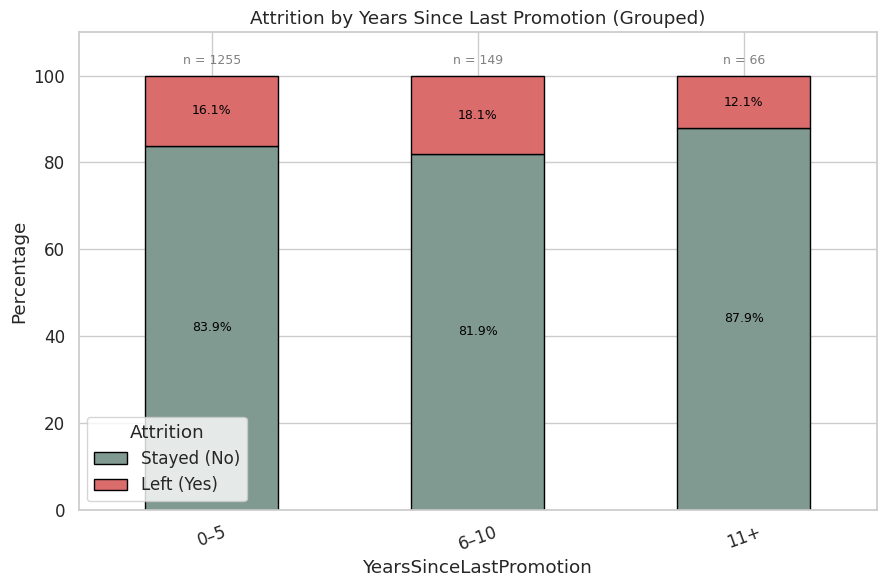

In [ ]:
plot_stacked_percentage_bar(
    column='YearsSinceLastPromotion',
    title='Attrition by Years Since Last Promotion (Grouped)',
    bins=[-1, 5, 10, df['YearsSinceLastPromotion'].max()],
    labels = ['0–5', '6–10', '11+']
)

/tmp/ipython-input-342-1146415383.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([column, 'Attrition']).size().unstack(fill_value=0)


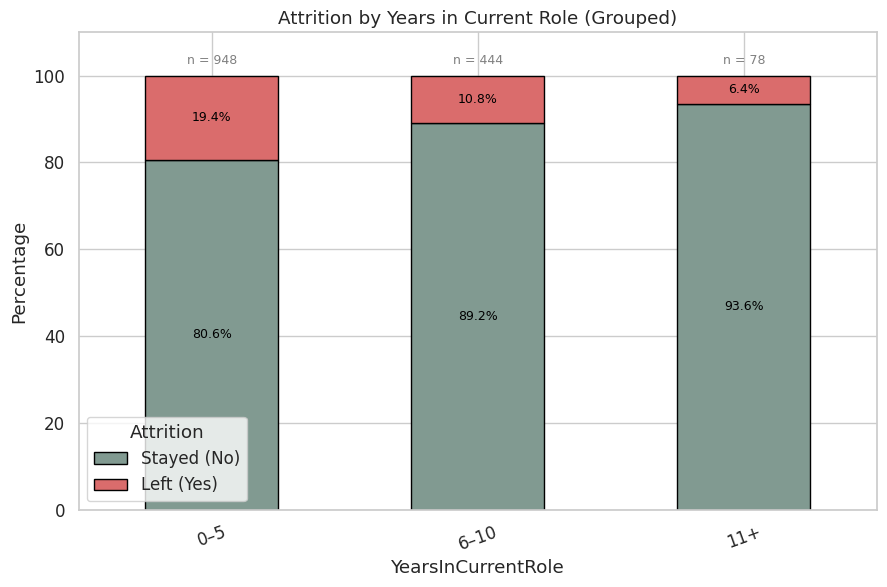

In [ ]:
plot_stacked_percentage_bar(
    column='YearsInCurrentRole',
    title='Attrition by Years in Current Role (Grouped)',
    bins=[-1, 5, 10, df['YearsInCurrentRole'].max()],
    labels = ['0–5', '6–10', '11+']
)

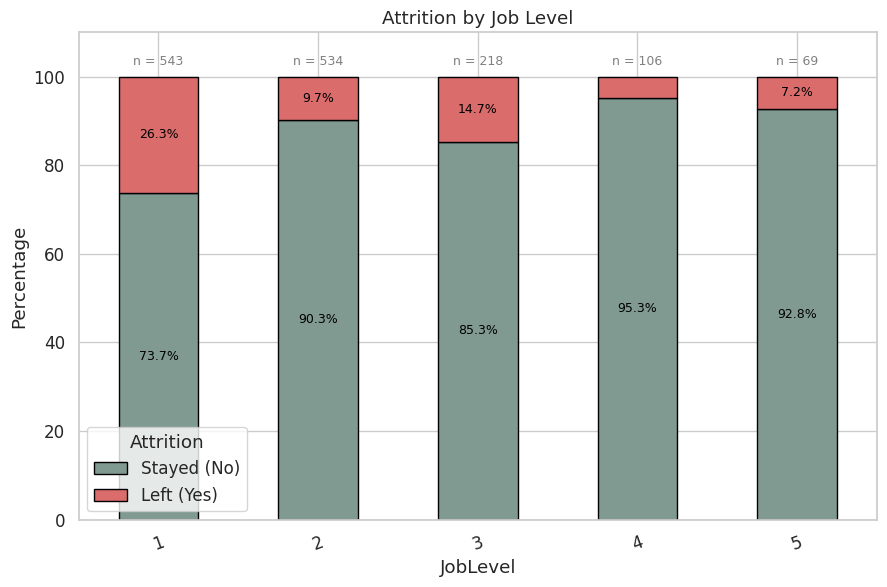

In [ ]:
plot_stacked_percentage_bar('JobLevel', 'Attrition by Job Level')

/tmp/ipython-input-342-1146415383.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([column, 'Attrition']).size().unstack(fill_value=0)


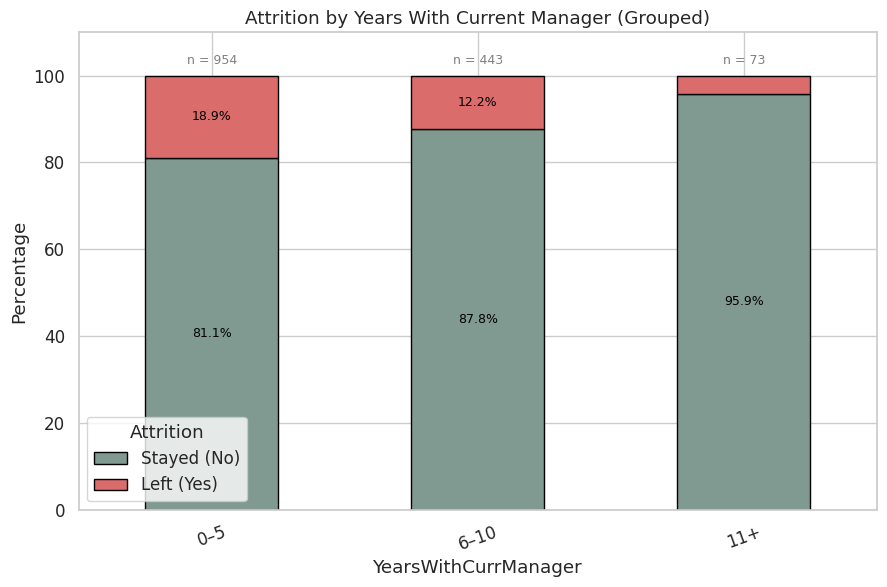

In [ ]:
plot_stacked_percentage_bar(
    column='YearsWithCurrManager',
    title='Attrition by Years With Current Manager (Grouped)',
    bins=[-1, 5, 10, df['YearsInCurrentRole'].max()],
    labels = ['0–5', '6–10', '11+']
)

/tmp/ipython-input-342-1146415383.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([column, 'Attrition']).size().unstack(fill_value=0)


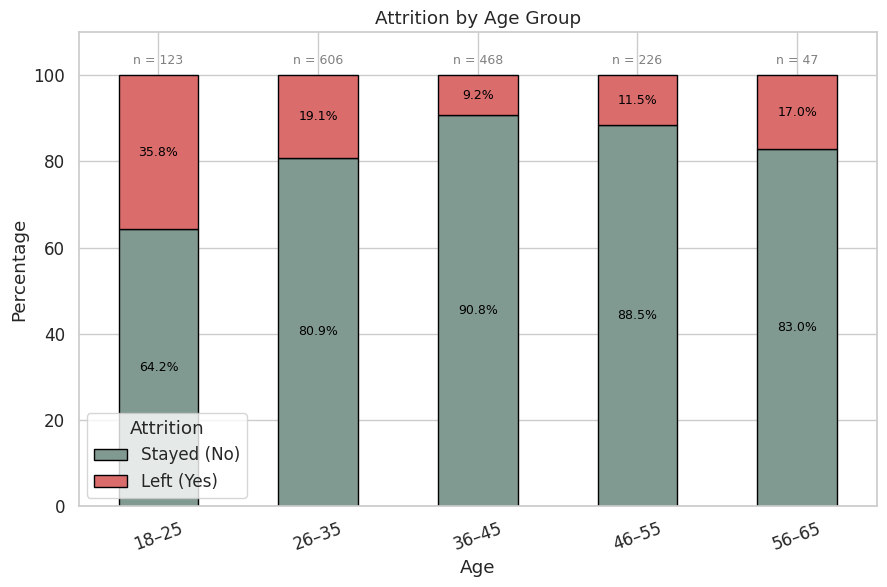

In [ ]:
plot_stacked_percentage_bar(
    column='Age',
    title='Attrition by Age Group',
    bins=[17, 25, 35, 45, 55, 65],
    labels=['18–25', '26–35', '36–45', '46–55', '56–65']
)

### **StagnationScore**

The Stagnation Score measures how much an employee may be professionally "stuck" based on four factors:

*   YearsSinceLastPromotion – How long it's been since the last promotion. ⬆️ More years = more stagnation.
*   YearsInCurrentRole – How long the employee has been in the same role.
⬆️ More years = more stagnation.
*  JobLevel – The employee's current job level.
⬇️ Lower level = more stagnation (that’s why we calculate it as 1 - rank).
* YearsWithCurrManager – How long the employee has worked with the same manager.
⬆️ More years = fewer new opportunities = more stagnation.

We used in **rank function**.
The function rank(pct=True) calculates the relative position of each value in the column and returns a score between 0 and 1, representing the percentile in which the employee falls compared to others.

In [ ]:
df['StagnationScore'] = (
    df['YearsSinceLastPromotion'].rank(pct=True) +    # Time since last promotion – more time = more stagnation
    df['YearsInCurrentRole'].rank(pct=True) +         # Time in current role – longer time = more stagnation
    (1 - df['JobLevel'].rank(pct=True)) +             # Job level – lower levels suggest more stagnation
    df['YearsWithCurrManager'].rank(pct=True)         # Time with current manager – longer time may imply fewer new opportunities
) / 4  # Average of the four indicators

In [ ]:
def classify_stagnation(score):
    if score <= 0.33:
        return 'Low'
    elif score <= 0.66:
        return 'Medium'
    else:
        return 'High'

df['StagnationLevel'] = df['StagnationScore'].apply(classify_stagnation)

In [ ]:
df['StagnationLevel'].value_counts()

StagnationLevel
Medium    928
High      280
Low       262
Name: count, dtype: int64

/tmp/ipython-input-342-1146415383.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby([column, 'Attrition']).size().unstack(fill_value=0)


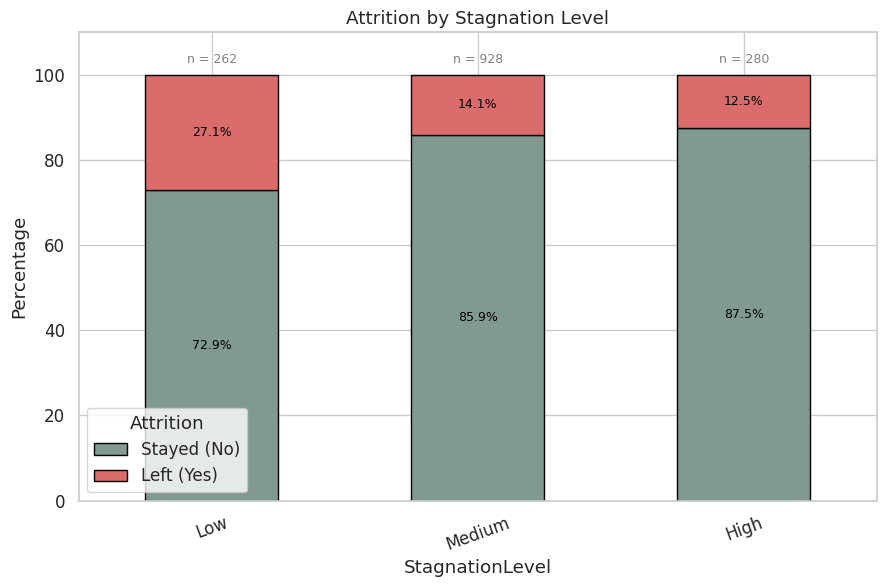

In [ ]:
df['StagnationLevel'] = pd.Categorical(
    df['StagnationLevel'],
    categories=['Low', 'Medium', 'High'],
    ordered=True
)

plot_stacked_percentage_bar('StagnationLevel', 'Attrition by Stagnation Level')

In [ ]:
correlation = df['StagnationScore'].corr(df['Attrition_numerical'])
print(f"Correlation between StagnationScore and Attrition: {correlation:.3f}")

Correlation between StagnationScore and Attrition: -0.098


***Insights -***

1. **Years Since Last Promotion:** Employees who haven’t been promoted in the last 6–10 years are more likely to leave (18.1%). After 11 years without a promotion, the attrition rate drops to 12.1%. This may include older or very loyal employees.
2. **Years in Current Role:** The longer employees stay in the same role, the less likely they are to leave.
3. **Job Level:** Employees at lower job levels are much more likely to leave (26.3%) compared to those in higher positions, where only about 9% leave.
4. **Age:** Younger employees leave at a much higher rate (35.8%), probably because they are still exploring opportunities. Mid-career employees tend to be more stable and are less likely to leave.
5. Employees with a low sense of stagnation leave at much higher rates (27.1%), while those with higher stagnation scores have lower attrition rates (down to 12.5%).
This finding is surprising — feeling stuck doesn't seem to push employees to leave, but rather leads to staying in place.

#**🔗 Part A**

##**Leckage**

In [ ]:
df.groupby('Attrition')['PerformanceRating'].count()

Attrition
No     1233
Yes     237
Name: PerformanceRating, dtype: int64

In [ ]:
df.groupby('Attrition')['PerformanceRating'].describe()

count      mean       std  min  25%  50%  75%  max
Attrition                                                     
No         1233.0  3.153285  0.360408  3.0  3.0  3.0  3.0  4.0
Yes         237.0  3.156118  0.363735  3.0  3.0  3.0  3.0  4.0

In [ ]:
df['PerformanceRating'].isnull().groupby(df['Attrition']).sum()

Attrition
No     0
Yes    0
Name: PerformanceRating, dtype: int64

In [ ]:
df.groupby('Attrition')['PercentSalaryHike'].count()

Attrition
No     1233
Yes     237
Name: PercentSalaryHike, dtype: int64

In [ ]:
df.groupby('Attrition')['PercentSalaryHike'].describe()

count       mean       std   min   25%   50%   75%   max
Attrition                                                           
No         1233.0  15.231144  3.639511  11.0  12.0  14.0  18.0  25.0
Yes         237.0  15.097046  3.770294  11.0  12.0  14.0  17.0  25.0

In [ ]:
df['PercentSalaryHike'].isnull().groupby(df['Attrition']).sum()

Attrition
No     0
Yes    0
Name: PercentSalaryHike, dtype: int64

During the feature selection process, we initially suspected that the PerformanceRating and PercentSalaryHike columns might introduce data leakage, as these values could potentially be assigned only to employees who are still with the company, indirectly indicating attrition.
However, after examining the data, we found that both columns are present for all employees — including those who left — with no missing values. In addition, the distributions (mean, range, and percentiles) are nearly identical between the two groups. Therefore, we concluded that no leakage exists, and these features can safely be used in the model.

##**A1 - Model 1**

In [ ]:
# A1: Logistic Regression – All Features + Over Sampling

original_df = pd.read_csv('Employee-Attrition.csv')

cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
original_df = original_df.drop(columns=[col for col in cols_to_drop if col in original_df.columns])

original_df['Attrition'] = original_df['Attrition'].map({'Yes': 1, 'No': 0})

X = original_df.drop(columns=['Attrition'])
y = original_df['Attrition']

categorical_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=0
)

X_train_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
y_train_series = y_train.reset_index(drop=True)
X_train_df['Attrition'] = y_train_series

df_majority = X_train_df[X_train_df['Attrition'] == 0]
df_minority = X_train_df[X_train_df['Attrition'] == 1]

print("Original training set size:")
print("Majority class (0):", len(df_majority))
print("Minority class (1):", len(df_minority))

if len(df_minority) == 0:
    raise ValueError("No minority samples (Attrition=1) in training set. Try a different random_state or check the dataset.")

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=0
)

train_balanced = pd.concat([df_majority, df_minority_upsampled])
train_balanced = train_balanced.sample(frac=1, random_state=0).reset_index(drop=True)

print("\nBalanced training set size (after oversampling):")
print(train_balanced['Attrition'].value_counts())

y_train_balanced = train_balanced['Attrition']
X_train_balanced = train_balanced.drop(columns=['Attrition'])

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train_balanced, y_train_balanced)

y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Original training set size:
Majority class (0): 862
Minority class (1): 167

Balanced training set size (after oversampling):
Attrition
1    862
0    862
Name: count, dtype: int64

Confusion Matrix:
[[272  99]
 [ 17  53]]

Classification Report:
              precision    recall  f1-score   support

           0      0.941     0.733     0.824       371
           1      0.349     0.757     0.477        70

    accuracy                          0.737       441
   macro avg      0.645     0.745     0.651       441
weighted avg      0.847     0.737     0.769       441

Accuracy: 0.7369614512471655
Precision: 0.34868421052631576
Recall: 0.7571428571428571
F1 Score: 0.4774774774774775


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# A1: Logistic Regression – All Features + Over&Under Sampling


original_df = pd.read_csv('Employee-Attrition.csv')
original_df = original_df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'])
original_df['Attrition'] = original_df['Attrition'].map({'Yes': 1, 'No': 0})

X = original_df.drop(columns=['Attrition'])
y = original_df['Attrition']

# One-Hot Encoding
categorical_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

# Create DataFrame for manipulation
X_train_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
y_train_series = y_train.reset_index(drop=True)
X_train_df['Attrition'] = y_train_series

# Separate classes
df_majority = X_train_df[X_train_df['Attrition'] == 0]
df_minority = X_train_df[X_train_df['Attrition'] == 1]

# Print original training set size
print("Original training set size:")
print("Majority class (0):", len(df_majority))
print("Minority class (1):", len(df_minority))

# Determine target size for balance
target_n = min(len(df_majority), len(df_minority))  # balance to the minority class

# Undersample majority
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=target_n,
    random_state=0
)

# Oversample minority
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=target_n,
    random_state=0
)

# Combine and shuffle
train_balanced = pd.concat([df_majority_downsampled, df_minority_upsampled])
train_balanced = train_balanced.sample(frac=1, random_state=0).reset_index(drop=True)

# Print balanced training set size
print("\nBalanced training set size (after over & under sampling):")
print(train_balanced['Attrition'].value_counts())

# Prepare training data
y_train_balanced = train_balanced['Attrition']
X_train_balanced = train_balanced.drop(columns=['Attrition'])

# Train model
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Original training set size:
Majority class (0): 862
Minority class (1): 167

Balanced training set size (after over & under sampling):
Attrition
0    167
1    167
Name: count, dtype: int64

Confusion Matrix:
[[268 103]
 [ 20  50]]

Classification Report:
              precision    recall  f1-score   support

           0      0.931     0.722     0.813       371
           1      0.327     0.714     0.448        70

    accuracy                          0.721       441
   macro avg      0.629     0.718     0.631       441
weighted avg      0.835     0.721     0.755       441

Accuracy: 0.7210884353741497
Precision: 0.32679738562091504
Recall: 0.7142857142857143
F1 Score: 0.4484304932735426


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# A1: Logistic Regression – All Features + Over Sampling (Without deleting any column)

# Load the original dataset
original_df = pd.read_csv('Employee-Attrition.csv')

# Encode target variable
original_df['Attrition'] = original_df['Attrition'].map({'Yes': 1, 'No': 0})

# Separate features and target
X = original_df.drop(columns=['Attrition'])
y = original_df['Attrition']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=0
)

# Convert training data to DataFrame
X_train_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
y_train_series = y_train.reset_index(drop=True)
X_train_df['Attrition'] = y_train_series

# Split majority and minority classes
df_majority = X_train_df[X_train_df['Attrition'] == 0]
df_minority = X_train_df[X_train_df['Attrition'] == 1]

print("Original training set size:")
print("Majority class (0):", len(df_majority))
print("Minority class (1):", len(df_minority))

# Handle case of no minority samples
if len(df_minority) == 0:
    raise ValueError("No minority samples (Attrition=1) in training set. Try a different random_state or check the dataset.")

# Upsample the minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=0
)

# Combine to create a balanced training set
train_balanced = pd.concat([df_majority, df_minority_upsampled])
train_balanced = train_balanced.sample(frac=1, random_state=0).reset_index(drop=True)

print("\nBalanced training set size (after oversampling):")
print(train_balanced['Attrition'].value_counts())

# Prepare data for model training
y_train_balanced = train_balanced['Attrition']
X_train_balanced = train_balanced.drop(columns=['Attrition'])

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Original training set size:
Majority class (0): 862
Minority class (1): 167

Balanced training set size (after oversampling):
Attrition
1    862
0    862
Name: count, dtype: int64

Confusion Matrix:
[[274  97]
 [ 15  55]]

Classification Report:
              precision    recall  f1-score   support

           0      0.948     0.739     0.830       371
           1      0.362     0.786     0.495        70

    accuracy                          0.746       441
   macro avg      0.655     0.762     0.663       441
weighted avg      0.855     0.746     0.777       441

Accuracy: 0.746031746031746
Precision: 0.3618421052631579
Recall: 0.7857142857142857
F1 Score: 0.4954954954954955


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Model 1: Logistic Regression using all features**

- We trained a logistic regression model using all available features, after applying one-hot encoding to categorical variables.
- The data was split into 70% training and 30% test, with a fixed `random_state=0` for reproducibility.
- To address class imbalance (only ~16% of employees left), we applied **oversampling** to the minority class in the training set using manual resampling. The majority class was left untouched.
- The test set remained unchanged to reflect real-world class distribution.

**Results on Test Set:**
- *Accuracy:* **73.7%**
- *Recall (Attrition = 1):* **75.7%** – the model successfully identified most employees who actually left.
- *Precision (Attrition = 1):* **34.9%** – meaning a fair amount of false positives.
- *F1 Score:* **0.48** – moderate balance between precision and recall.

 *Interpretation:*  
The model is **recall-oriented**, catching most at-risk employees, which can be valuable for HR intervention. However, its relatively low precision means it may raise **too many false alarms**. Further refinement is needed to improve predictive confidence.


*NOTE:*  
In our model, we achieved **high recall** for employees who left (class 1), even though **precision was relatively low**.  
This trade-off is acceptable in this context, since it's more important for the company to **identify as many at-risk employees as possible**, even at the cost of some false positives.  
Early identification allows HR teams to **intervene proactively** before attrition happens.

##**A2 - Model 2**

In [ ]:
# A2: Logistic Regression – 10 Features + Over Sampling

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

features = [
    'YearsWithCurrManager',
    'Gender',
    'JobLevel',
    'YearsInCurrentRole',
    'Age',
    'MaritalStatus',
    'SatisfactionLevel',
    'WorkLifeProfile',
    'YearsSinceLastPromotion',
    'MonthlyIncome'
]

X = df[features]
y = df['Attrition']

categorical_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=0
)

X_train_df = pd.DataFrame(X_train.toarray() if hasattr(X_train, 'toarray') else X_train,
                          columns=preprocessor.get_feature_names_out())
y_train_series = y_train.reset_index(drop=True)
X_train_df['Attrition'] = y_train_series

df_majority = X_train_df[X_train_df['Attrition'] == 0]
df_minority = X_train_df[X_train_df['Attrition'] == 1]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=0
)

train_balanced = pd.concat([df_majority, df_minority_upsampled])
train_balanced = train_balanced.sample(frac=1, random_state=0).reset_index(drop=True)

print("Balanced class distribution:")
print(train_balanced['Attrition'].value_counts())

y_train_balanced = train_balanced['Attrition']
X_train_balanced = train_balanced.drop(columns=['Attrition'])

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train_balanced, y_train_balanced)

y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Balanced class distribution:
Attrition
1    862
0    862
Name: count, dtype: int64

Confusion Matrix:
[[283  88]
 [ 18  52]]

Classification Report:
              precision    recall  f1-score   support

           0      0.940     0.763     0.842       371
           1      0.371     0.743     0.495        70

    accuracy                          0.760       441
   macro avg      0.656     0.753     0.669       441
weighted avg      0.850     0.760     0.787       441

Accuracy: 0.7596371882086168
Precision: 0.37142857142857144
Recall: 0.7428571428571429
F1 Score: 0.49523809523809526


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# A2: Logistic Regression – All Features + Over&Under Sampling

# Select features
features = [
    'YearsWithCurrManager',
    'Gender',
    'JobLevel',
    'YearsInCurrentRole',
    'Age',
    'MaritalStatus',
    'SatisfactionLevel',
    'WorkLifeProfile',
    'YearsSinceLastPromotion',
    'MonthlyIncome'
]

X = df[features]
y = df['Attrition']

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=0
)

# Convert to DataFrame for balancing
X_train_df = pd.DataFrame(
    X_train.toarray() if hasattr(X_train, 'toarray') else X_train,
    columns=preprocessor.get_feature_names_out()
)
y_train_series = y_train.reset_index(drop=True)
X_train_df['Attrition'] = y_train_series

# Separate classes
df_majority = X_train_df[X_train_df['Attrition'] == 0]
df_minority = X_train_df[X_train_df['Attrition'] == 1]

# Define target size for both classes (smallest class size or average)
target_n = min(len(df_majority), len(df_minority))  # Full balance

# Undersample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=target_n,
    random_state=0
)

# Oversample minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=target_n,
    random_state=0
)

# Combine and shuffle
train_balanced = pd.concat([df_majority_downsampled, df_minority_upsampled])
train_balanced = train_balanced.sample(frac=1, random_state=0).reset_index(drop=True)

print("Balanced class distribution:")
print(train_balanced['Attrition'].value_counts())

# Prepare for training
y_train_balanced = train_balanced['Attrition']
X_train_balanced = train_balanced.drop(columns=['Attrition'])

# Train model
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Balanced class distribution:
Attrition
0    167
1    167
Name: count, dtype: int64

Confusion Matrix:
[[274  97]
 [ 21  49]]

Classification Report:
              precision    recall  f1-score   support

           0      0.929     0.739     0.823       371
           1      0.336     0.700     0.454        70

    accuracy                          0.732       441
   macro avg      0.632     0.719     0.638       441
weighted avg      0.835     0.732     0.764       441

Accuracy: 0.7324263038548753
Precision: 0.3356164383561644
Recall: 0.7
F1 Score: 0.4537037037037037


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Model 2: Logistic Regression using 10 selected features**

- We trained a logistic regression model using only 10 selected features based on prior correlation analysis and business intuition.
- The data was split into 70% training and 30% test, using a fixed `random_state=0` to ensure reproducibility.
- To handle class imbalance, we applied oversampling to the minority class (Attrition = 1) in the training set.
- The test set remained unchanged to reflect the original distribution of attrition.

**Results on Test Set:**
- *Accuracy:* **75.96%**
- *Recall (Attrition = 1):* **74.3%**
- *Precision (Attrition = 1):* **37.1%**
- *F1 Score:* **0.50**

*Comparison to Model 1:*

| Metric     | Model 1 | Model 2 |
|------------|---------|---------|
| Accuracy   | 73.7%   | **75.96%** |
| Recall     | 75.7%   | 74.3%   |
| Precision  | 34.9%   | **37.1%** |
| F1 Score   | 0.48    | **0.50** |

 *Interpretation:*  

*   Our second model, using only 10 chosen variables, showed overall better
performance: higher Accuracy (76%) and better Precision (37.1%), while keeping Recall very high (74.3%).
*   We explored various data balancing methods, but oversampling alone yielded higher Recall. This is because it allowed our model to learn more effectively from the actual instances of employees who left, improving its ability to spot future departures.
* Even with fewer features, our second model performed better. This tells us the new features we created (WorkLifeProfile and SatisfactionLevel) were very powerful. They seem to capture the employee experience better, leading to more accurate predictions.
* We built two powerful new features into our model: WorkLifeProfile and SatisfactionLevel. These helped us immensely by enabling more precise and insightful predictions regarding employee attrition.
* While Recall slightly dipped in the second model (from 75.7% to 74.2%), it remained high. Crucially, the model was smarter about false alarms: the number of False Positives dropped from 99 to 88, meaning we got more precise insights even with one less identified employee at risk (52 vs. 53).

##**A3 - Part 3**

In [ ]:
def satisfaction_level(mean_value):
    if mean_value <= 2:
        return 'Low'
    elif mean_value <= 3:
        return 'Medium'
    else:
        return 'High'

def categorize_employee(row):
    overtime = row['OverTime']
    distance = row['DistanceFromHome']
    balance = row['WorkLifeBalance']

    if overtime == 'No' and distance <= 10 and balance in [3, 4]:
        return 'PerfectBalance'
    elif overtime == 'Yes' and distance <= 10 and balance in [3, 4]:
        return 'BusyButSatisfied'
    elif overtime == 'No' and distance > 10 and balance in [3, 4]:
        return 'SatisfiedButFar'
    elif overtime == 'Yes' and distance > 10 and balance in [3, 4]:
        return 'StretchedThin'
    elif overtime == 'No' and distance <= 10 and balance in [1, 2]:
        return 'CloseButUnbalanced'
    elif overtime == 'No' and distance > 10 and balance in [1, 2]:
        return 'RemoteAndUnsatisfied'
    elif overtime == 'Yes' and distance > 10 and balance in [1, 2]:
        return 'OverworkedRemote'
    else:
        return 'MixedBag'

# ---------- Model 1: All Features ----------

df1 = pd.read_csv('Employee-Attrition.csv')
df1['Attrition'] = df1['Attrition'].map({'Yes': 1, 'No': 0})

cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df1 = df1.drop(columns=[col for col in cols_to_drop if col in df1.columns])

X1 = df1.drop(columns=['Attrition'])
y1 = df1['Attrition']

cat_cols1 = X1.select_dtypes(include='object').columns.tolist()
preprocessor1 = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), cat_cols1)],
    remainder='passthrough'
)
X1_encoded = preprocessor1.fit_transform(X1)

# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1_encoded, y1, test_size=0.3, random_state=0
)

# Balance the training set using only Oversampling
X1_train_df = pd.DataFrame(X1_train, columns=preprocessor1.get_feature_names_out())
X1_train_df['Attrition'] = y1_train.reset_index(drop=True)

df_majority_1 = X1_train_df[X1_train_df['Attrition'] == 0]
df_minority_1 = X1_train_df[X1_train_df['Attrition'] == 1]

# Oversampling only
df_minority_up_1 = resample(df_minority_1, replace=True, n_samples=len(df_majority_1), random_state=0)

train_balanced_1 = pd.concat([df_majority_1, df_minority_up_1]).sample(frac=1, random_state=0).reset_index(drop=True)
y1_train_balanced = train_balanced_1['Attrition']
X1_train_balanced = train_balanced_1.drop(columns=['Attrition'])

# Train the logistic regression model
model1 = LogisticRegression(max_iter=1000, random_state=0)
model1.fit(X1_train_balanced, y1_train_balanced)

# ---------- Model 2: Selected & Engineered Features ----------

df2 = pd.read_csv('Employee-Attrition.csv')
df2['Attrition'] = df2['Attrition'].map({'Yes': 1, 'No': 0})
cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df2 = df2.drop(columns=[col for col in cols_to_drop if col in df2.columns])

# New Features
df2['MeanSatisfaction'] = df2[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)
df2['SatisfactionLevel'] = df2['MeanSatisfaction'].apply(satisfaction_level)
df2['WorkLifeProfile'] = df2.apply(categorize_employee, axis=1)

# Selected Featureas
selected_features = [
    'YearsWithCurrManager', 'Gender', 'JobLevel', 'YearsInCurrentRole',
    'Age', 'MaritalStatus', 'SatisfactionLevel', 'WorkLifeProfile',
    'YearsSinceLastPromotion', 'MonthlyIncome', 'Attrition'
]
df2 = df2[selected_features]

# Save copy for review or reuse
df2_original = df2.copy()

X2 = df2.drop(columns=['Attrition'])
y2 = df2['Attrition']

cat_cols2 = X2.select_dtypes(include='object').columns.tolist()
preprocessor2 = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), cat_cols2)],
    remainder='passthrough'
)
X2_encoded = preprocessor2.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_encoded, y2, test_size=0.3, random_state=0
)

X2_train_df = pd.DataFrame(X2_train, columns=preprocessor2.get_feature_names_out())
X2_train_df['Attrition'] = y2_train.reset_index(drop=True)

df_majority = X2_train_df[X2_train_df['Attrition'] == 0]
df_minority = X2_train_df[X2_train_df['Attrition'] == 1]

# Oversample only
df_minority_up = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=0)

train_balanced = pd.concat([df_majority, df_minority_up]).sample(frac=1, random_state=0).reset_index(drop=True)
y2_train_balanced = train_balanced['Attrition']
X2_train_balanced = train_balanced.drop(columns=['Attrition'])

# Save copies for review or reuse
X2_train_balanced_original = X2_train_balanced.copy()
y2_train_balanced_original = y2_train_balanced.copy()

model2 = LogisticRegression(max_iter=1000, random_state=0)
model2.fit(X2_train_balanced, y2_train_balanced)

def get_top_features(model, feature_names, top_n=3):
    coefs = model.coef_[0]
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
    coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
    return coef_df.sort_values(by='AbsCoefficient', ascending=False).head(top_n)[['Feature', 'Coefficient']]

# Create top features for Model 1
features1 = preprocessor1.get_feature_names_out()
top_features_model1 = get_top_features(model1, features1)

# Create top features for Model 2
features2 = preprocessor2.get_feature_names_out()
top_features_model2 = get_top_features(model2, features2)

print("🔹 Top 3 Features – Model 1 (Oversampling only):")
print(top_features_model1.to_string(index=False))

print("\n🔹 Top 3 Features – Model 2 (Oversampling only):")
print(top_features_model2.to_string(index=False))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔹 Top 3 Features – Model 1 (Oversampling only):
                    Feature  Coefficient
          cat__OverTime_Yes     0.648358
remainder__StockOptionLevel    -0.430465
  cat__MaritalStatus_Single     0.390963

🔹 Top 3 Features – Model 2 (Oversampling only):
                             Feature  Coefficient
          cat__SatisfactionLevel_Low     1.709111
 cat__WorkLifeProfile_PerfectBalance    -1.479579
cat__WorkLifeProfile_SatisfiedButFar    -1.282104


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###**A3: Attrition Drivers Analysis: Model Comparison**

#### **Understanding Our Models & Analysis:**

We analyzed the three most impactful variables on employee attrition for each model using Logistic Regression coefficients.

- **Model 1**: Includes all original variables.
- **Model 2**: Includes 10 selected and engineered variables (based on organizational insights).

---

#### Top 3 Influential Variables – Model 1:
- **OverTime_Yes**: Coefficient of +0.65 – Increases attrition risk.
- **StockOptionLevel**: Coefficient of −0.43 – Higher level reduces attrition.
- **MaritalStatus_Single**: Coefficient of +0.39 – Increases attrition risk.

**Summary**: Model 1 points to external and operational factors as key drivers of attrition.

---

#### Top 3 Influential Variables – Model 2:
- **SatisfactionLevel_Low**: Coefficient of +1.71 – The strongest predictor of attrition.
- **WorkLifeProfile_PerfectBalance**: Coefficient of −1.48 – Strongly linked to retention.
- **WorkLifeProfile_SatisfiedButFar**: Coefficient of −1.28 – Also linked to retention.

**Summary**: Model 2 highlights internal and experiential factors of the employee as key to retention.

---

### In-Depth Interpretation: External vs. Internal Motivation

- **Model 1**: Focuses on *external motivation* –
  Environmental factors (e.g., overtime), financial incentives (e.g., stock options), and life circumstances (e.g., marital status).

- **Model 2**: Focuses on *internal motivation* –
  Employee perceptions (satisfaction), personal well-being (work-life balance), and sense of belonging.

---

### Management Insight:
While Model 1 identifies at-risk employees based on external conditions,  
**Model 2 provides the organization with practical tools for proactive intervention** –  
by improving company culture, fostering a sense of belonging,  
and gaining a deeper understanding of the employees' internal experience.

#**🔗 Part B**

##**B4**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X1_train_balanced, y1_train_balanced)

y_pred_dt = dt_model.predict(X1_test)

print("Confusion Matrix (Decision Tree – Model 1):")
print(confusion_matrix(y1_test, y_pred_dt))

print("\nClassification Report (Decision Tree – Model 1):")
print(classification_report(y1_test, y_pred_dt, digits=3))

print("- Accuracy:", accuracy_score(y1_test, y_pred_dt))
print("- Precision:", precision_score(y1_test, y_pred_dt))
print("- Recall:", recall_score(y1_test, y_pred_dt))
print("- F1 Score:", f1_score(y1_test, y_pred_dt))

Confusion Matrix (Decision Tree – Model 1):
[[328  43]
 [ 49  21]]

Classification Report (Decision Tree – Model 1):
              precision    recall  f1-score   support

           0      0.870     0.884     0.877       371
           1      0.328     0.300     0.313        70

    accuracy                          0.791       441
   macro avg      0.599     0.592     0.595       441
weighted avg      0.784     0.791     0.788       441

- Accuracy: 0.7913832199546486
- Precision: 0.328125
- Recall: 0.3
- F1 Score: 0.31343283582089554


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


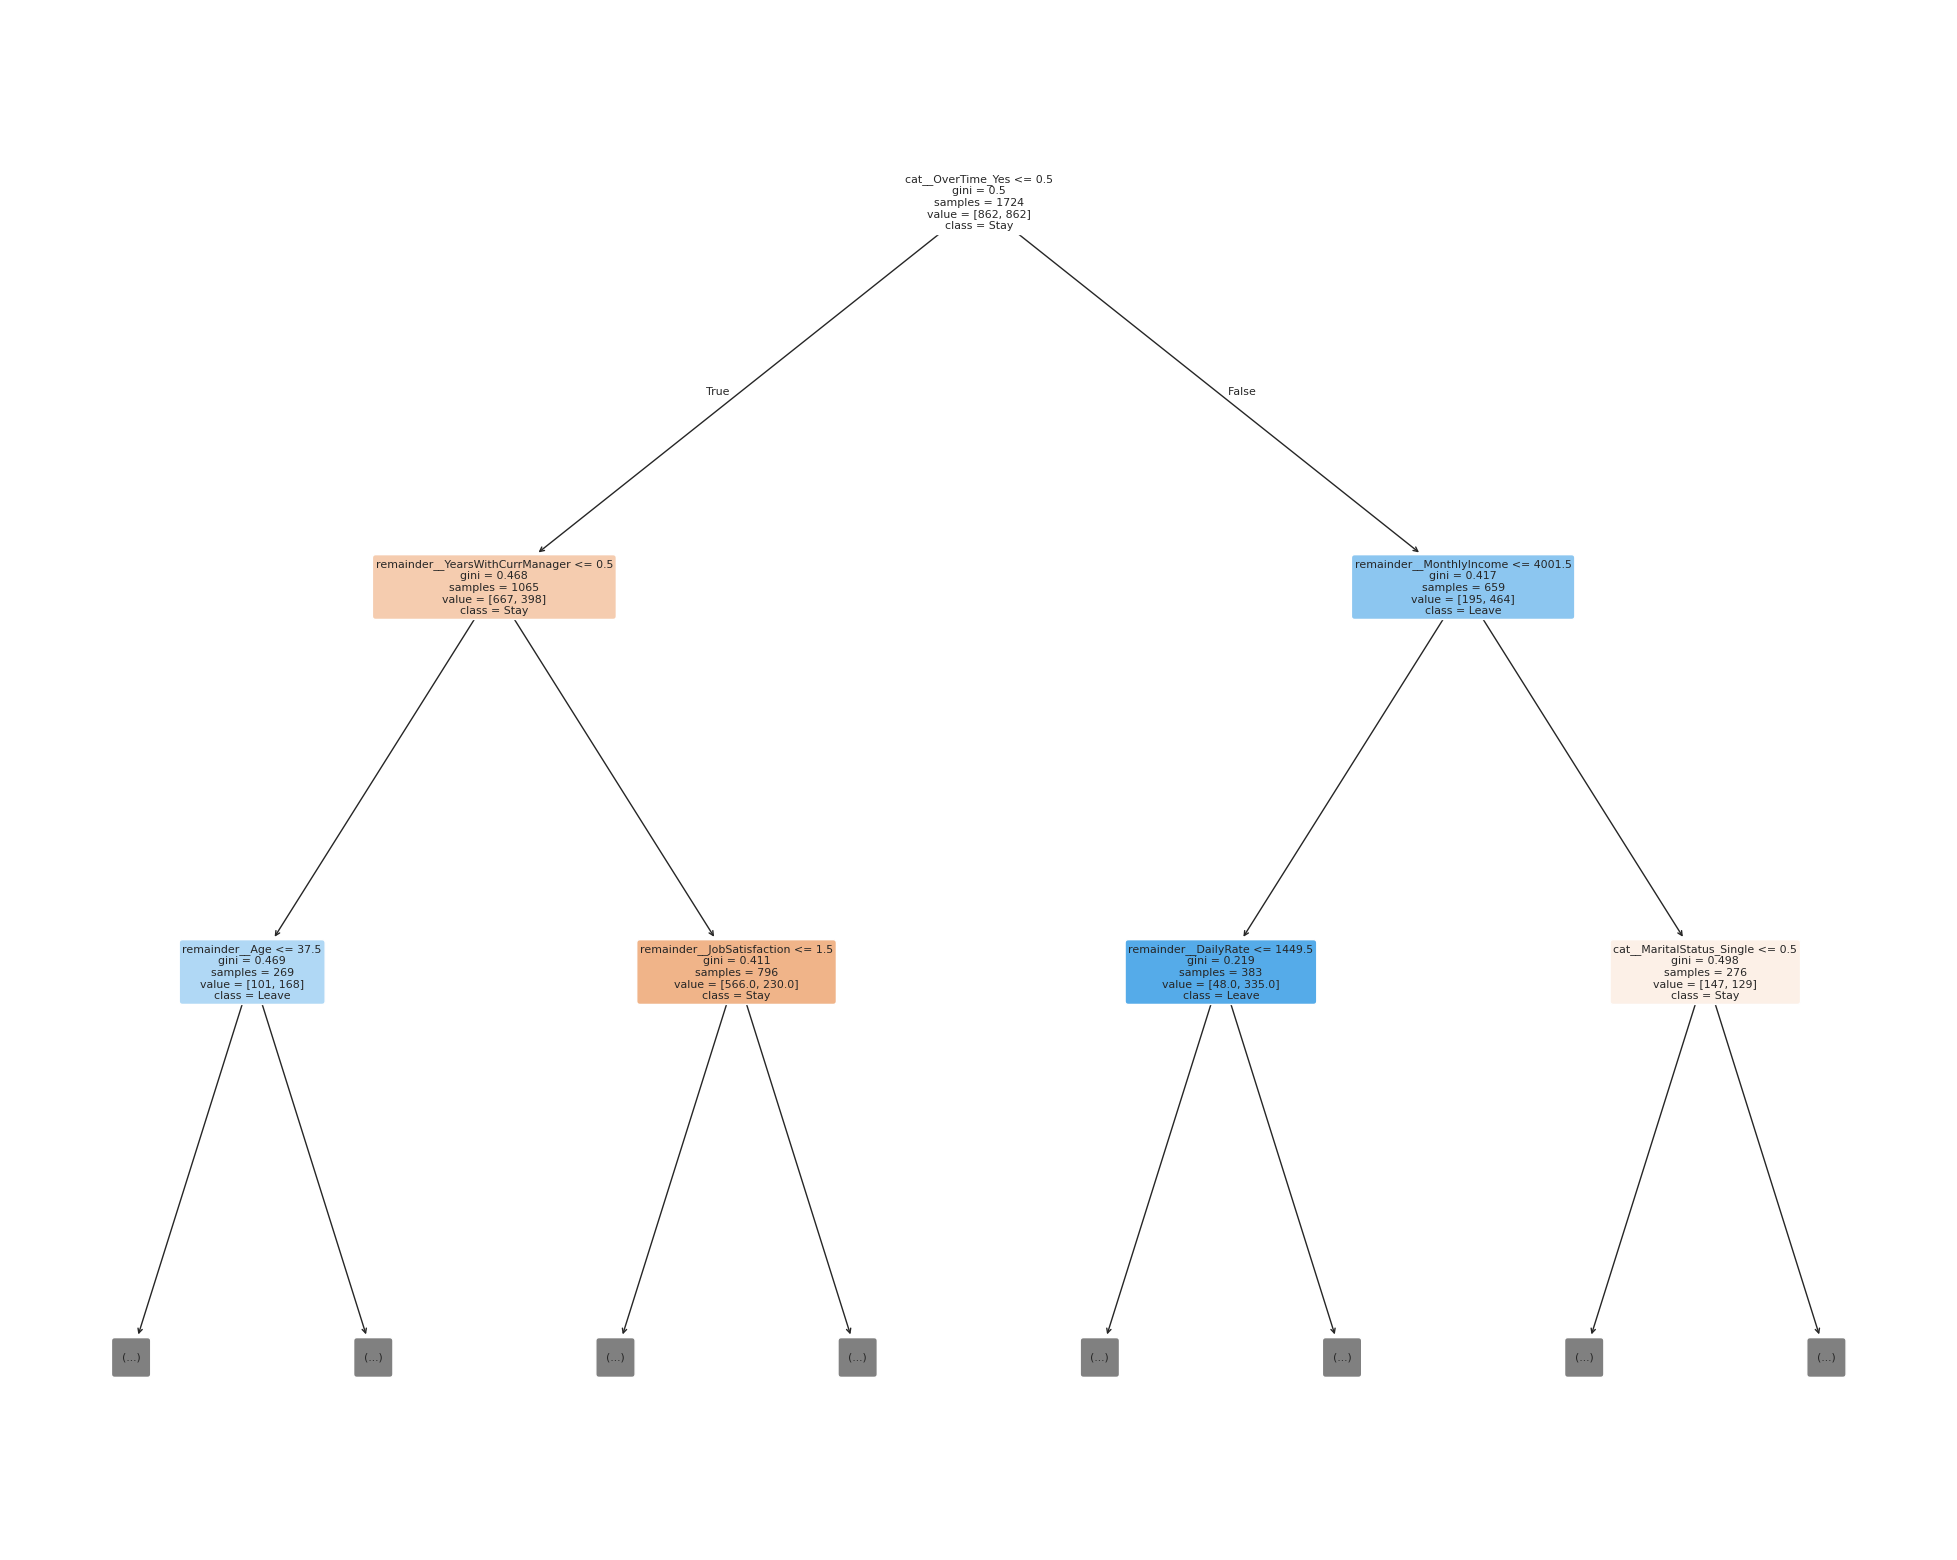

In [ ]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    dt_model,
    feature_names=X1_train_balanced.columns,
    class_names=['Stay', 'Leave'],
    filled=True,
    rounded=True,
    max_depth=2
)
plt.show()

In [ ]:
# Top 3 Features -

feature_importances = pd.DataFrame({
    'Feature': X1_train_balanced.columns,
    'Importance': dt_model.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\n Top 3 Most Important Features (Decision Tree – B4):")
print(feature_importances.head(3).to_string(index=False))


 Top 3 Most Important Features (Decision Tree – B4):
                 Feature  Importance
remainder__MonthlyIncome    0.155431
       cat__OverTime_Yes    0.103103
    remainder__DailyRate    0.060272


### 🔍 Section B4: Decision Tree without Depth Limit – Analysis & Comparison

In this part, we trained a **Decision Tree classifier without any restrictions** – no limit on depth or other parameters.  
The model was trained on the **same balanced training set as Model 1** (using all original features and oversampling),  
and evaluated on the **same test set** for a fair comparison with other models.

---

#### 📊 Performance Comparison:

| Metric        | Model 1 – Logistic (All Features) | Model 2 – Logistic (Engineered Features) | Model 3 – Unbounded Decision Tree |
|---------------|-----------------------------------|------------------------------------------|-----------------------------------|
| **Accuracy**  | 73.7%                             | **76.0%**                                | **79.1%**                         |
| **Precision** | 34.9%                             | **37.1%**                                | 32.8%                             |
| **Recall**    | **75.7%**                         | 74.3%                                    | **30.0%**                         |
| **F1 Score**  | 0.477                              | **0.495**                                 | 0.313                              |

---

### 🧠 Insights:

- The unbounded decision tree reached the **highest accuracy**, but this came at the cost of **very low recall**.
- This suggests **Overfitting**: the model learned the training data too well, including random noise,  
  but failed to generalize to new, unseen examples in the test set.
- In other words, it knows how to explain what it already saw,  
  but **struggles to identify employees who are actually at risk of leaving**.
- On the other hand, both logistic regression models (especially Model 2) kept a **better balance between accuracy and recall**,  
  and are also easier to explain and interpret.

---

### 💡 Business Conclusion:

While the unbounded decision tree may seem accurate on the surface,  
**it is not useful as a predictive tool for employee attrition**, because it misses many of the actual cases we care about most.  
Logistic models – especially with thoughtful feature engineering – provide more reliable and actionable insights.

##**B5**

In [ ]:
tuned_dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=0
)

tuned_dt.fit(X_train_balanced, y_train_balanced)

y_pred_tuned = tuned_dt.predict(X_test)

print("Confusion Matrix (Tuned Tree with depth limit):")
print(confusion_matrix(y_test, y_pred_tuned))

print("\n Classification Report (Tuned Tree):")
print(classification_report(y_test, y_pred_tuned, digits=3))

print("- Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("- Precision:", precision_score(y_test, y_pred_tuned))
print("- Recall:", recall_score(y_test, y_pred_tuned))
print("- F1 Score:", f1_score(y_test, y_pred_tuned))

Confusion Matrix (Tuned Tree with depth limit):
[[266 105]
 [ 37  33]]

 Classification Report (Tuned Tree):
              precision    recall  f1-score   support

           0      0.878     0.717     0.789       371
           1      0.239     0.471     0.317        70

    accuracy                          0.678       441
   macro avg      0.559     0.594     0.553       441
weighted avg      0.776     0.678     0.714       441

- Accuracy: 0.6780045351473923
- Precision: 0.2391304347826087
- Recall: 0.4714285714285714
- F1 Score: 0.3173076923076923


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


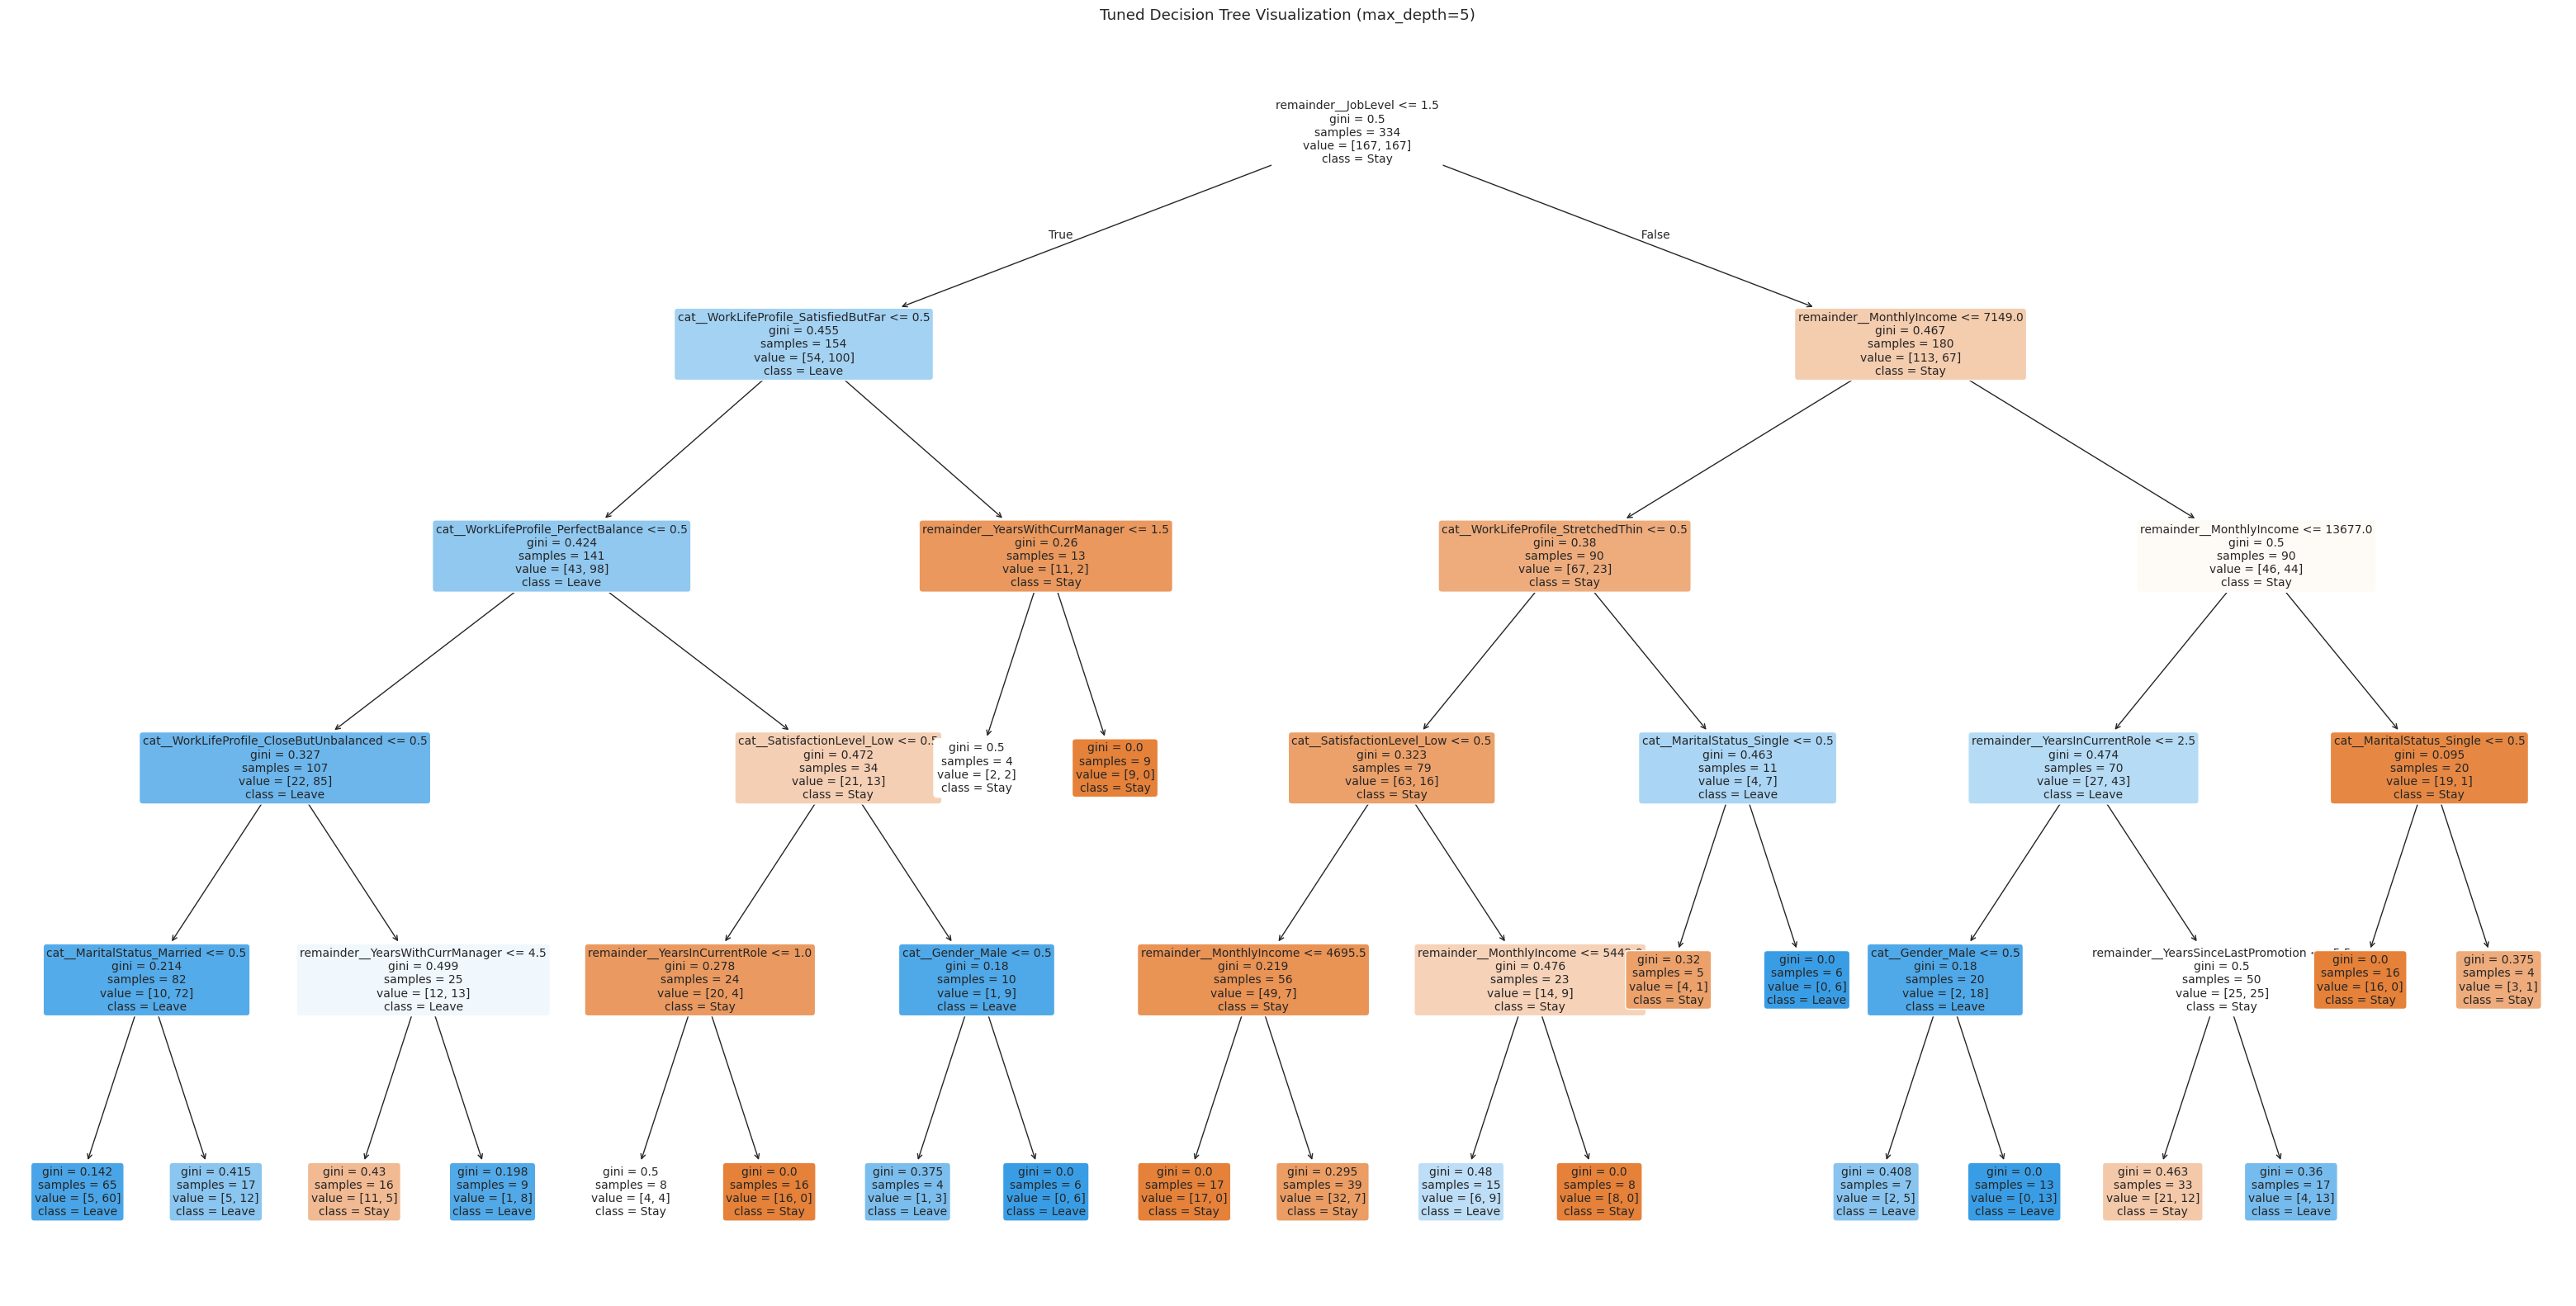

In [ ]:
plt.figure(figsize=(40, 20))
tree.plot_tree(
    tuned_dt,
    feature_names=X_train_balanced.columns,
    class_names=['Stay', 'Leave'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Tuned Decision Tree Visualization (max_depth=5)")
plt.show()

In [ ]:
# Top 3 Features -

tuned_feature_importances = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': tuned_dt.feature_importances_
})

tuned_feature_importances = tuned_feature_importances.sort_values(by='Importance', ascending=False)

print("\n Top 3 Most Important Features (Tuned Decision Tree):")
print(tuned_feature_importances.head(3).to_string(index=False))


 Top 3 Most Important Features (Tuned Decision Tree):
                   Feature  Importance
  remainder__MonthlyIncome    0.218313
       remainder__JobLevel    0.144007
cat__SatisfactionLevel_Low    0.111888


In [ ]:
# Check if the original and current versions are identical

if df2.equals(df2_original):
    print("df2 is unchanged – no modifications detected.")
else:
    print("df2 has been modified – changes were detected.")

if X2_train_balanced.equals(X2_train_balanced_original):
    print("X2_train_balanced is unchanged – no modifications detected.")
else:
    print("X2_train_balanced has been modified – changes were detected.")

if y2_train_balanced.equals(y2_train_balanced_original):
    print("y2_train_balanced is unchanged – no modifications detected.")
else:
    print("y2_train_balanced has been modified – changes were detected.")

✔️ df2 is unchanged – no modifications detected.
✔️ X2_train_balanced is unchanged – no modifications detected.
✔️ y2_train_balanced is unchanged – no modifications detected.


In [ ]:
print(df2.columns)

Index(['YearsWithCurrManager', 'Gender', 'JobLevel', 'YearsInCurrentRole',
       'Age', 'MaritalStatus', 'SatisfactionLevel', 'WorkLifeProfile',
       'YearsSinceLastPromotion', 'MonthlyIncome', 'Attrition'],
      dtype='object')


In [ ]:
# ----- Manual Tuned Decision Tree (for comparison only) -----

tuned_dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=0
)

tuned_dt.fit(X2_train_balanced, y2_train_balanced)

# Predict on the test set from Model 2
y2_pred_tuned = tuned_dt.predict(X2_test)

# Evaluation
print("Confusion Matrix (Tuned Tree – Model 2):")
print(confusion_matrix(y2_test, y2_pred_tuned))

print("\nClassification Report (Tuned Tree – Model 2):")
print(classification_report(y2_test, y2_pred_tuned, digits=3))

print("- Accuracy:", accuracy_score(y2_test, y2_pred_tuned))
print("- Precision:", precision_score(y2_test, y2_pred_tuned))
print("- Recall:", recall_score(y2_test, y2_pred_tuned))
print("- F1 Score:", f1_score(y2_test, y2_pred_tuned))

Confusion Matrix (Tuned Tree – Model 2):
[[296  75]
 [ 38  32]]

Classification Report (Tuned Tree – Model 2):
              precision    recall  f1-score   support

           0      0.886     0.798     0.840       371
           1      0.299     0.457     0.362        70

    accuracy                          0.744       441
   macro avg      0.593     0.627     0.601       441
weighted avg      0.793     0.744     0.764       441

- Accuracy: 0.7437641723356009
- Precision: 0.29906542056074764
- Recall: 0.45714285714285713
- F1 Score: 0.3615819209039548


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


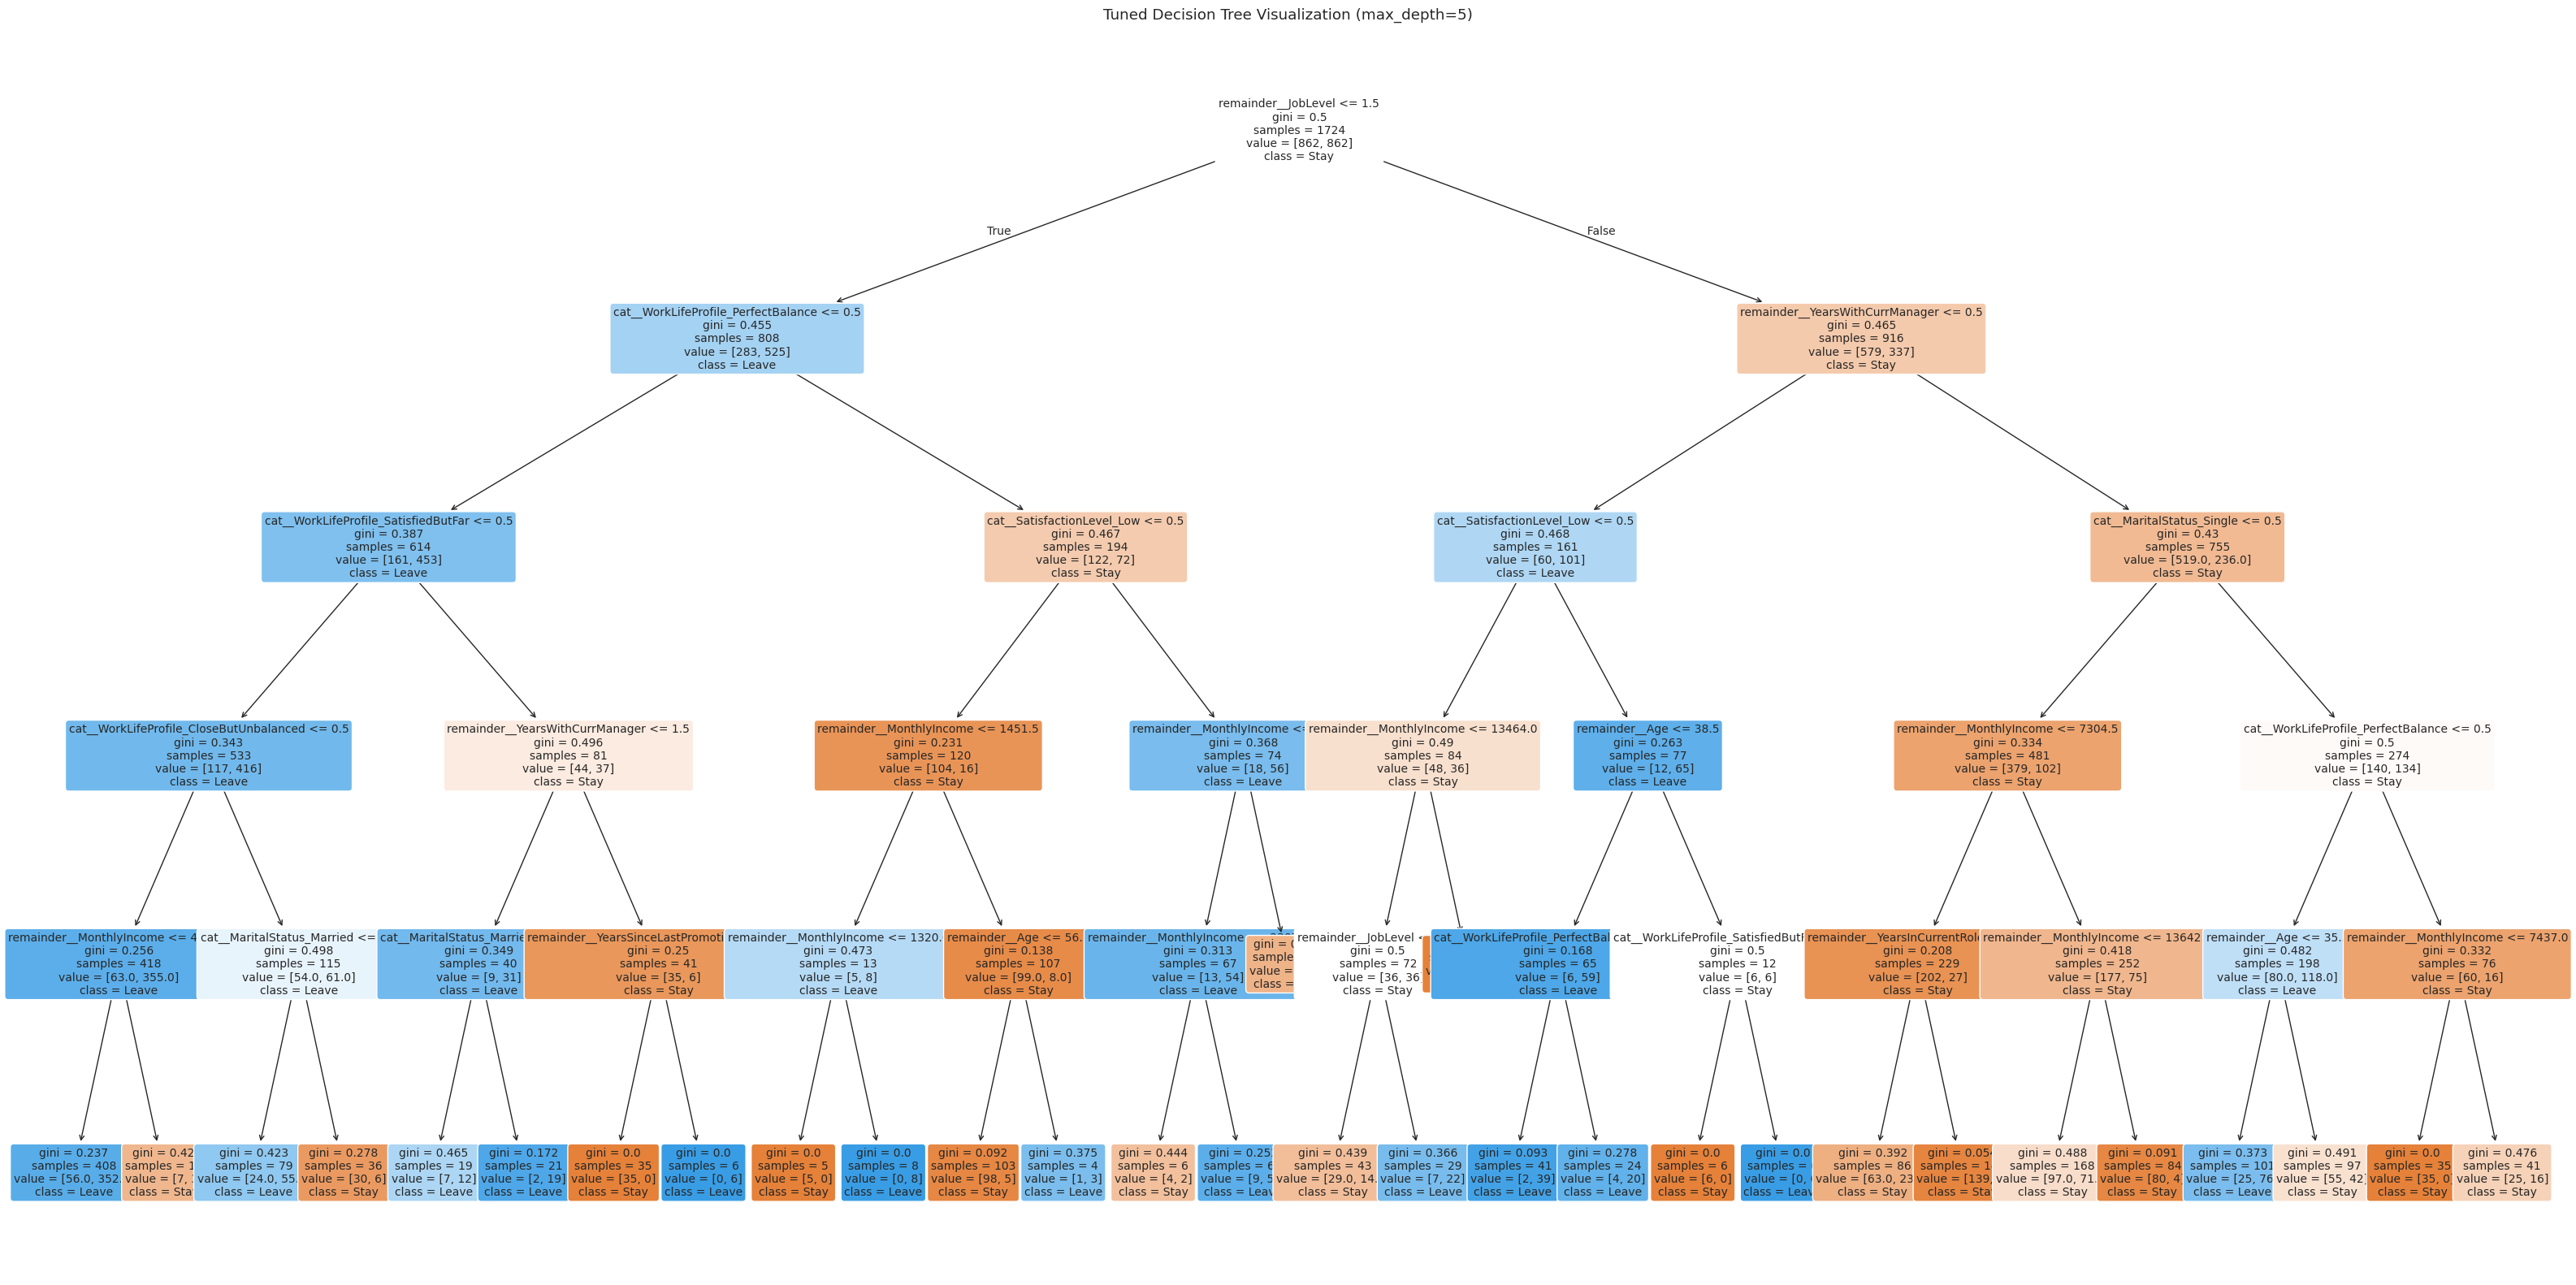

In [ ]:
plt.figure(figsize=(40, 20))
tree.plot_tree(
    tuned_dt,
    feature_names=X_train_balanced.columns,
    class_names=['Stay', 'Leave'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Tuned Decision Tree Visualization (max_depth=5)")
plt.show()

In [ ]:
# Top 3 Features -

tuned_feature_importances_model2 = pd.DataFrame({
    'Feature': X2_train_balanced.columns,
    'Importance': tuned_dt.feature_importances_
})

tuned_feature_importances_model2 = tuned_feature_importances_model2.sort_values(by='Importance', ascending=False)

print("\n Top 3 Most Important Features (Tuned Decision Tree – Model 2):")
print(tuned_feature_importances_model2.head(3).to_string(index=False))


 Top 3 Most Important Features (Tuned Decision Tree – Model 2):
                            Feature  Importance
                remainder__JobLevel    0.187890
           remainder__MonthlyIncome    0.150609
cat__WorkLifeProfile_PerfectBalance    0.141792


## **Insights – B5 (Tuned Decision Tree with Parameters)**

| Metric     | Unbounded Tree (B4) | Tuned Tree (Model 1) | Tuned Tree (Model 2) |
|------------|---------------------|------------------------|------------------------|
| Accuracy   | 0.791               | 0.678                  | 0.744                  |
| Precision  | 0.328               | 0.239                  | 0.299                  |
| Recall     | 0.300               | 0.471                  | 0.457                  |
| F1 Score   | 0.313               | 0.317                  | 0.361                  |

---

### Accuracy Alone Can Be Mislead

* The **unbounded Decision Tree (B4)** achieved a high **Accuracy of 79.1%**,the highest among all models tested.

* However, its **Recall was extremely low**, at only **30.0%**, meaning it identified only about one-third of the employees who actually left.

* **Lesson:** High Accuracy is not enough; it is crucial to also evaluate **Recall**, especially when the goal is to predict rare events like employee attrition.

---

### Parameter Tuning Significantly Improves Recall


* When we **constrained the Decision Tree (B5)** using parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`,its **Recall significantly increased to approximately 47%**.
* **Lesson:** Correct parameter tuning helps prevent overfitting and improves the model’s ability to generalize and identify at-risk employees.

---

### Feature Engineering Makes a Crucial Difference

* The **refined Decision Tree with engineered features** achieved an **F1 Score of 0.362**, and its **Recall also improved to 45.7%**, compared to the unbounded tree.
* *Lesson:** Good feature selection is just as important as the model itself.  
Smart engineering enables the model to capture more real-world attrition cases.

---

### Logistic Regression Still Leads in Overall Performance

* Despite all improvements made to the Decision Trees, the **Logistic Regression model with engineered features (Model 2)** achieved the **best overall performance**, with **F1 Score = 0.495** and **Recall = 74.3%**.
* **Lesson:** Simple and stable models like **Logistic Regression** can outperform more complex ones, **especially when supported by smart and relevant features**.

##**B6**

# B6 – Summary and Key Takeaways

## The best model is Logistic Regression (Model 2) -

Its Recall is very high (74.3%), meaning the model identifies nearly three-quarters of actual leavers. This is precisely what the business needs to intervene in time.  
It has the highest F1 Score (0.495), indicating the model not only identifies leavers but also maintains a strong balance between Recall and Precision.  
The model is built on 10 explainable and monitorable features that can be measured and tracked over time, making it highly applicable in the real world.  
Bottom Line: Logistic Regression with engineered features provides the business with the clarity, accuracy, and actionable insights it needs to reduce attrition risk.

---

## Alignment Between EDA and Model: Key Insights -

### Satisfaction:  
In our Exploratory Data Analysis (EDA), we found a significant link between overall satisfaction (a combination of Job, Environment, and Relationship satisfaction) and the tendency to leave. Employees with high satisfaction almost never leave. In Model 2, the engineered feature SatisfactionLevel_Low (+1.71) was the strongest predictor, showing full alignment between our EDA insights and the model's results.

### High Work-Life Balance:  
Our EDA revealed that employees with a high work-life balance (no overtime, short commute, high work-life balance) are less likely to leave, while those with a combination of high workload, low balance, and long commute are most likely to leave. In Model 2, the engineered features WorkLifeProfile_PerfectBalance (-1.48) and WorkLifeProfile_SatisfiedButFar (-1.28) were among the three strongest variables. Here too, there is full alignment between the EDA findings and the model's results.

### Professional Stagnation:  
In our EDA, we discovered that employees with a high feeling of stagnation leave less often (only 12.5%), while those without a path for advancement leave more often (27.1%). However, no variable directly related to professional stagnation emerged as a dominant predictor in our models. This suggests a more complex impact or that deeper analysis is needed for this factor.

### Monthly Income:  
Surprisingly, in the EDA phase, monthly income was not identified as a significant variable in employee attrition. However, in all three Decision Trees (including the unbounded B4 and the tuned trees), it appeared among the three strongest features. This was an insight that did not emerge from the EDA but proved important in the modeling phase, highlighting the value of combining initial intuition with algorithmic analysis.

---

## Business insights-  

### Good Work-Life Balance Significantly Reduces Attrition Risk -  
Our analysis shows that a "PerfectBalance" profile is a strong protective factor against attrition. Conversely, employees in "OverworkedRemote" profiles face high risk.  
**Business Recommendation:** Proactively foster a culture of work-life balance by enabling flexible work arrangements (remote work, flexible hours) and providing robust technological support. This is particularly vital for employees with high workloads or long commutes, as it directly mitigates their attrition risk.

### Unhappy Employees Leave - Satisfaction is a Strong Indicator,  
The engineered feature SatisfactionLevel_Low (+1.71) was the strongest variable in Model 2 and also appeared in other models.  
**Business Recommendation:** Enable remote work, flexible hours, and technological support, especially for employees with high workloads or long commutes. By fostering a better work-life balance, we directly reduce attrition risk.

### Monthly Income: A Consistent Predictor in Decision Trees -  
While not prominent in our initial EDA, MonthlyIncome consistently appeared among the top three features in all Decision Tree models (both unbounded and refined).  
**Business Recommendation:** Check employee salary alignment with market average semi-annually, and consider upgrading compensation for employees below the industry threshold. Ensuring fair and competitive pay is a fundamental retention strategy.

### Feeling of Stagnation Doesn't Always Lead to Leaving -  
Our EDA suggested that professionally stagnant employees might leave less than those with advancement paths. However, related features (e.g., YearsInCurrentRole, YearsSinceLastPromotion) were not dominant predictors in our models.  
**Business Recommendation:** Focus retention efforts on new and mid-tenure employees through onboarding conversations, satisfaction monitoring, and rapid development programs. Long-tenured employees are generally not at risk of leaving, and thus do not require immediate intervention.

---

## Conclusion -  
During our work, we strategically combined Exploratory Data Analysis (EDA) with model building to predict employee attrition. We found a significant overlap between the two approaches, especially in identifying factors like employee satisfaction and work-life balance, which were confirmed by both methods. However, the EDA highlighted certain variables (such as "professional stagnation") that did not emerge as dominant factors in the models, while the models revealed the importance of other variables (like "monthly income") that weren't prominent in the initial EDA. This combination of approaches allowed us to build a holistic and data-driven picture of attrition drivers. Therefore, we highly recommend full integration of EDA and model building in every data analysis project.
